In [1]:
%%capture
!pip install gcpds-cv-pykit

In [2]:
!pip list | grep gcpds

gcpds-cv-pykit                        0.1.0.43


In [3]:
import torch
from gcpds_cv_pykit.datasets import FeetMamitas
from gcpds_cv_pykit.baseline.dataloaders import Segmentation_DataLoader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.baseline.trainers import SegmentationModel_Trainer
from gcpds_cv_pykit.baseline.models import ResUNet
from gcpds_cv_pykit.baseline import PerformanceModels

In [4]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [5]:
FeetMamitas()

100%|██████████| 35.4M/35.4M [00:00<00:00, 227MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3
Dataset copied to: /content/datasets/feet-mamitas
Original download folder '/root/.cache/kagglehub/datasets/lucasiturriago/feet-mamitas/versions/3' deleted.


'/content/datasets/feet-mamitas'

In [ ]:
config = {"Dir of dataset": "./datasets/feet-mamitas", "Batch size": 36, "Image size": (256,256), "Input size": (3,256,256),
          "Number of classes": 1, "Single class train": None, "Single class test": None, "Single class valid": None, "Images folder": "images",
          "Data augmentation": True, "Epochs": 61, "Device": "cuda:0", "AMixPre": True, "Model": "ResUNet", "Backbone": "resnet34",
          "Pretrained": True, "Activation function": "sigmoid", "Loss function": "DICE", "Save results": True, "Train phases": True,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","FeetMamitas-ResUNet-DICE"]}

In [7]:
train_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Train", config["Single class train"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Train/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 248


Organizing masks: 100%|██████████| 248/248 [00:00<00:00, 175766.71it/s]


In [8]:
valid_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Valid", config["Single class valid"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Valid/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 71


Organizing masks: 100%|██████████| 71/71 [00:00<00:00, 111827.11it/s]


In [9]:
test_dataset = Segmentation_DataLoader(config["Dir of dataset"], config["Batch size"], config["Image size"], config["Number of classes"],
                                        "Test", config["Single class test"], config["Data augmentation"], config["Images folder"])

Searching for images in: datasets/feet-mamitas/Test/images
Supported formats: *.png, *.jpg, *.jpeg
Number of image files found: 35


Organizing masks: 100%|██████████| 35/35 [00:00<00:00, 89132.14it/s]


Images in the batch: torch.Size([36, 3, 256, 256]), Masks in the batch: torch.Size([36, 1, 256, 256])


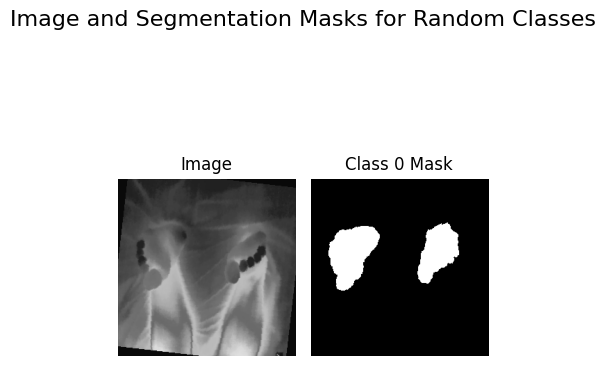

In [10]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],
                            single_class=config['Single class train'],type='baseline')

### DICE Loss

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 217MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]


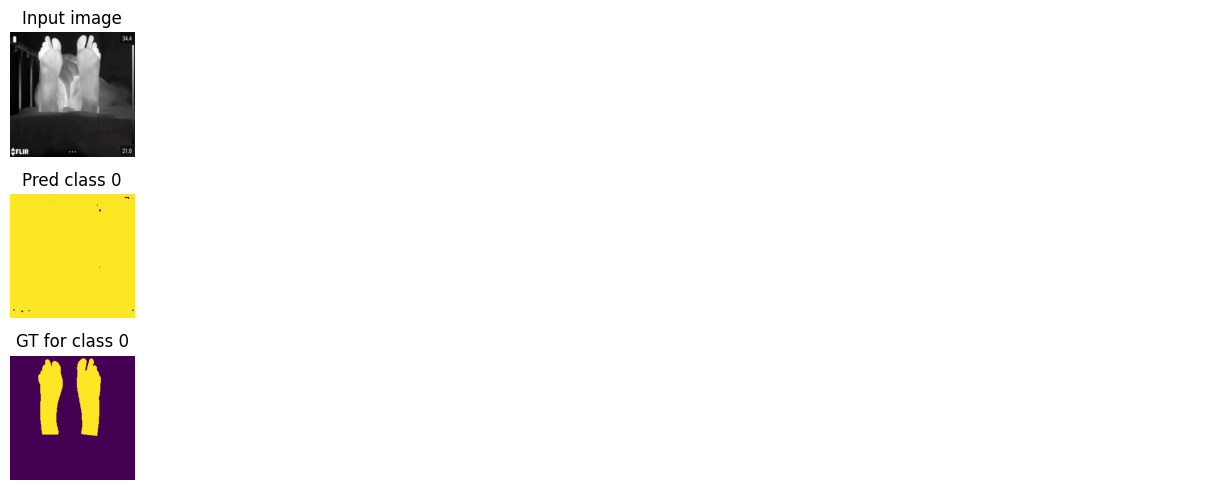

Train loss: 0.64657 | Time: 0m 6s | Val loss: 0.67283
Train_DICE_avg: 0.39344 | Train_Jaccard_avg: 0.25267 | Train_Sensitivity_avg: 0.25506 | Train_Specificity_avg: 0.87147 
Class 0 - Train_DICE: 0.39344 | Train_Jaccard: 0.25267 | Train_Sensitivity: 0.25506 | Train_Specificity: 0.87147 
Val_DICE_avg: 0.39376 | Val_Jaccard_avg: 0.25528 | Val_Sensitivity_avg: 0.25530 | Val_Specificity_avg: 0.90786 
Class 0 - Val_DICE: 0.39376 | Val_Jaccard: 0.25528 | Val_Sensitivity: 0.25530 | Val_Specificity: 0.90786 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


Train loss: 0.59010 | Time: 0m 10s | Val loss: 0.66802
Train_DICE_avg: 0.47642 | Train_Jaccard_avg: 0.32374 | Train_Sensitivity_avg: 0.32833 | Train_Specificity_avg: 0.97147 
Class 0 - Train_DICE: 0.47642 | Train_Jaccard: 0.32374 | Train_Sensitivity: 0.32833 | Train_Specificity: 0.97147 
Val_DICE_avg: 0.39891 | Val_Jaccard_avg: 0.25947 | Val_Sensitivity_avg: 0.25962 | Val_Specificity_avg: 0.97560 
Class 0 - Val_DICE: 0.39891 | Val_Jaccard: 0.25947 | Val_Sensitivity: 0.25962 | Val_Specificity: 0.97560 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.54382 | Time: 0m 13s | Val loss: 0.60625
Train_DICE_avg: 0.55238 | Train_Jaccard_avg: 0.39567 | Train_Sensitivity_avg: 0.40554 | Train_Specificity_avg: 0.97224 
Class 0 - Train_DICE: 0.55238 | Train_Jaccard: 0.39567 | Train_Sensitivity: 0.40554 | Train_Specificity: 0.97224 
Val_DICE_avg: 0.65690 | Val_Jaccard_avg: 0.50442 | Val_Sensitivity_avg: 0.55247 | Val_Specificity_avg: 0.93821 
Class 0 - Val_DICE: 0.65690 | Val_Jaccard: 0.50442 | Val_Sensitivity: 0.55247 | Val_Specificity: 0.93821 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.50849 | Time: 0m 17s | Val loss: 0.51141
Train_DICE_avg: 0.61806 | Train_Jaccard_avg: 0.46285 | Train_Sensitivity_avg: 0.47955 | Train_Specificity_avg: 0.97201 
Class 0 - Train_DICE: 0.61806 | Train_Jaccard: 0.46285 | Train_Sensitivity: 0.47955 | Train_Specificity: 0.97201 
Val_DICE_avg: 0.73618 | Val_Jaccard_avg: 0.59588 | Val_Sensitivity_avg: 0.65685 | Val_Specificity_avg: 0.94927 
Class 0 - Val_DICE: 0.73618 | Val_Jaccard: 0.59588 | Val_Sensitivity: 0.65685 | Val_Specificity: 0.94927 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.48658 | Time: 0m 21s | Val loss: 0.45184
Train_DICE_avg: 0.66257 | Train_Jaccard_avg: 0.51136 | Train_Sensitivity_avg: 0.53123 | Train_Specificity_avg: 0.97436 
Class 0 - Train_DICE: 0.66257 | Train_Jaccard: 0.51136 | Train_Sensitivity: 0.53123 | Train_Specificity: 0.97436 
Val_DICE_avg: 0.76116 | Val_Jaccard_avg: 0.62680 | Val_Sensitivity_avg: 0.66546 | Val_Specificity_avg: 0.96688 
Class 0 - Val_DICE: 0.76116 | Val_Jaccard: 0.62680 | Val_Sensitivity: 0.66546 | Val_Specificity: 0.96688 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


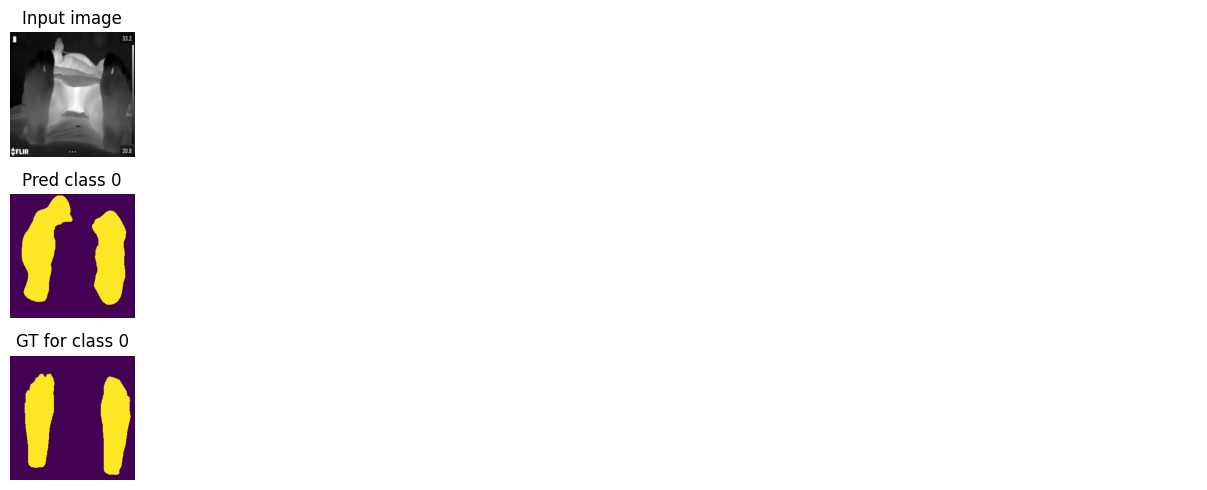

Train loss: 0.47291 | Time: 0m 25s | Val loss: 0.42830
Train_DICE_avg: 0.68426 | Train_Jaccard_avg: 0.53779 | Train_Sensitivity_avg: 0.55793 | Train_Specificity_avg: 0.97612 
Class 0 - Train_DICE: 0.68426 | Train_Jaccard: 0.53779 | Train_Sensitivity: 0.55793 | Train_Specificity: 0.97612 
Val_DICE_avg: 0.73538 | Val_Jaccard_avg: 0.59492 | Val_Sensitivity_avg: 0.61333 | Val_Specificity_avg: 0.97927 
Class 0 - Val_DICE: 0.73538 | Val_Jaccard: 0.59492 | Val_Sensitivity: 0.61333 | Val_Specificity: 0.97927 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


Train loss: 0.46149 | Time: 0m 29s | Val loss: 0.41339
Train_DICE_avg: 0.70442 | Train_Jaccard_avg: 0.56024 | Train_Sensitivity_avg: 0.58154 | Train_Specificity_avg: 0.97768 
Class 0 - Train_DICE: 0.70442 | Train_Jaccard: 0.56024 | Train_Sensitivity: 0.58154 | Train_Specificity: 0.97768 
Val_DICE_avg: 0.77213 | Val_Jaccard_avg: 0.63941 | Val_Sensitivity_avg: 0.66331 | Val_Specificity_avg: 0.97747 
Class 0 - Val_DICE: 0.77213 | Val_Jaccard: 0.63941 | Val_Sensitivity: 0.66331 | Val_Specificity: 0.97747 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.45410 | Time: 0m 33s | Val loss: 0.40850
Train_DICE_avg: 0.71676 | Train_Jaccard_avg: 0.57629 | Train_Sensitivity_avg: 0.59569 | Train_Specificity_avg: 0.98064 
Class 0 - Train_DICE: 0.71676 | Train_Jaccard: 0.57629 | Train_Sensitivity: 0.59569 | Train_Specificity: 0.98064 
Val_DICE_avg: 0.80942 | Val_Jaccard_avg: 0.68922 | Val_Sensitivity_avg: 0.73373 | Val_Specificity_avg: 0.96685 
Class 0 - Val_DICE: 0.80942 | Val_Jaccard: 0.68922 | Val_Sensitivity: 0.73373 | Val_Specificity: 0.96685 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.44823 | Time: 0m 37s | Val loss: 0.40290
Train_DICE_avg: 0.72741 | Train_Jaccard_avg: 0.59089 | Train_Sensitivity_avg: 0.60899 | Train_Specificity_avg: 0.98149 
Class 0 - Train_DICE: 0.72741 | Train_Jaccard: 0.59089 | Train_Sensitivity: 0.60899 | Train_Specificity: 0.98149 
Val_DICE_avg: 0.78984 | Val_Jaccard_avg: 0.66304 | Val_Sensitivity_avg: 0.68079 | Val_Specificity_avg: 0.98313 
Class 0 - Val_DICE: 0.78984 | Val_Jaccard: 0.66304 | Val_Sensitivity: 0.68079 | Val_Specificity: 0.98313 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.44255 | Time: 0m 41s | Val loss: 0.40077
Train_DICE_avg: 0.73759 | Train_Jaccard_avg: 0.60231 | Train_Sensitivity_avg: 0.61955 | Train_Specificity_avg: 0.98413 
Class 0 - Train_DICE: 0.73759 | Train_Jaccard: 0.60231 | Train_Sensitivity: 0.61955 | Train_Specificity: 0.98413 
Val_DICE_avg: 0.81144 | Val_Jaccard_avg: 0.69189 | Val_Sensitivity_avg: 0.71320 | Val_Specificity_avg: 0.98136 
Class 0 - Val_DICE: 0.81144 | Val_Jaccard: 0.69189 | Val_Sensitivity: 0.71320 | Val_Specificity: 0.98136 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


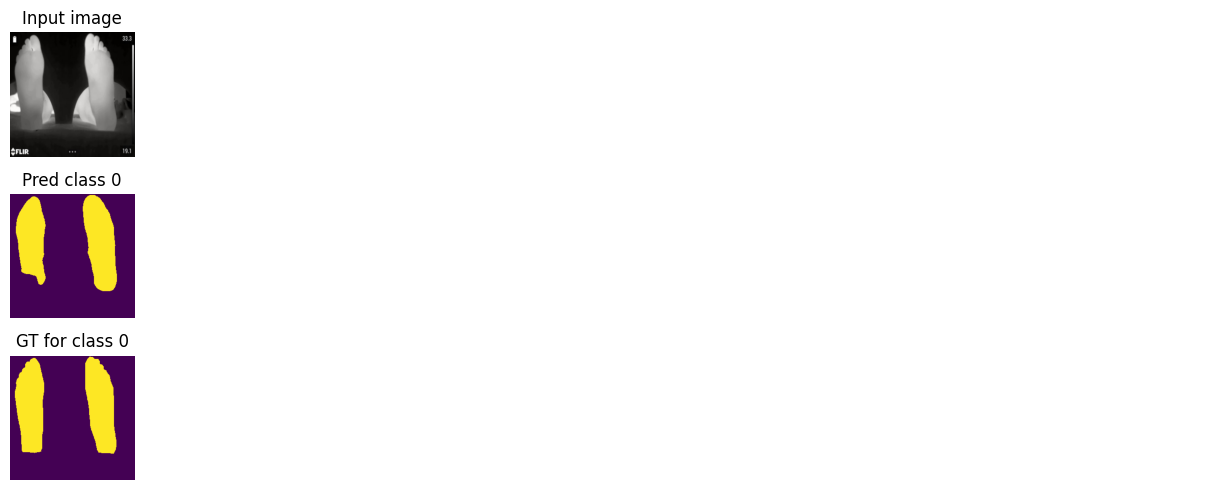

Train loss: 0.44496 | Time: 0m 45s | Val loss: 0.42155
Train_DICE_avg: 0.73531 | Train_Jaccard_avg: 0.59867 | Train_Sensitivity_avg: 0.62525 | Train_Specificity_avg: 0.97798 
Class 0 - Train_DICE: 0.73531 | Train_Jaccard: 0.59867 | Train_Sensitivity: 0.62525 | Train_Specificity: 0.97798 
Val_DICE_avg: 0.83217 | Val_Jaccard_avg: 0.72349 | Val_Sensitivity_avg: 0.86249 | Val_Specificity_avg: 0.93426 
Class 0 - Val_DICE: 0.83217 | Val_Jaccard: 0.72349 | Val_Sensitivity: 0.86249 | Val_Specificity: 0.93426 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.43993 | Time: 0m 49s | Val loss: 0.39757
Train_DICE_avg: 0.72835 | Train_Jaccard_avg: 0.59201 | Train_Sensitivity_avg: 0.60923 | Train_Specificity_avg: 0.98363 
Class 0 - Train_DICE: 0.72835 | Train_Jaccard: 0.59201 | Train_Sensitivity: 0.60923 | Train_Specificity: 0.98363 
Val_DICE_avg: 0.78930 | Val_Jaccard_avg: 0.66351 | Val_Sensitivity_avg: 0.67667 | Val_Specificity_avg: 0.98580 
Class 0 - Val_DICE: 0.78930 | Val_Jaccard: 0.66351 | Val_Sensitivity: 0.67667 | Val_Specificity: 0.98580 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


Train loss: 0.43019 | Time: 0m 53s | Val loss: 0.38942
Train_DICE_avg: 0.76361 | Train_Jaccard_avg: 0.63705 | Train_Sensitivity_avg: 0.65295 | Train_Specificity_avg: 0.98668 
Class 0 - Train_DICE: 0.76361 | Train_Jaccard: 0.63705 | Train_Sensitivity: 0.65295 | Train_Specificity: 0.98668 
Val_DICE_avg: 0.84700 | Val_Jaccard_avg: 0.74354 | Val_Sensitivity_avg: 0.76920 | Val_Specificity_avg: 0.98003 
Class 0 - Val_DICE: 0.84700 | Val_Jaccard: 0.74354 | Val_Sensitivity: 0.76920 | Val_Specificity: 0.98003 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.42504 | Time: 0m 57s | Val loss: 0.38448
Train_DICE_avg: 0.77303 | Train_Jaccard_avg: 0.65031 | Train_Sensitivity_avg: 0.66331 | Train_Specificity_avg: 0.98904 
Class 0 - Train_DICE: 0.77303 | Train_Jaccard: 0.65031 | Train_Sensitivity: 0.66331 | Train_Specificity: 0.98904 
Val_DICE_avg: 0.85520 | Val_Jaccard_avg: 0.75604 | Val_Sensitivity_avg: 0.78185 | Val_Specificity_avg: 0.97973 
Class 0 - Val_DICE: 0.85520 | Val_Jaccard: 0.75604 | Val_Sensitivity: 0.78185 | Val_Specificity: 0.97973 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.42037 | Time: 1m 0s | Val loss: 0.38094
Train_DICE_avg: 0.79010 | Train_Jaccard_avg: 0.67044 | Train_Sensitivity_avg: 0.68465 | Train_Specificity_avg: 0.98873 
Class 0 - Train_DICE: 0.79010 | Train_Jaccard: 0.67044 | Train_Sensitivity: 0.68465 | Train_Specificity: 0.98873 
Val_DICE_avg: 0.84391 | Val_Jaccard_avg: 0.73859 | Val_Sensitivity_avg: 0.75459 | Val_Specificity_avg: 0.98562 
Class 0 - Val_DICE: 0.84391 | Val_Jaccard: 0.73859 | Val_Sensitivity: 0.75459 | Val_Specificity: 0.98562 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


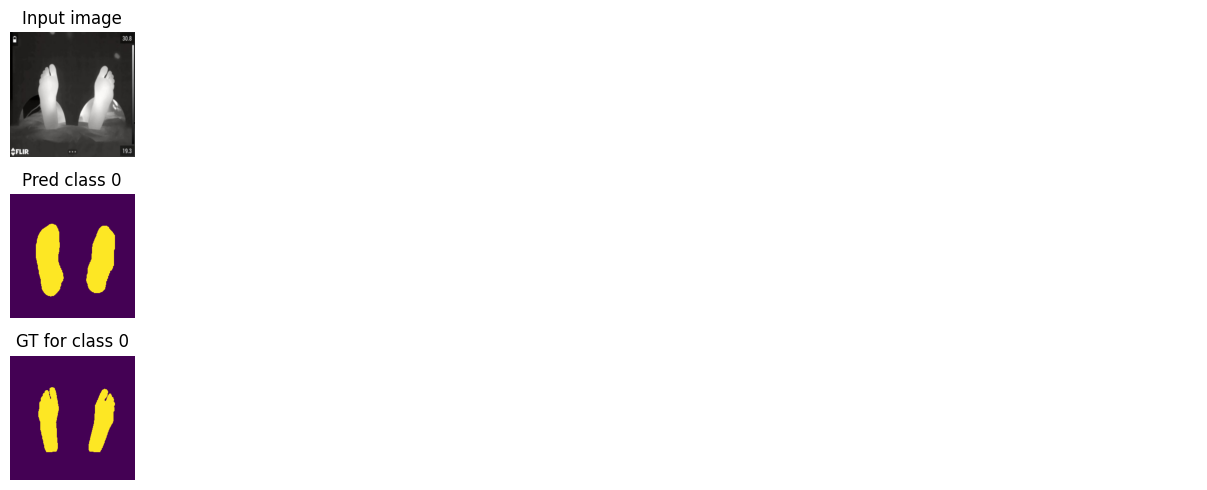

Train loss: 0.41555 | Time: 1m 5s | Val loss: 0.37933
Train_DICE_avg: 0.80439 | Train_Jaccard_avg: 0.69061 | Train_Sensitivity_avg: 0.70550 | Train_Specificity_avg: 0.98863 
Class 0 - Train_DICE: 0.80439 | Train_Jaccard: 0.69061 | Train_Sensitivity: 0.70550 | Train_Specificity: 0.98863 
Val_DICE_avg: 0.86607 | Val_Jaccard_avg: 0.77102 | Val_Sensitivity_avg: 0.79361 | Val_Specificity_avg: 0.98163 
Class 0 - Val_DICE: 0.86607 | Val_Jaccard: 0.77102 | Val_Sensitivity: 0.79361 | Val_Specificity: 0.98163 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.41243 | Time: 1m 9s | Val loss: 0.37503
Train_DICE_avg: 0.81114 | Train_Jaccard_avg: 0.70058 | Train_Sensitivity_avg: 0.71371 | Train_Specificity_avg: 0.99037 
Class 0 - Train_DICE: 0.81114 | Train_Jaccard: 0.70058 | Train_Sensitivity: 0.71371 | Train_Specificity: 0.99037 
Val_DICE_avg: 0.87181 | Val_Jaccard_avg: 0.77996 | Val_Sensitivity_avg: 0.80419 | Val_Specificity_avg: 0.98137 
Class 0 - Val_DICE: 0.87181 | Val_Jaccard: 0.77996 | Val_Sensitivity: 0.80419 | Val_Specificity: 0.98137 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.40913 | Time: 1m 13s | Val loss: 0.37162
Train_DICE_avg: 0.82068 | Train_Jaccard_avg: 0.71398 | Train_Sensitivity_avg: 0.72745 | Train_Specificity_avg: 0.98956 
Class 0 - Train_DICE: 0.82068 | Train_Jaccard: 0.71398 | Train_Sensitivity: 0.72745 | Train_Specificity: 0.98956 
Val_DICE_avg: 0.88281 | Val_Jaccard_avg: 0.79626 | Val_Sensitivity_avg: 0.82248 | Val_Specificity_avg: 0.98247 
Class 0 - Val_DICE: 0.88281 | Val_Jaccard: 0.79626 | Val_Sensitivity: 0.82248 | Val_Specificity: 0.98247 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.40678 | Time: 1m 17s | Val loss: 0.36680
Train_DICE_avg: 0.82905 | Train_Jaccard_avg: 0.72553 | Train_Sensitivity_avg: 0.73997 | Train_Specificity_avg: 0.98970 
Class 0 - Train_DICE: 0.82905 | Train_Jaccard: 0.72553 | Train_Sensitivity: 0.73997 | Train_Specificity: 0.98970 
Val_DICE_avg: 0.88766 | Val_Jaccard_avg: 0.80322 | Val_Sensitivity_avg: 0.82864 | Val_Specificity_avg: 0.98370 
Class 0 - Val_DICE: 0.88766 | Val_Jaccard: 0.80322 | Val_Sensitivity: 0.82864 | Val_Specificity: 0.98370 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.40396 | Time: 1m 20s | Val loss: 0.36234
Train_DICE_avg: 0.83007 | Train_Jaccard_avg: 0.72683 | Train_Sensitivity_avg: 0.73910 | Train_Specificity_avg: 0.99055 
Class 0 - Train_DICE: 0.83007 | Train_Jaccard: 0.72683 | Train_Sensitivity: 0.73910 | Train_Specificity: 0.99055 
Val_DICE_avg: 0.89361 | Val_Jaccard_avg: 0.81300 | Val_Sensitivity_avg: 0.84423 | Val_Specificity_avg: 0.97971 
Class 0 - Val_DICE: 0.89361 | Val_Jaccard: 0.81300 | Val_Sensitivity: 0.84423 | Val_Specificity: 0.97971 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


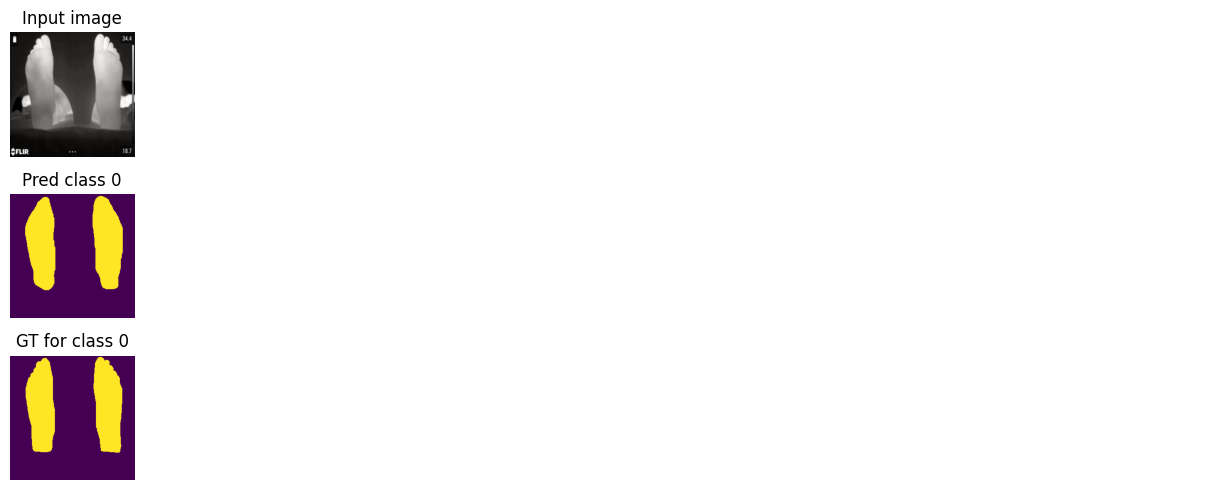

Train loss: 0.40664 | Time: 1m 25s | Val loss: 0.40046
Train_DICE_avg: 0.82782 | Train_Jaccard_avg: 0.72127 | Train_Sensitivity_avg: 0.74446 | Train_Specificity_avg: 0.98428 
Class 0 - Train_DICE: 0.82782 | Train_Jaccard: 0.72127 | Train_Sensitivity: 0.74446 | Train_Specificity: 0.98428 
Val_DICE_avg: 0.84898 | Val_Jaccard_avg: 0.75987 | Val_Sensitivity_avg: 0.92979 | Val_Specificity_avg: 0.93473 
Class 0 - Val_DICE: 0.84898 | Val_Jaccard: 0.75987 | Val_Sensitivity: 0.92979 | Val_Specificity: 0.93473 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


Train loss: 0.40217 | Time: 1m 28s | Val loss: 0.35802
Train_DICE_avg: 0.83638 | Train_Jaccard_avg: 0.73710 | Train_Sensitivity_avg: 0.75428 | Train_Specificity_avg: 0.98867 
Class 0 - Train_DICE: 0.83638 | Train_Jaccard: 0.73710 | Train_Sensitivity: 0.75428 | Train_Specificity: 0.98867 
Val_DICE_avg: 0.88429 | Val_Jaccard_avg: 0.80062 | Val_Sensitivity_avg: 0.82731 | Val_Specificity_avg: 0.98072 
Class 0 - Val_DICE: 0.88429 | Val_Jaccard: 0.80062 | Val_Sensitivity: 0.82731 | Val_Specificity: 0.98072 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.39849 | Time: 1m 32s | Val loss: 0.35508
Train_DICE_avg: 0.84301 | Train_Jaccard_avg: 0.74379 | Train_Sensitivity_avg: 0.75800 | Train_Specificity_avg: 0.98996 
Class 0 - Train_DICE: 0.84301 | Train_Jaccard: 0.74379 | Train_Sensitivity: 0.75800 | Train_Specificity: 0.98996 
Val_DICE_avg: 0.89082 | Val_Jaccard_avg: 0.80821 | Val_Sensitivity_avg: 0.83159 | Val_Specificity_avg: 0.98296 
Class 0 - Val_DICE: 0.89082 | Val_Jaccard: 0.80821 | Val_Sensitivity: 0.83159 | Val_Specificity: 0.98296 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.39630 | Time: 1m 36s | Val loss: 0.34563
Train_DICE_avg: 0.84810 | Train_Jaccard_avg: 0.75252 | Train_Sensitivity_avg: 0.76666 | Train_Specificity_avg: 0.99063 
Class 0 - Train_DICE: 0.84810 | Train_Jaccard: 0.75252 | Train_Sensitivity: 0.76666 | Train_Specificity: 0.99063 
Val_DICE_avg: 0.90798 | Val_Jaccard_avg: 0.83602 | Val_Sensitivity_avg: 0.86340 | Val_Specificity_avg: 0.98098 
Class 0 - Val_DICE: 0.90798 | Val_Jaccard: 0.83602 | Val_Sensitivity: 0.86340 | Val_Specificity: 0.98098 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


Train loss: 0.39401 | Time: 1m 40s | Val loss: 0.34204
Train_DICE_avg: 0.85190 | Train_Jaccard_avg: 0.75840 | Train_Sensitivity_avg: 0.77149 | Train_Specificity_avg: 0.99129 
Class 0 - Train_DICE: 0.85190 | Train_Jaccard: 0.75840 | Train_Sensitivity: 0.77149 | Train_Specificity: 0.99129 
Val_DICE_avg: 0.90551 | Val_Jaccard_avg: 0.83207 | Val_Sensitivity_avg: 0.85818 | Val_Specificity_avg: 0.98254 
Class 0 - Val_DICE: 0.90551 | Val_Jaccard: 0.83207 | Val_Sensitivity: 0.85818 | Val_Specificity: 0.98254 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


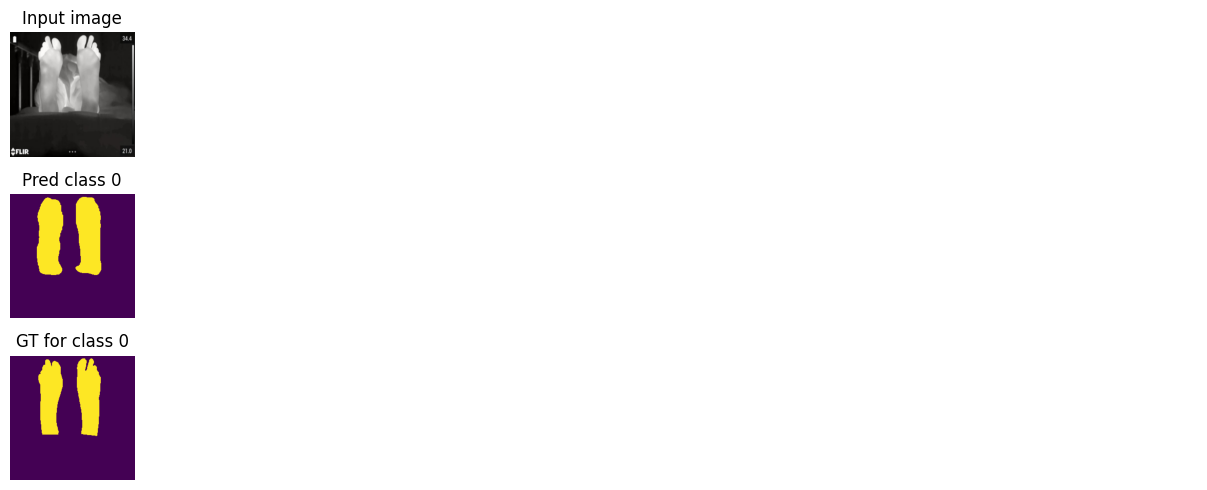

Train loss: 0.39011 | Time: 1m 44s | Val loss: 0.33935
Train_DICE_avg: 0.86757 | Train_Jaccard_avg: 0.77849 | Train_Sensitivity_avg: 0.79177 | Train_Specificity_avg: 0.99176 
Class 0 - Train_DICE: 0.86757 | Train_Jaccard: 0.77849 | Train_Sensitivity: 0.79177 | Train_Specificity: 0.99176 
Val_DICE_avg: 0.91053 | Val_Jaccard_avg: 0.83980 | Val_Sensitivity_avg: 0.86128 | Val_Specificity_avg: 0.98519 
Class 0 - Val_DICE: 0.91053 | Val_Jaccard: 0.83980 | Val_Sensitivity: 0.86128 | Val_Specificity: 0.98519 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.38759 | Time: 1m 48s | Val loss: 0.34002
Train_DICE_avg: 0.87526 | Train_Jaccard_avg: 0.78835 | Train_Sensitivity_avg: 0.80211 | Train_Specificity_avg: 0.99083 
Class 0 - Train_DICE: 0.87526 | Train_Jaccard: 0.78835 | Train_Sensitivity: 0.80211 | Train_Specificity: 0.99083 
Val_DICE_avg: 0.91989 | Val_Jaccard_avg: 0.85620 | Val_Sensitivity_avg: 0.88900 | Val_Specificity_avg: 0.98014 
Class 0 - Val_DICE: 0.91989 | Val_Jaccard: 0.85620 | Val_Sensitivity: 0.88900 | Val_Specificity: 0.98014 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.38464 | Time: 1m 52s | Val loss: 0.33473
Train_DICE_avg: 0.87369 | Train_Jaccard_avg: 0.79000 | Train_Sensitivity_avg: 0.80066 | Train_Specificity_avg: 0.99349 
Class 0 - Train_DICE: 0.87369 | Train_Jaccard: 0.79000 | Train_Sensitivity: 0.80066 | Train_Specificity: 0.99349 
Val_DICE_avg: 0.91101 | Val_Jaccard_avg: 0.84143 | Val_Sensitivity_avg: 0.86334 | Val_Specificity_avg: 0.98457 
Class 0 - Val_DICE: 0.91101 | Val_Jaccard: 0.84143 | Val_Sensitivity: 0.86334 | Val_Specificity: 0.98457 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.38372 | Time: 1m 56s | Val loss: 0.33291
Train_DICE_avg: 0.88189 | Train_Jaccard_avg: 0.79811 | Train_Sensitivity_avg: 0.81276 | Train_Specificity_avg: 0.99017 
Class 0 - Train_DICE: 0.88189 | Train_Jaccard: 0.79811 | Train_Sensitivity: 0.81276 | Train_Specificity: 0.99017 
Val_DICE_avg: 0.91947 | Val_Jaccard_avg: 0.85554 | Val_Sensitivity_avg: 0.88600 | Val_Specificity_avg: 0.98077 
Class 0 - Val_DICE: 0.91947 | Val_Jaccard: 0.85554 | Val_Sensitivity: 0.88600 | Val_Specificity: 0.98077 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.38251 | Time: 2m 0s | Val loss: 0.33129
Train_DICE_avg: 0.88095 | Train_Jaccard_avg: 0.79797 | Train_Sensitivity_avg: 0.80906 | Train_Specificity_avg: 0.99308 
Class 0 - Train_DICE: 0.88095 | Train_Jaccard: 0.79797 | Train_Sensitivity: 0.80906 | Train_Specificity: 0.99308 
Val_DICE_avg: 0.91174 | Val_Jaccard_avg: 0.84191 | Val_Sensitivity_avg: 0.85484 | Val_Specificity_avg: 0.99001 
Class 0 - Val_DICE: 0.91174 | Val_Jaccard: 0.84191 | Val_Sensitivity: 0.85484 | Val_Specificity: 0.99001 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


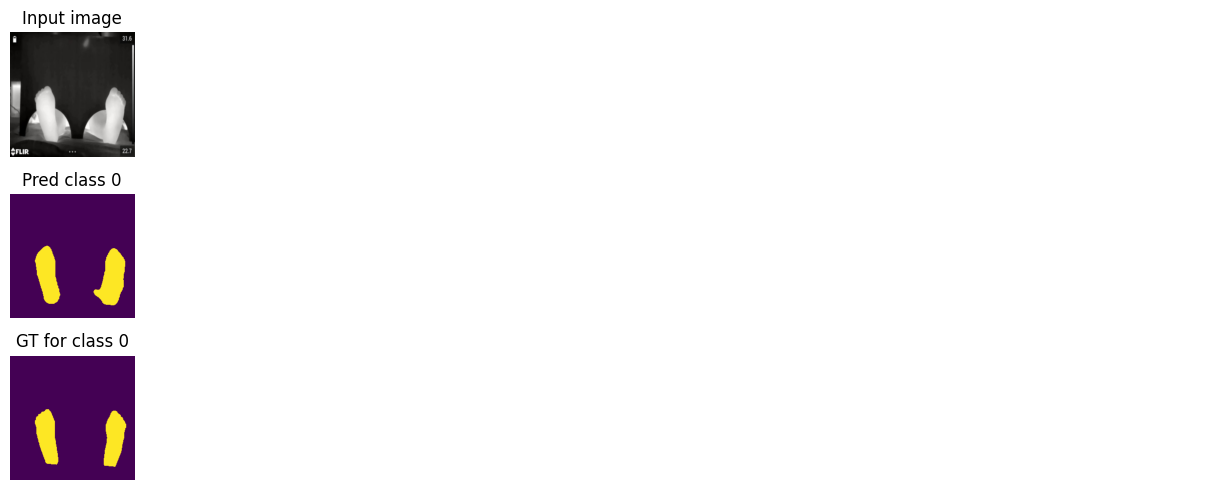

Train loss: 0.38477 | Time: 2m 4s | Val loss: 0.31873
Train_DICE_avg: 0.86809 | Train_Jaccard_avg: 0.77858 | Train_Sensitivity_avg: 0.79400 | Train_Specificity_avg: 0.99053 
Class 0 - Train_DICE: 0.86809 | Train_Jaccard: 0.77858 | Train_Sensitivity: 0.79400 | Train_Specificity: 0.99053 
Val_DICE_avg: 0.93195 | Val_Jaccard_avg: 0.87668 | Val_Sensitivity_avg: 0.90805 | Val_Specificity_avg: 0.98186 
Class 0 - Val_DICE: 0.93195 | Val_Jaccard: 0.87668 | Val_Sensitivity: 0.90805 | Val_Specificity: 0.98186 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.38227 | Time: 2m 8s | Val loss: 0.32161
Train_DICE_avg: 0.88637 | Train_Jaccard_avg: 0.80686 | Train_Sensitivity_avg: 0.82344 | Train_Specificity_avg: 0.99010 
Class 0 - Train_DICE: 0.88637 | Train_Jaccard: 0.80686 | Train_Sensitivity: 0.82344 | Train_Specificity: 0.99010 
Val_DICE_avg: 0.90463 | Val_Jaccard_avg: 0.83173 | Val_Sensitivity_avg: 0.85141 | Val_Specificity_avg: 0.98474 
Class 0 - Val_DICE: 0.90463 | Val_Jaccard: 0.83173 | Val_Sensitivity: 0.85141 | Val_Specificity: 0.98474 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.38033 | Time: 2m 12s | Val loss: 0.32170
Train_DICE_avg: 0.87698 | Train_Jaccard_avg: 0.79069 | Train_Sensitivity_avg: 0.80284 | Train_Specificity_avg: 0.99235 
Class 0 - Train_DICE: 0.87698 | Train_Jaccard: 0.79069 | Train_Sensitivity: 0.80284 | Train_Specificity: 0.99235 
Val_DICE_avg: 0.92265 | Val_Jaccard_avg: 0.86067 | Val_Sensitivity_avg: 0.88640 | Val_Specificity_avg: 0.98277 
Class 0 - Val_DICE: 0.92265 | Val_Jaccard: 0.86067 | Val_Sensitivity: 0.88640 | Val_Specificity: 0.98277 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.37707 | Time: 2m 16s | Val loss: 0.31716
Train_DICE_avg: 0.88988 | Train_Jaccard_avg: 0.81191 | Train_Sensitivity_avg: 0.82463 | Train_Specificity_avg: 0.99202 
Class 0 - Train_DICE: 0.88988 | Train_Jaccard: 0.81191 | Train_Sensitivity: 0.82463 | Train_Specificity: 0.99202 
Val_DICE_avg: 0.92286 | Val_Jaccard_avg: 0.86012 | Val_Sensitivity_avg: 0.87281 | Val_Specificity_avg: 0.99035 
Class 0 - Val_DICE: 0.92286 | Val_Jaccard: 0.86012 | Val_Sensitivity: 0.87281 | Val_Specificity: 0.99035 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.37241 | Time: 2m 19s | Val loss: 0.32179
Train_DICE_avg: 0.89829 | Train_Jaccard_avg: 0.82349 | Train_Sensitivity_avg: 0.83132 | Train_Specificity_avg: 0.99495 
Class 0 - Train_DICE: 0.89829 | Train_Jaccard: 0.82349 | Train_Sensitivity: 0.83132 | Train_Specificity: 0.99495 
Val_DICE_avg: 0.91759 | Val_Jaccard_avg: 0.85157 | Val_Sensitivity_avg: 0.86739 | Val_Specificity_avg: 0.98727 
Class 0 - Val_DICE: 0.91759 | Val_Jaccard: 0.85157 | Val_Sensitivity: 0.86739 | Val_Specificity: 0.98727 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


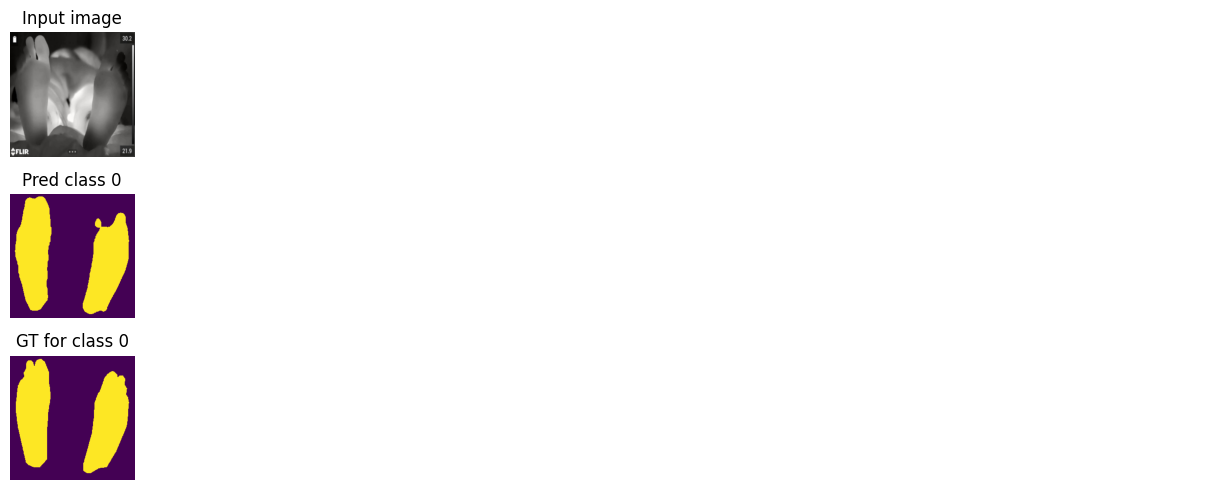

Train loss: 0.37416 | Time: 2m 23s | Val loss: 0.32043
Train_DICE_avg: 0.90029 | Train_Jaccard_avg: 0.82610 | Train_Sensitivity_avg: 0.83763 | Train_Specificity_avg: 0.99349 
Class 0 - Train_DICE: 0.90029 | Train_Jaccard: 0.82610 | Train_Sensitivity: 0.83763 | Train_Specificity: 0.99349 
Val_DICE_avg: 0.92700 | Val_Jaccard_avg: 0.86623 | Val_Sensitivity_avg: 0.87886 | Val_Specificity_avg: 0.98979 
Class 0 - Val_DICE: 0.92700 | Val_Jaccard: 0.86623 | Val_Sensitivity: 0.87886 | Val_Specificity: 0.98979 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


Train loss: 0.37049 | Time: 2m 28s | Val loss: 0.31577
Train_DICE_avg: 0.89900 | Train_Jaccard_avg: 0.82443 | Train_Sensitivity_avg: 0.83150 | Train_Specificity_avg: 0.99546 
Class 0 - Train_DICE: 0.89900 | Train_Jaccard: 0.82443 | Train_Sensitivity: 0.83150 | Train_Specificity: 0.99546 
Val_DICE_avg: 0.93877 | Val_Jaccard_avg: 0.88633 | Val_Sensitivity_avg: 0.90330 | Val_Specificity_avg: 0.98814 
Class 0 - Val_DICE: 0.93877 | Val_Jaccard: 0.88633 | Val_Sensitivity: 0.90330 | Val_Specificity: 0.98814 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.36919 | Time: 2m 31s | Val loss: 0.31372
Train_DICE_avg: 0.90969 | Train_Jaccard_avg: 0.84175 | Train_Sensitivity_avg: 0.85146 | Train_Specificity_avg: 0.99444 
Class 0 - Train_DICE: 0.90969 | Train_Jaccard: 0.84175 | Train_Sensitivity: 0.85146 | Train_Specificity: 0.99444 
Val_DICE_avg: 0.93113 | Val_Jaccard_avg: 0.87310 | Val_Sensitivity_avg: 0.88527 | Val_Specificity_avg: 0.99045 
Class 0 - Val_DICE: 0.93113 | Val_Jaccard: 0.87310 | Val_Sensitivity: 0.88527 | Val_Specificity: 0.99045 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.36756 | Time: 2m 35s | Val loss: 0.31055
Train_DICE_avg: 0.90657 | Train_Jaccard_avg: 0.83593 | Train_Sensitivity_avg: 0.84443 | Train_Specificity_avg: 0.99455 
Class 0 - Train_DICE: 0.90657 | Train_Jaccard: 0.83593 | Train_Sensitivity: 0.84443 | Train_Specificity: 0.99455 
Val_DICE_avg: 0.93415 | Val_Jaccard_avg: 0.87852 | Val_Sensitivity_avg: 0.89069 | Val_Specificity_avg: 0.99090 
Class 0 - Val_DICE: 0.93415 | Val_Jaccard: 0.87852 | Val_Sensitivity: 0.89069 | Val_Specificity: 0.99090 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.36767 | Time: 2m 39s | Val loss: 0.31549
Train_DICE_avg: 0.90868 | Train_Jaccard_avg: 0.84035 | Train_Sensitivity_avg: 0.84818 | Train_Specificity_avg: 0.99551 
Class 0 - Train_DICE: 0.90868 | Train_Jaccard: 0.84035 | Train_Sensitivity: 0.84818 | Train_Specificity: 0.99551 
Val_DICE_avg: 0.92827 | Val_Jaccard_avg: 0.86863 | Val_Sensitivity_avg: 0.87750 | Val_Specificity_avg: 0.99307 
Class 0 - Val_DICE: 0.92827 | Val_Jaccard: 0.86863 | Val_Sensitivity: 0.87750 | Val_Specificity: 0.99307 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


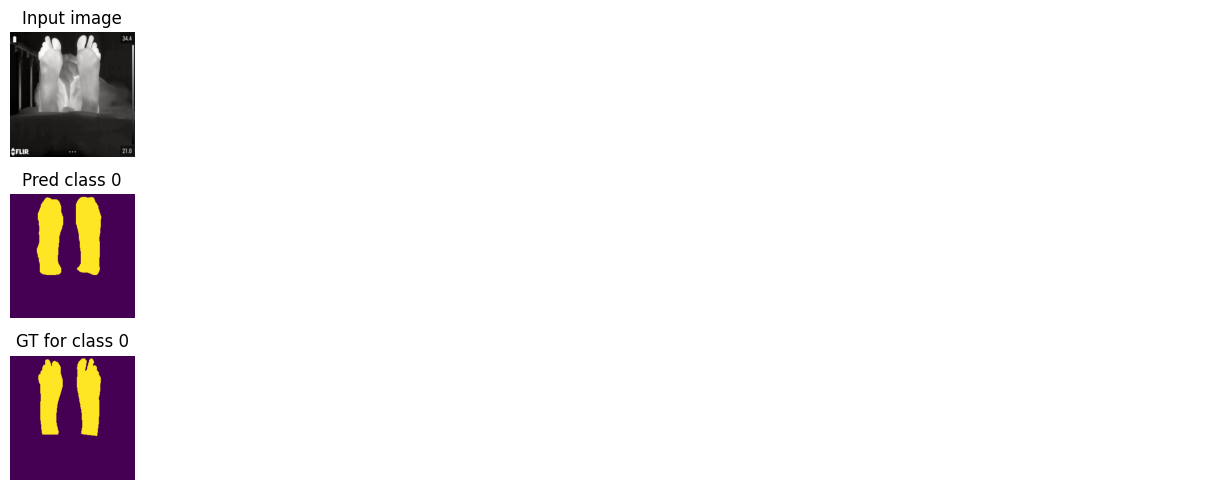

Train loss: 0.36347 | Time: 2m 43s | Val loss: 0.30853
Train_DICE_avg: 0.91557 | Train_Jaccard_avg: 0.84987 | Train_Sensitivity_avg: 0.85626 | Train_Specificity_avg: 0.99636 
Class 0 - Train_DICE: 0.91557 | Train_Jaccard: 0.84987 | Train_Sensitivity: 0.85626 | Train_Specificity: 0.99636 
Val_DICE_avg: 0.93684 | Val_Jaccard_avg: 0.88331 | Val_Sensitivity_avg: 0.89768 | Val_Specificity_avg: 0.98966 
Class 0 - Val_DICE: 0.93684 | Val_Jaccard: 0.88331 | Val_Sensitivity: 0.89768 | Val_Specificity: 0.98966 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.36569 | Time: 2m 47s | Val loss: 0.29972
Train_DICE_avg: 0.91401 | Train_Jaccard_avg: 0.84776 | Train_Sensitivity_avg: 0.85517 | Train_Specificity_avg: 0.99578 
Class 0 - Train_DICE: 0.91401 | Train_Jaccard: 0.84776 | Train_Sensitivity: 0.85517 | Train_Specificity: 0.99578 
Val_DICE_avg: 0.94160 | Val_Jaccard_avg: 0.89167 | Val_Sensitivity_avg: 0.90827 | Val_Specificity_avg: 0.98868 
Class 0 - Val_DICE: 0.94160 | Val_Jaccard: 0.89167 | Val_Sensitivity: 0.90827 | Val_Specificity: 0.98868 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.36383 | Time: 2m 51s | Val loss: 0.30165
Train_DICE_avg: 0.91494 | Train_Jaccard_avg: 0.84888 | Train_Sensitivity_avg: 0.85650 | Train_Specificity_avg: 0.99551 
Class 0 - Train_DICE: 0.91494 | Train_Jaccard: 0.84888 | Train_Sensitivity: 0.85650 | Train_Specificity: 0.99551 
Val_DICE_avg: 0.94354 | Val_Jaccard_avg: 0.89511 | Val_Sensitivity_avg: 0.91516 | Val_Specificity_avg: 0.98715 
Class 0 - Val_DICE: 0.94354 | Val_Jaccard: 0.89511 | Val_Sensitivity: 0.91516 | Val_Specificity: 0.98715 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.36190 | Time: 2m 55s | Val loss: 0.30345
Train_DICE_avg: 0.91549 | Train_Jaccard_avg: 0.85033 | Train_Sensitivity_avg: 0.85695 | Train_Specificity_avg: 0.99620 
Class 0 - Train_DICE: 0.91549 | Train_Jaccard: 0.85033 | Train_Sensitivity: 0.85695 | Train_Specificity: 0.99620 
Val_DICE_avg: 0.94295 | Val_Jaccard_avg: 0.89379 | Val_Sensitivity_avg: 0.90911 | Val_Specificity_avg: 0.99011 
Class 0 - Val_DICE: 0.94295 | Val_Jaccard: 0.89379 | Val_Sensitivity: 0.90911 | Val_Specificity: 0.99011 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.36241 | Time: 2m 59s | Val loss: 0.30733
Train_DICE_avg: 0.91787 | Train_Jaccard_avg: 0.85345 | Train_Sensitivity_avg: 0.86081 | Train_Specificity_avg: 0.99591 
Class 0 - Train_DICE: 0.91787 | Train_Jaccard: 0.85345 | Train_Sensitivity: 0.86081 | Train_Specificity: 0.99591 
Val_DICE_avg: 0.93635 | Val_Jaccard_avg: 0.88224 | Val_Sensitivity_avg: 0.89452 | Val_Specificity_avg: 0.99168 
Class 0 - Val_DICE: 0.93635 | Val_Jaccard: 0.88224 | Val_Sensitivity: 0.89452 | Val_Specificity: 0.99168 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


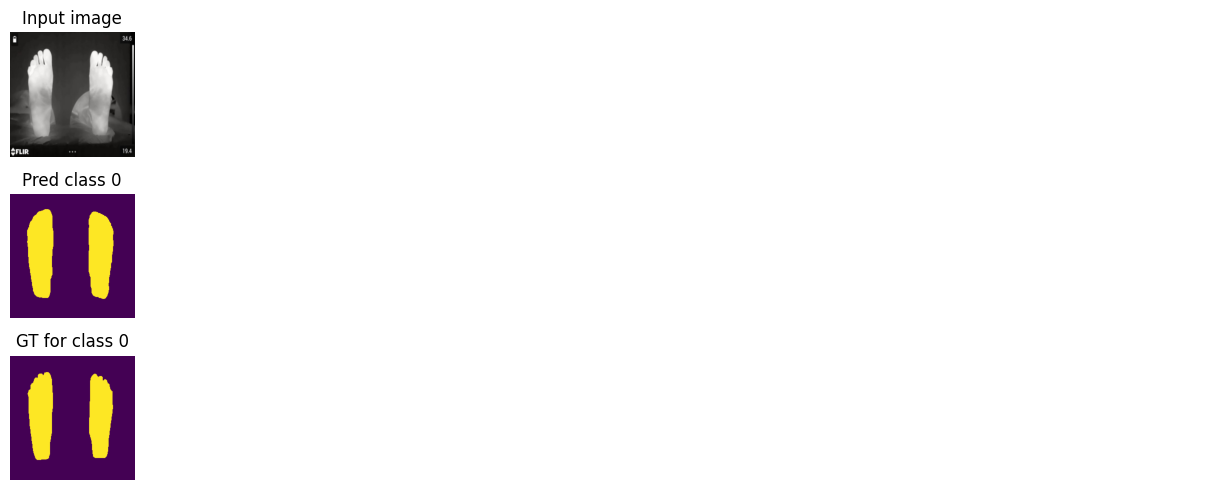

Train loss: 0.36218 | Time: 3m 3s | Val loss: 0.30711
Train_DICE_avg: 0.92021 | Train_Jaccard_avg: 0.85694 | Train_Sensitivity_avg: 0.86288 | Train_Specificity_avg: 0.99684 
Class 0 - Train_DICE: 0.92021 | Train_Jaccard: 0.85694 | Train_Sensitivity: 0.86288 | Train_Specificity: 0.99684 
Val_DICE_avg: 0.93906 | Val_Jaccard_avg: 0.88724 | Val_Sensitivity_avg: 0.90237 | Val_Specificity_avg: 0.99002 
Class 0 - Val_DICE: 0.93906 | Val_Jaccard: 0.88724 | Val_Sensitivity: 0.90237 | Val_Specificity: 0.99002 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.35922 | Time: 3m 7s | Val loss: 0.30863
Train_DICE_avg: 0.92142 | Train_Jaccard_avg: 0.85973 | Train_Sensitivity_avg: 0.86565 | Train_Specificity_avg: 0.99691 
Class 0 - Train_DICE: 0.92142 | Train_Jaccard: 0.85973 | Train_Sensitivity: 0.86565 | Train_Specificity: 0.99691 
Val_DICE_avg: 0.93962 | Val_Jaccard_avg: 0.88835 | Val_Sensitivity_avg: 0.90599 | Val_Specificity_avg: 0.98789 
Class 0 - Val_DICE: 0.93962 | Val_Jaccard: 0.88835 | Val_Sensitivity: 0.90599 | Val_Specificity: 0.98789 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.35942 | Time: 3m 10s | Val loss: 0.30621
Train_DICE_avg: 0.91956 | Train_Jaccard_avg: 0.85638 | Train_Sensitivity_avg: 0.86331 | Train_Specificity_avg: 0.99579 
Class 0 - Train_DICE: 0.91956 | Train_Jaccard: 0.85638 | Train_Sensitivity: 0.86331 | Train_Specificity: 0.99579 
Val_DICE_avg: 0.94103 | Val_Jaccard_avg: 0.89072 | Val_Sensitivity_avg: 0.90588 | Val_Specificity_avg: 0.98966 
Class 0 - Val_DICE: 0.94103 | Val_Jaccard: 0.89072 | Val_Sensitivity: 0.90588 | Val_Specificity: 0.98966 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.36004 | Time: 3m 14s | Val loss: 0.30344
Train_DICE_avg: 0.92155 | Train_Jaccard_avg: 0.85926 | Train_Sensitivity_avg: 0.86545 | Train_Specificity_avg: 0.99658 
Class 0 - Train_DICE: 0.92155 | Train_Jaccard: 0.85926 | Train_Sensitivity: 0.86545 | Train_Specificity: 0.99658 
Val_DICE_avg: 0.94164 | Val_Jaccard_avg: 0.89207 | Val_Sensitivity_avg: 0.90850 | Val_Specificity_avg: 0.98860 
Class 0 - Val_DICE: 0.94164 | Val_Jaccard: 0.89207 | Val_Sensitivity: 0.90850 | Val_Specificity: 0.98860 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.35766 | Time: 3m 18s | Val loss: 0.29739
Train_DICE_avg: 0.92112 | Train_Jaccard_avg: 0.85963 | Train_Sensitivity_avg: 0.86527 | Train_Specificity_avg: 0.99685 
Class 0 - Train_DICE: 0.92112 | Train_Jaccard: 0.85963 | Train_Sensitivity: 0.86527 | Train_Specificity: 0.99685 
Val_DICE_avg: 0.94358 | Val_Jaccard_avg: 0.89544 | Val_Sensitivity_avg: 0.90815 | Val_Specificity_avg: 0.99147 
Class 0 - Val_DICE: 0.94358 | Val_Jaccard: 0.89544 | Val_Sensitivity: 0.90815 | Val_Specificity: 0.99147 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


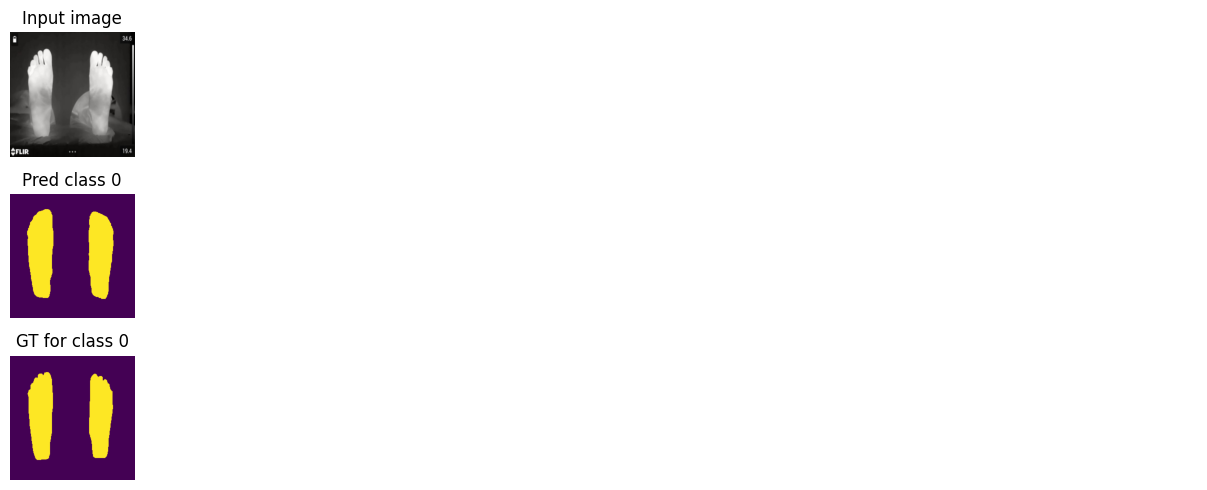

Train loss: 0.35740 | Time: 3m 22s | Val loss: 0.29885
Train_DICE_avg: 0.92252 | Train_Jaccard_avg: 0.86140 | Train_Sensitivity_avg: 0.86706 | Train_Specificity_avg: 0.99663 
Class 0 - Train_DICE: 0.92252 | Train_Jaccard: 0.86140 | Train_Sensitivity: 0.86706 | Train_Specificity: 0.99663 
Val_DICE_avg: 0.94336 | Val_Jaccard_avg: 0.89498 | Val_Sensitivity_avg: 0.90622 | Val_Specificity_avg: 0.99216 
Class 0 - Val_DICE: 0.94336 | Val_Jaccard: 0.89498 | Val_Sensitivity: 0.90622 | Val_Specificity: 0.99216 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.35729 | Time: 3m 26s | Val loss: 0.29630
Train_DICE_avg: 0.92295 | Train_Jaccard_avg: 0.86277 | Train_Sensitivity_avg: 0.86914 | Train_Specificity_avg: 0.99652 
Class 0 - Train_DICE: 0.92295 | Train_Jaccard: 0.86277 | Train_Sensitivity: 0.86914 | Train_Specificity: 0.99652 
Val_DICE_avg: 0.94249 | Val_Jaccard_avg: 0.89315 | Val_Sensitivity_avg: 0.90387 | Val_Specificity_avg: 0.99269 
Class 0 - Val_DICE: 0.94249 | Val_Jaccard: 0.89315 | Val_Sensitivity: 0.90387 | Val_Specificity: 0.99269 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.35657 | Time: 3m 30s | Val loss: 0.30222
Train_DICE_avg: 0.92513 | Train_Jaccard_avg: 0.86495 | Train_Sensitivity_avg: 0.86986 | Train_Specificity_avg: 0.99724 
Class 0 - Train_DICE: 0.92513 | Train_Jaccard: 0.86495 | Train_Sensitivity: 0.86986 | Train_Specificity: 0.99724 
Val_DICE_avg: 0.94234 | Val_Jaccard_avg: 0.89280 | Val_Sensitivity_avg: 0.90470 | Val_Specificity_avg: 0.99171 
Class 0 - Val_DICE: 0.94234 | Val_Jaccard: 0.89280 | Val_Sensitivity: 0.90470 | Val_Specificity: 0.99171 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.35646 | Time: 3m 34s | Val loss: 0.30138
Train_DICE_avg: 0.92524 | Train_Jaccard_avg: 0.86576 | Train_Sensitivity_avg: 0.87159 | Train_Specificity_avg: 0.99660 
Class 0 - Train_DICE: 0.92524 | Train_Jaccard: 0.86576 | Train_Sensitivity: 0.87159 | Train_Specificity: 0.99660 
Val_DICE_avg: 0.94473 | Val_Jaccard_avg: 0.89707 | Val_Sensitivity_avg: 0.91003 | Val_Specificity_avg: 0.99122 
Class 0 - Val_DICE: 0.94473 | Val_Jaccard: 0.89707 | Val_Sensitivity: 0.91003 | Val_Specificity: 0.99122 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.35615 | Time: 3m 38s | Val loss: 0.30016
Train_DICE_avg: 0.92820 | Train_Jaccard_avg: 0.86942 | Train_Sensitivity_avg: 0.87426 | Train_Specificity_avg: 0.99752 
Class 0 - Train_DICE: 0.92820 | Train_Jaccard: 0.86942 | Train_Sensitivity: 0.87426 | Train_Specificity: 0.99752 
Val_DICE_avg: 0.94465 | Val_Jaccard_avg: 0.89688 | Val_Sensitivity_avg: 0.90873 | Val_Specificity_avg: 0.99193 
Class 0 - Val_DICE: 0.94465 | Val_Jaccard: 0.89688 | Val_Sensitivity: 0.90873 | Val_Specificity: 0.99193 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


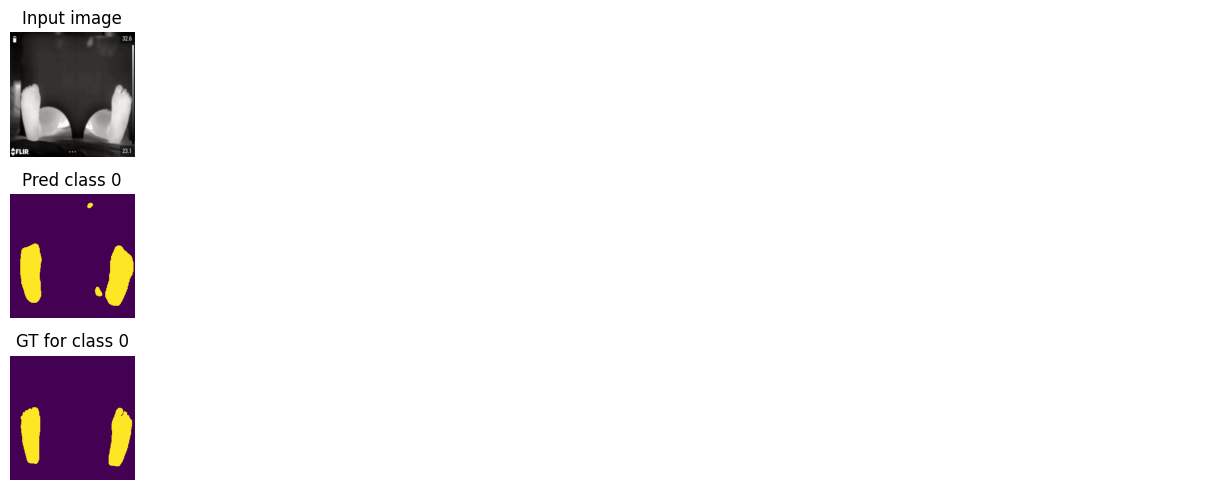

Train loss: 0.35542 | Time: 3m 42s | Val loss: 0.30199
Train_DICE_avg: 0.92590 | Train_Jaccard_avg: 0.86623 | Train_Sensitivity_avg: 0.87090 | Train_Specificity_avg: 0.99749 
Class 0 - Train_DICE: 0.92590 | Train_Jaccard: 0.86623 | Train_Sensitivity: 0.87090 | Train_Specificity: 0.99749 
Val_DICE_avg: 0.94095 | Val_Jaccard_avg: 0.89021 | Val_Sensitivity_avg: 0.89907 | Val_Specificity_avg: 0.99335 
Class 0 - Val_DICE: 0.94095 | Val_Jaccard: 0.89021 | Val_Sensitivity: 0.89907 | Val_Specificity: 0.99335 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.35795 | Time: 3m 46s | Val loss: 0.30356
Train_DICE_avg: 0.92582 | Train_Jaccard_avg: 0.86575 | Train_Sensitivity_avg: 0.87137 | Train_Specificity_avg: 0.99684 
Class 0 - Train_DICE: 0.92582 | Train_Jaccard: 0.86575 | Train_Sensitivity: 0.87137 | Train_Specificity: 0.99684 
Val_DICE_avg: 0.94052 | Val_Jaccard_avg: 0.88945 | Val_Sensitivity_avg: 0.89836 | Val_Specificity_avg: 0.99322 
Class 0 - Val_DICE: 0.94052 | Val_Jaccard: 0.88945 | Val_Sensitivity: 0.89836 | Val_Specificity: 0.99322 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.35556 | Time: 3m 50s | Val loss: 0.30288
Train_DICE_avg: 0.92695 | Train_Jaccard_avg: 0.86742 | Train_Sensitivity_avg: 0.87215 | Train_Specificity_avg: 0.99747 
Class 0 - Train_DICE: 0.92695 | Train_Jaccard: 0.86742 | Train_Sensitivity: 0.87215 | Train_Specificity: 0.99747 
Val_DICE_avg: 0.94402 | Val_Jaccard_avg: 0.89555 | Val_Sensitivity_avg: 0.90609 | Val_Specificity_avg: 0.99222 
Class 0 - Val_DICE: 0.94402 | Val_Jaccard: 0.89555 | Val_Sensitivity: 0.90609 | Val_Specificity: 0.99222 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.35518 | Time: 3m 54s | Val loss: 0.29209
Train_DICE_avg: 0.92773 | Train_Jaccard_avg: 0.86902 | Train_Sensitivity_avg: 0.87551 | Train_Specificity_avg: 0.99650 
Class 0 - Train_DICE: 0.92773 | Train_Jaccard: 0.86902 | Train_Sensitivity: 0.87551 | Train_Specificity: 0.99650 
Val_DICE_avg: 0.94874 | Val_Jaccard_avg: 0.90411 | Val_Sensitivity_avg: 0.91973 | Val_Specificity_avg: 0.98922 
Class 0 - Val_DICE: 0.94874 | Val_Jaccard: 0.90411 | Val_Sensitivity: 0.91973 | Val_Specificity: 0.98922 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.35608 | Time: 3m 58s | Val loss: 0.29648
Train_DICE_avg: 0.92442 | Train_Jaccard_avg: 0.86459 | Train_Sensitivity_avg: 0.86959 | Train_Specificity_avg: 0.99717 
Class 0 - Train_DICE: 0.92442 | Train_Jaccard: 0.86459 | Train_Sensitivity: 0.86959 | Train_Specificity: 0.99717 
Val_DICE_avg: 0.94596 | Val_Jaccard_avg: 0.89911 | Val_Sensitivity_avg: 0.91226 | Val_Specificity_avg: 0.99031 
Class 0 - Val_DICE: 0.94596 | Val_Jaccard: 0.89911 | Val_Sensitivity: 0.91226 | Val_Specificity: 0.99031 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


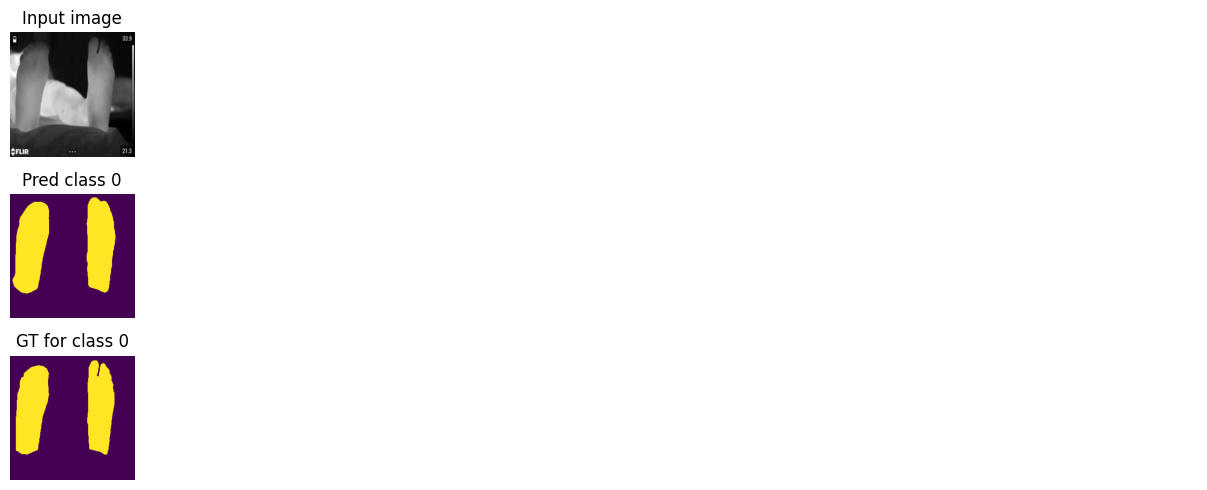

Train loss: 0.35442 | Time: 4m 2s | Val loss: 0.29647
Train_DICE_avg: 0.93098 | Train_Jaccard_avg: 0.87382 | Train_Sensitivity_avg: 0.87981 | Train_Specificity_avg: 0.99659 
Class 0 - Train_DICE: 0.93098 | Train_Jaccard: 0.87382 | Train_Sensitivity: 0.87981 | Train_Specificity: 0.99659 
Val_DICE_avg: 0.94583 | Val_Jaccard_avg: 0.89887 | Val_Sensitivity_avg: 0.91258 | Val_Specificity_avg: 0.98994 
Class 0 - Val_DICE: 0.94583 | Val_Jaccard: 0.89887 | Val_Sensitivity: 0.91258 | Val_Specificity: 0.98994 


Training DICE,▁▃▄▄▄▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████
Training Jaccard,▁▂▃▄▄▄▅▅▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇███████████████
Training Loss,█▆▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▃▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████
Training Specificity,▁▁▁▂▂▄▄▃▄▅▆▆▆▆▆▆▆▆▇▇▆▇▇▇▇▇▇█████████████
Validation DICE,▁▃▄▃▄▄▅▅▄▆▅▆▆▆▇▆▇▇▇▇▇▇█▇▇███████████████
Validation Jaccard,▁▄▅▅▆▆▅▆▆▇▇▇▆▇▇▇▇▇█▇█▇██████████████████
Validation Loss,█▇▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▁▄▅▅▅▆▅▇▅▆▆▇▇▇▇▇▇▇▇▇▇██▇████████████████
Validation Specificity,▆▁▃▅▆▇▇▁▇▆▇▇▇▆▁▇▇▇▇▆▇▇██▇███▇███████████
Training DICE,0.93098



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(1).pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 172MB/s]


<All keys matched successfully>

In [12]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]


Global Performance Metrics:
Loss mean: 0.31391, std: 0.00000
Dice Coefficient mean: 0.92990, std: 0.06269
Jaccard Index mean: 0.87467, std: 0.09720
Sensitivity mean: 0.96134, std: 0.08114
Specificity mean: 0.97290, std: 0.01369

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92990, std: 0.06269
Jaccard mean: 0.87467, std: 0.09720
Sensitivity mean: 0.96134, std: 0.08114
Specificity mean: 0.97290, std: 0.01369


### Cross-Entropy Loss

In [13]:
config["Activation function"] = None
config["Loss function"] = "CrossEntropy"
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-ResUNet-CrossEntropy"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.55 GB
GPU Memory - Reserved: 0.96 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


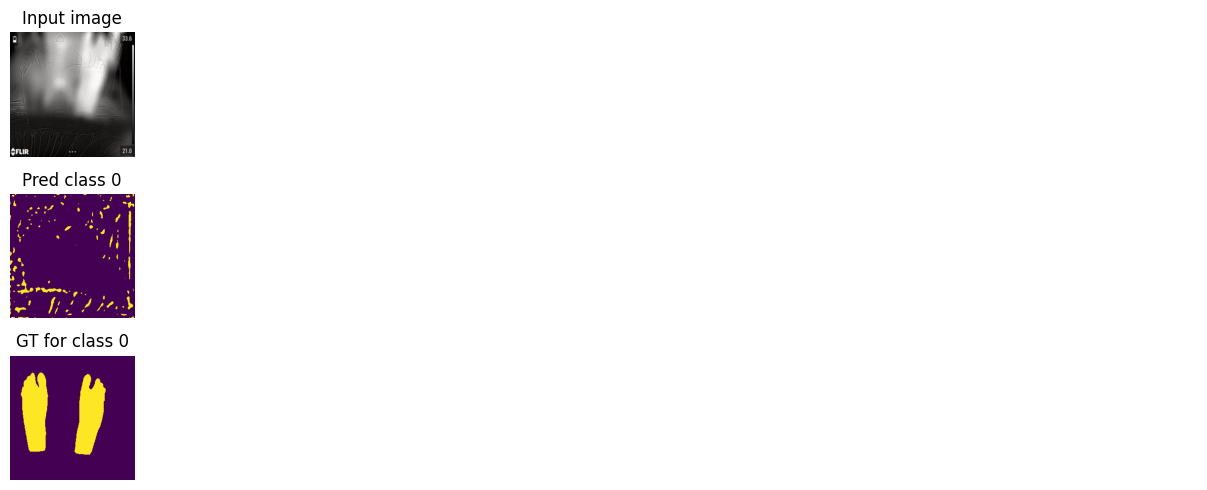

Train loss: 0.69346 | Time: 0m 4s | Val loss: 0.68874
Train_DICE_avg: 0.26327 | Train_Jaccard_avg: 0.16024 | Train_Sensitivity_avg: 0.39727 | Train_Specificity_avg: 0.78251 
Class 0 - Train_DICE: 0.26327 | Train_Jaccard: 0.16024 | Train_Sensitivity: 0.39727 | Train_Specificity: 0.78251 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.59912 | Time: 0m 7s | Val loss: 0.68009
Train_DICE_avg: 0.52538 | Train_Jaccard_avg: 0.37729 | Train_Sensitivity_avg: 0.63915 | Train_Specificity_avg: 0.84859 
Class 0 - Train_DICE: 0.52538 | Train_Jaccard: 0.37729 | Train_Sensitivity: 0.63915 | Train_Specificity: 0.84859 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.53495 | Time: 0m 11s | Val loss: 0.61309
Train_DICE_avg: 0.62006 | Train_Jaccard_avg: 0.47327 | Train_Sensitivity_avg: 0.75758 | Train_Specificity_avg: 0.87200 
Class 0 - Train_DICE: 0.62006 | Train_Jaccard: 0.47327 | Train_Sensitivity: 0.75758 | Train_Specificity: 0.87200 
Val_DICE_avg: 0.25300 | Val_Jaccard_avg: 0.16168 | Val_Sensitivity_avg: 0.99839 | Val_Specificity_avg: 0.77422 
Class 0 - Val_DICE: 0.25300 | Val_Jaccard: 0.16168 | Val_Sensitivity: 0.99839 | Val_Specificity: 0.77422 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.49200 | Time: 0m 15s | Val loss: 0.49728
Train_DICE_avg: 0.66233 | Train_Jaccard_avg: 0.51845 | Train_Sensitivity_avg: 0.79616 | Train_Specificity_avg: 0.88194 
Class 0 - Train_DICE: 0.66233 | Train_Jaccard: 0.51845 | Train_Sensitivity: 0.79616 | Train_Specificity: 0.88194 
Val_DICE_avg: 0.68141 | Val_Jaccard_avg: 0.54170 | Val_Sensitivity_avg: 0.93957 | Val_Specificity_avg: 0.86520 
Class 0 - Val_DICE: 0.68141 | Val_Jaccard: 0.54170 | Val_Sensitivity: 0.93957 | Val_Specificity: 0.86520 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.45602 | Time: 0m 19s | Val loss: 0.42934
Train_DICE_avg: 0.71190 | Train_Jaccard_avg: 0.56867 | Train_Sensitivity_avg: 0.83769 | Train_Specificity_avg: 0.89065 
Class 0 - Train_DICE: 0.71190 | Train_Jaccard: 0.56867 | Train_Sensitivity: 0.83769 | Train_Specificity: 0.89065 
Val_DICE_avg: 0.77305 | Val_Jaccard_avg: 0.64751 | Val_Sensitivity_avg: 0.87397 | Val_Specificity_avg: 0.90782 
Class 0 - Val_DICE: 0.77305 | Val_Jaccard: 0.64751 | Val_Sensitivity: 0.87397 | Val_Specificity: 0.90782 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


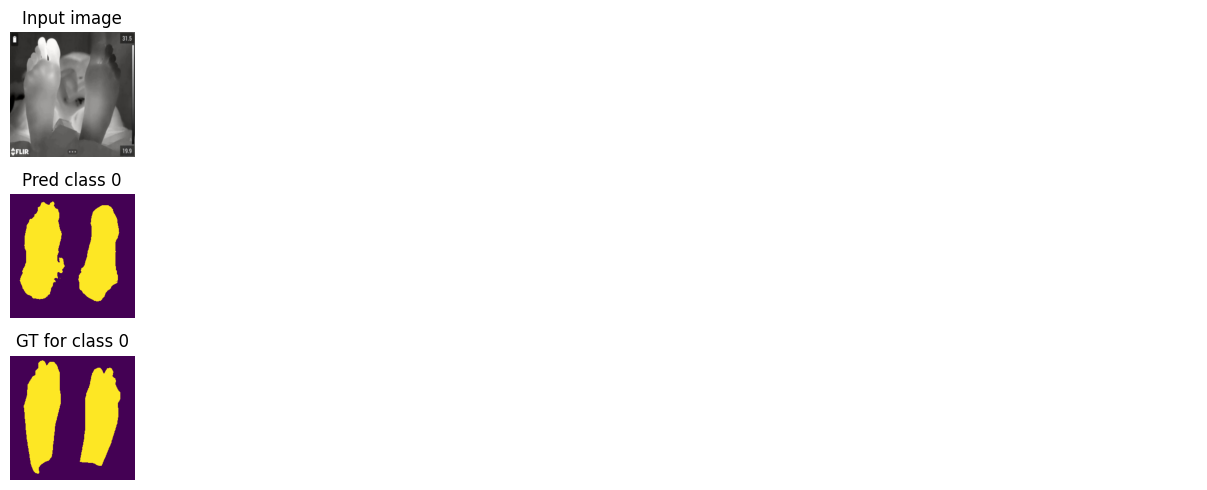

Train loss: 0.43267 | Time: 0m 23s | Val loss: 0.38894
Train_DICE_avg: 0.74396 | Train_Jaccard_avg: 0.60641 | Train_Sensitivity_avg: 0.84714 | Train_Specificity_avg: 0.89994 
Class 0 - Train_DICE: 0.74396 | Train_Jaccard: 0.60641 | Train_Sensitivity: 0.84714 | Train_Specificity: 0.89994 
Val_DICE_avg: 0.78961 | Val_Jaccard_avg: 0.66721 | Val_Sensitivity_avg: 0.87125 | Val_Specificity_avg: 0.91380 
Class 0 - Val_DICE: 0.78961 | Val_Jaccard: 0.66721 | Val_Sensitivity: 0.87125 | Val_Specificity: 0.91380 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.41865 | Time: 0m 27s | Val loss: 0.37269
Train_DICE_avg: 0.75381 | Train_Jaccard_avg: 0.62077 | Train_Sensitivity_avg: 0.84782 | Train_Specificity_avg: 0.90517 
Class 0 - Train_DICE: 0.75381 | Train_Jaccard: 0.62077 | Train_Sensitivity: 0.84782 | Train_Specificity: 0.90517 
Val_DICE_avg: 0.81863 | Val_Jaccard_avg: 0.70333 | Val_Sensitivity_avg: 0.85623 | Val_Specificity_avg: 0.93111 
Class 0 - Val_DICE: 0.81863 | Val_Jaccard: 0.70333 | Val_Sensitivity: 0.85623 | Val_Specificity: 0.93111 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.40352 | Time: 0m 31s | Val loss: 0.35284
Train_DICE_avg: 0.77541 | Train_Jaccard_avg: 0.64655 | Train_Sensitivity_avg: 0.86834 | Train_Specificity_avg: 0.91263 
Class 0 - Train_DICE: 0.77541 | Train_Jaccard: 0.64655 | Train_Sensitivity: 0.86834 | Train_Specificity: 0.91263 
Val_DICE_avg: 0.81488 | Val_Jaccard_avg: 0.69914 | Val_Sensitivity_avg: 0.90676 | Val_Specificity_avg: 0.91725 
Class 0 - Val_DICE: 0.81488 | Val_Jaccard: 0.69914 | Val_Sensitivity: 0.90676 | Val_Specificity: 0.91725 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.39447 | Time: 0m 35s | Val loss: 0.33928
Train_DICE_avg: 0.79012 | Train_Jaccard_avg: 0.66532 | Train_Sensitivity_avg: 0.86302 | Train_Specificity_avg: 0.91696 
Class 0 - Train_DICE: 0.79012 | Train_Jaccard: 0.66532 | Train_Sensitivity: 0.86302 | Train_Specificity: 0.91696 
Val_DICE_avg: 0.82546 | Val_Jaccard_avg: 0.71408 | Val_Sensitivity_avg: 0.92682 | Val_Specificity_avg: 0.91649 
Class 0 - Val_DICE: 0.82546 | Val_Jaccard: 0.71408 | Val_Sensitivity: 0.92682 | Val_Specificity: 0.91649 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.38403 | Time: 0m 39s | Val loss: 0.34089
Train_DICE_avg: 0.80444 | Train_Jaccard_avg: 0.68695 | Train_Sensitivity_avg: 0.87816 | Train_Specificity_avg: 0.92017 
Class 0 - Train_DICE: 0.80444 | Train_Jaccard: 0.68695 | Train_Sensitivity: 0.87816 | Train_Specificity: 0.92017 
Val_DICE_avg: 0.84657 | Val_Jaccard_avg: 0.74475 | Val_Sensitivity_avg: 0.90762 | Val_Specificity_avg: 0.93039 
Class 0 - Val_DICE: 0.84657 | Val_Jaccard: 0.74475 | Val_Sensitivity: 0.90762 | Val_Specificity: 0.93039 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


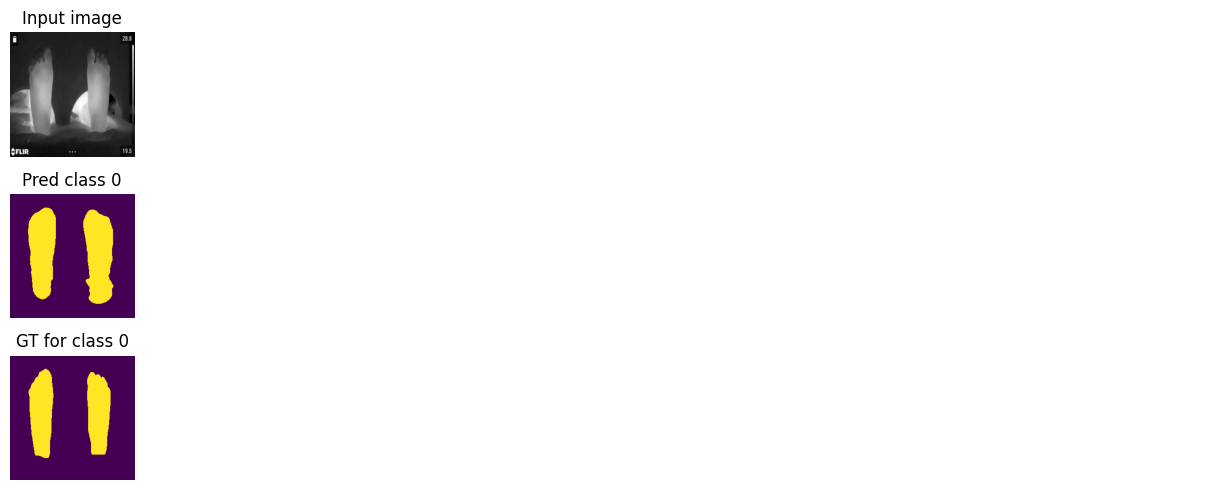

Train loss: 0.38602 | Time: 0m 43s | Val loss: 0.33390
Train_DICE_avg: 0.78357 | Train_Jaccard_avg: 0.66295 | Train_Sensitivity_avg: 0.87741 | Train_Specificity_avg: 0.91342 
Class 0 - Train_DICE: 0.78357 | Train_Jaccard: 0.66295 | Train_Sensitivity: 0.87741 | Train_Specificity: 0.91342 
Val_DICE_avg: 0.83482 | Val_Jaccard_avg: 0.72458 | Val_Sensitivity_avg: 0.92908 | Val_Specificity_avg: 0.91918 
Class 0 - Val_DICE: 0.83482 | Val_Jaccard: 0.72458 | Val_Sensitivity: 0.92908 | Val_Specificity: 0.91918 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.37388 | Time: 0m 47s | Val loss: 0.32462
Train_DICE_avg: 0.80725 | Train_Jaccard_avg: 0.69061 | Train_Sensitivity_avg: 0.88685 | Train_Specificity_avg: 0.92095 
Class 0 - Train_DICE: 0.80725 | Train_Jaccard: 0.69061 | Train_Sensitivity: 0.88685 | Train_Specificity: 0.92095 
Val_DICE_avg: 0.82374 | Val_Jaccard_avg: 0.71282 | Val_Sensitivity_avg: 0.93977 | Val_Specificity_avg: 0.91108 
Class 0 - Val_DICE: 0.82374 | Val_Jaccard: 0.71282 | Val_Sensitivity: 0.93977 | Val_Specificity: 0.91108 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.36641 | Time: 0m 51s | Val loss: 0.31438
Train_DICE_avg: 0.82727 | Train_Jaccard_avg: 0.71760 | Train_Sensitivity_avg: 0.88831 | Train_Specificity_avg: 0.92915 
Class 0 - Train_DICE: 0.82727 | Train_Jaccard: 0.71760 | Train_Sensitivity: 0.88831 | Train_Specificity: 0.92915 
Val_DICE_avg: 0.85815 | Val_Jaccard_avg: 0.76065 | Val_Sensitivity_avg: 0.94435 | Val_Specificity_avg: 0.92685 
Class 0 - Val_DICE: 0.85815 | Val_Jaccard: 0.76065 | Val_Sensitivity: 0.94435 | Val_Specificity: 0.92685 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.35275 | Time: 0m 55s | Val loss: 0.31175
Train_DICE_avg: 0.84483 | Train_Jaccard_avg: 0.74475 | Train_Sensitivity_avg: 0.91239 | Train_Specificity_avg: 0.93423 
Class 0 - Train_DICE: 0.84483 | Train_Jaccard: 0.74475 | Train_Sensitivity: 0.91239 | Train_Specificity: 0.93423 
Val_DICE_avg: 0.86518 | Val_Jaccard_avg: 0.77292 | Val_Sensitivity_avg: 0.95470 | Val_Specificity_avg: 0.92971 
Class 0 - Val_DICE: 0.86518 | Val_Jaccard: 0.77292 | Val_Sensitivity: 0.95470 | Val_Specificity: 0.92971 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.34625 | Time: 0m 59s | Val loss: 0.31468
Train_DICE_avg: 0.85779 | Train_Jaccard_avg: 0.76139 | Train_Sensitivity_avg: 0.91113 | Train_Specificity_avg: 0.93970 
Class 0 - Train_DICE: 0.85779 | Train_Jaccard: 0.76139 | Train_Sensitivity: 0.91113 | Train_Specificity: 0.93970 
Val_DICE_avg: 0.89857 | Val_Jaccard_avg: 0.82105 | Val_Sensitivity_avg: 0.92597 | Val_Specificity_avg: 0.95106 
Class 0 - Val_DICE: 0.89857 | Val_Jaccard: 0.82105 | Val_Sensitivity: 0.92597 | Val_Specificity: 0.95106 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


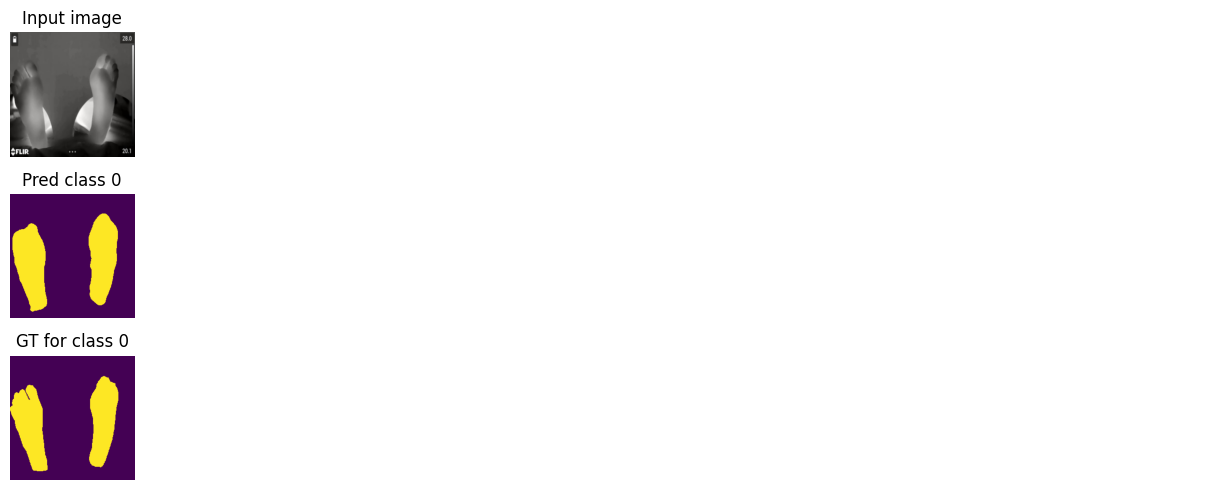

Train loss: 0.33736 | Time: 1m 3s | Val loss: 0.30666
Train_DICE_avg: 0.86976 | Train_Jaccard_avg: 0.77929 | Train_Sensitivity_avg: 0.91772 | Train_Specificity_avg: 0.94420 
Class 0 - Train_DICE: 0.86976 | Train_Jaccard: 0.77929 | Train_Sensitivity: 0.91772 | Train_Specificity: 0.94420 
Val_DICE_avg: 0.89066 | Val_Jaccard_avg: 0.81036 | Val_Sensitivity_avg: 0.95446 | Val_Specificity_avg: 0.93985 
Class 0 - Val_DICE: 0.89066 | Val_Jaccard: 0.81036 | Val_Sensitivity: 0.95446 | Val_Specificity: 0.93985 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.33071 | Time: 1m 7s | Val loss: 0.30718
Train_DICE_avg: 0.87689 | Train_Jaccard_avg: 0.79019 | Train_Sensitivity_avg: 0.92078 | Train_Specificity_avg: 0.94832 
Class 0 - Train_DICE: 0.87689 | Train_Jaccard: 0.79019 | Train_Sensitivity: 0.92078 | Train_Specificity: 0.94832 
Val_DICE_avg: 0.90861 | Val_Jaccard_avg: 0.83761 | Val_Sensitivity_avg: 0.95310 | Val_Specificity_avg: 0.95015 
Class 0 - Val_DICE: 0.90861 | Val_Jaccard: 0.83761 | Val_Sensitivity: 0.95310 | Val_Specificity: 0.95015 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.32497 | Time: 1m 11s | Val loss: 0.29917
Train_DICE_avg: 0.89079 | Train_Jaccard_avg: 0.81004 | Train_Sensitivity_avg: 0.92523 | Train_Specificity_avg: 0.95214 
Class 0 - Train_DICE: 0.89079 | Train_Jaccard: 0.81004 | Train_Sensitivity: 0.92523 | Train_Specificity: 0.95214 
Val_DICE_avg: 0.90321 | Val_Jaccard_avg: 0.83040 | Val_Sensitivity_avg: 0.96734 | Val_Specificity_avg: 0.94544 
Class 0 - Val_DICE: 0.90321 | Val_Jaccard: 0.83040 | Val_Sensitivity: 0.96734 | Val_Specificity: 0.94544 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.32209 | Time: 1m 14s | Val loss: 0.29904
Train_DICE_avg: 0.89053 | Train_Jaccard_avg: 0.81027 | Train_Sensitivity_avg: 0.92915 | Train_Specificity_avg: 0.95224 
Class 0 - Train_DICE: 0.89053 | Train_Jaccard: 0.81027 | Train_Sensitivity: 0.92915 | Train_Specificity: 0.95224 
Val_DICE_avg: 0.90923 | Val_Jaccard_avg: 0.84003 | Val_Sensitivity_avg: 0.96807 | Val_Specificity_avg: 0.94840 
Class 0 - Val_DICE: 0.90923 | Val_Jaccard: 0.84003 | Val_Sensitivity: 0.96807 | Val_Specificity: 0.94840 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.31558 | Time: 1m 18s | Val loss: 0.28664
Train_DICE_avg: 0.89653 | Train_Jaccard_avg: 0.82192 | Train_Sensitivity_avg: 0.92923 | Train_Specificity_avg: 0.95685 
Class 0 - Train_DICE: 0.89653 | Train_Jaccard: 0.82192 | Train_Sensitivity: 0.92923 | Train_Specificity: 0.95685 
Val_DICE_avg: 0.91303 | Val_Jaccard_avg: 0.84626 | Val_Sensitivity_avg: 0.96533 | Val_Specificity_avg: 0.95121 
Class 0 - Val_DICE: 0.91303 | Val_Jaccard: 0.84626 | Val_Sensitivity: 0.96533 | Val_Specificity: 0.95121 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


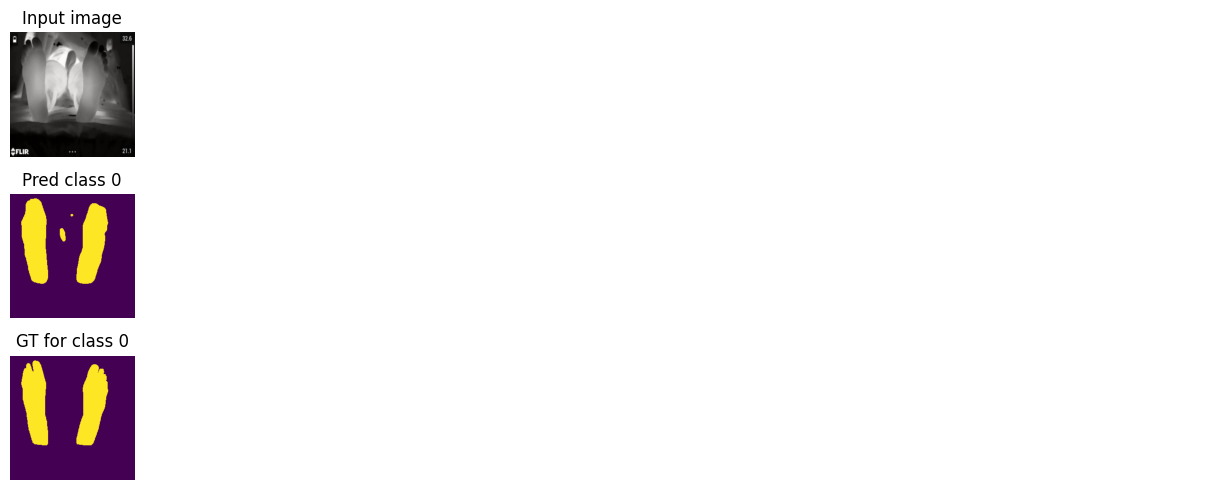

Train loss: 0.32094 | Time: 1m 23s | Val loss: 0.29008
Train_DICE_avg: 0.88414 | Train_Jaccard_avg: 0.80270 | Train_Sensitivity_avg: 0.92109 | Train_Specificity_avg: 0.95174 
Class 0 - Train_DICE: 0.88414 | Train_Jaccard: 0.80270 | Train_Sensitivity: 0.92109 | Train_Specificity: 0.95174 
Val_DICE_avg: 0.88683 | Val_Jaccard_avg: 0.81379 | Val_Sensitivity_avg: 0.96264 | Val_Specificity_avg: 0.94691 
Class 0 - Val_DICE: 0.88683 | Val_Jaccard: 0.81379 | Val_Sensitivity: 0.96264 | Val_Specificity: 0.94691 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.31355 | Time: 1m 27s | Val loss: 0.28809
Train_DICE_avg: 0.88671 | Train_Jaccard_avg: 0.80617 | Train_Sensitivity_avg: 0.94401 | Train_Specificity_avg: 0.94942 
Class 0 - Train_DICE: 0.88671 | Train_Jaccard: 0.80617 | Train_Sensitivity: 0.94401 | Train_Specificity: 0.94942 
Val_DICE_avg: 0.91617 | Val_Jaccard_avg: 0.85133 | Val_Sensitivity_avg: 0.96090 | Val_Specificity_avg: 0.95546 
Class 0 - Val_DICE: 0.91617 | Val_Jaccard: 0.85133 | Val_Sensitivity: 0.96090 | Val_Specificity: 0.95546 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.30547 | Time: 1m 30s | Val loss: 0.29197
Train_DICE_avg: 0.91158 | Train_Jaccard_avg: 0.84257 | Train_Sensitivity_avg: 0.93462 | Train_Specificity_avg: 0.96186 
Class 0 - Train_DICE: 0.91158 | Train_Jaccard: 0.84257 | Train_Sensitivity: 0.93462 | Train_Specificity: 0.96186 
Val_DICE_avg: 0.92474 | Val_Jaccard_avg: 0.86415 | Val_Sensitivity_avg: 0.95902 | Val_Specificity_avg: 0.96045 
Class 0 - Val_DICE: 0.92474 | Val_Jaccard: 0.86415 | Val_Sensitivity: 0.95902 | Val_Specificity: 0.96045 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.30296 | Time: 1m 34s | Val loss: 0.29282
Train_DICE_avg: 0.91027 | Train_Jaccard_avg: 0.84059 | Train_Sensitivity_avg: 0.94085 | Train_Specificity_avg: 0.95942 
Class 0 - Train_DICE: 0.91027 | Train_Jaccard: 0.84059 | Train_Sensitivity: 0.94085 | Train_Specificity: 0.95942 
Val_DICE_avg: 0.92432 | Val_Jaccard_avg: 0.86321 | Val_Sensitivity_avg: 0.96334 | Val_Specificity_avg: 0.95672 
Class 0 - Val_DICE: 0.92432 | Val_Jaccard: 0.86321 | Val_Sensitivity: 0.96334 | Val_Specificity: 0.95672 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.29893 | Time: 1m 38s | Val loss: 0.28513
Train_DICE_avg: 0.91448 | Train_Jaccard_avg: 0.84892 | Train_Sensitivity_avg: 0.93870 | Train_Specificity_avg: 0.96488 
Class 0 - Train_DICE: 0.91448 | Train_Jaccard: 0.84892 | Train_Sensitivity: 0.93870 | Train_Specificity: 0.96488 
Val_DICE_avg: 0.90682 | Val_Jaccard_avg: 0.83869 | Val_Sensitivity_avg: 0.97770 | Val_Specificity_avg: 0.94570 
Class 0 - Val_DICE: 0.90682 | Val_Jaccard: 0.83869 | Val_Sensitivity: 0.97770 | Val_Specificity: 0.94570 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


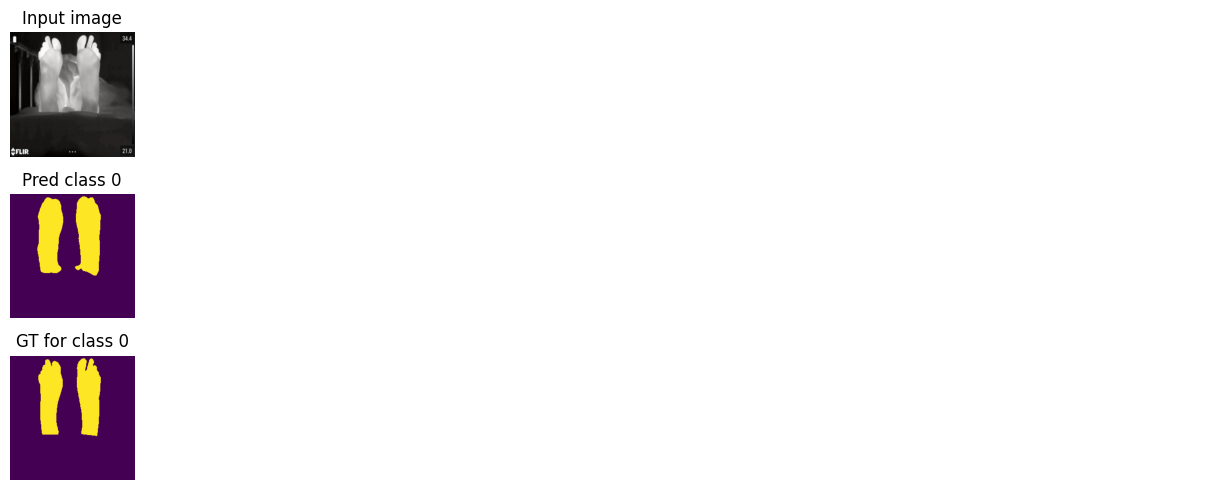

Train loss: 0.29275 | Time: 1m 42s | Val loss: 0.28078
Train_DICE_avg: 0.92337 | Train_Jaccard_avg: 0.86232 | Train_Sensitivity_avg: 0.94600 | Train_Specificity_avg: 0.96745 
Class 0 - Train_DICE: 0.92337 | Train_Jaccard: 0.86232 | Train_Sensitivity: 0.94600 | Train_Specificity: 0.96745 
Val_DICE_avg: 0.92837 | Val_Jaccard_avg: 0.87085 | Val_Sensitivity_avg: 0.97175 | Val_Specificity_avg: 0.95846 
Class 0 - Val_DICE: 0.92837 | Val_Jaccard: 0.87085 | Val_Sensitivity: 0.97175 | Val_Specificity: 0.95846 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.29128 | Time: 1m 46s | Val loss: 0.27547
Train_DICE_avg: 0.92271 | Train_Jaccard_avg: 0.86125 | Train_Sensitivity_avg: 0.94458 | Train_Specificity_avg: 0.96619 
Class 0 - Train_DICE: 0.92271 | Train_Jaccard: 0.86125 | Train_Sensitivity: 0.94458 | Train_Specificity: 0.96619 
Val_DICE_avg: 0.93316 | Val_Jaccard_avg: 0.87771 | Val_Sensitivity_avg: 0.97244 | Val_Specificity_avg: 0.96144 
Class 0 - Val_DICE: 0.93316 | Val_Jaccard: 0.87771 | Val_Sensitivity: 0.97244 | Val_Specificity: 0.96144 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.28873 | Time: 1m 50s | Val loss: 0.26235
Train_DICE_avg: 0.92815 | Train_Jaccard_avg: 0.87038 | Train_Sensitivity_avg: 0.94859 | Train_Specificity_avg: 0.96846 
Class 0 - Train_DICE: 0.92815 | Train_Jaccard: 0.87038 | Train_Sensitivity: 0.94859 | Train_Specificity: 0.96846 
Val_DICE_avg: 0.93313 | Val_Jaccard_avg: 0.87854 | Val_Sensitivity_avg: 0.97311 | Val_Specificity_avg: 0.96402 
Class 0 - Val_DICE: 0.93313 | Val_Jaccard: 0.87854 | Val_Sensitivity: 0.97311 | Val_Specificity: 0.96402 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.28638 | Time: 1m 54s | Val loss: 0.26849
Train_DICE_avg: 0.92283 | Train_Jaccard_avg: 0.86273 | Train_Sensitivity_avg: 0.94691 | Train_Specificity_avg: 0.96747 
Class 0 - Train_DICE: 0.92283 | Train_Jaccard: 0.86273 | Train_Sensitivity: 0.94691 | Train_Specificity: 0.96747 
Val_DICE_avg: 0.94593 | Val_Jaccard_avg: 0.89931 | Val_Sensitivity_avg: 0.96400 | Val_Specificity_avg: 0.97307 
Class 0 - Val_DICE: 0.94593 | Val_Jaccard: 0.89931 | Val_Sensitivity: 0.96400 | Val_Specificity: 0.97307 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.28098 | Time: 1m 58s | Val loss: 0.26548
Train_DICE_avg: 0.93481 | Train_Jaccard_avg: 0.88032 | Train_Sensitivity_avg: 0.95190 | Train_Specificity_avg: 0.97304 
Class 0 - Train_DICE: 0.93481 | Train_Jaccard: 0.88032 | Train_Sensitivity: 0.95190 | Train_Specificity: 0.97304 
Val_DICE_avg: 0.94282 | Val_Jaccard_avg: 0.89473 | Val_Sensitivity_avg: 0.96769 | Val_Specificity_avg: 0.96950 
Class 0 - Val_DICE: 0.94282 | Val_Jaccard: 0.89473 | Val_Sensitivity: 0.96769 | Val_Specificity: 0.96950 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


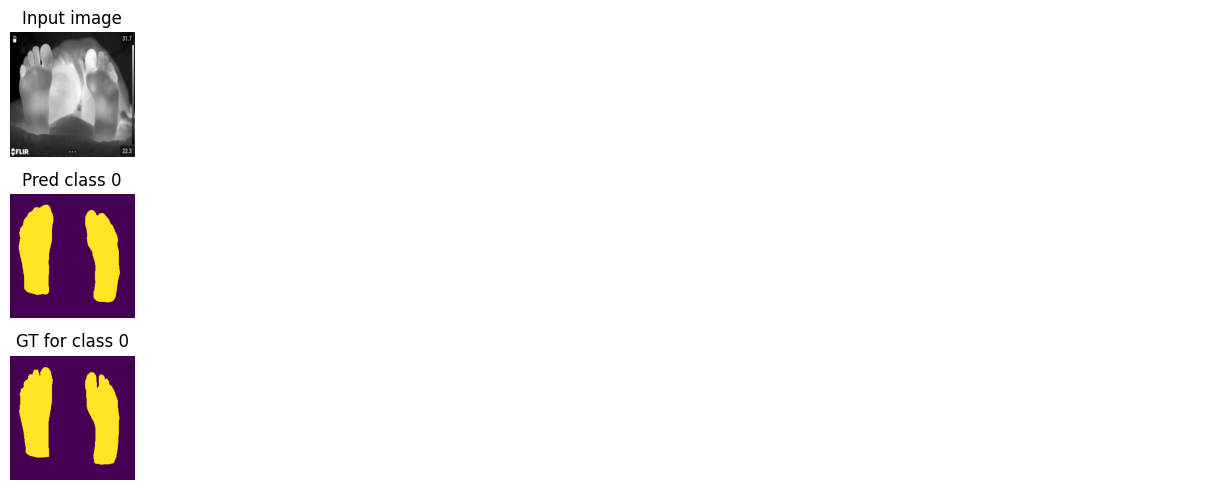

Train loss: 0.28527 | Time: 2m 2s | Val loss: 0.26431
Train_DICE_avg: 0.91989 | Train_Jaccard_avg: 0.85733 | Train_Sensitivity_avg: 0.94213 | Train_Specificity_avg: 0.96620 
Class 0 - Train_DICE: 0.91989 | Train_Jaccard: 0.85733 | Train_Sensitivity: 0.94213 | Train_Specificity: 0.96620 
Val_DICE_avg: 0.93581 | Val_Jaccard_avg: 0.88333 | Val_Sensitivity_avg: 0.96068 | Val_Specificity_avg: 0.96648 
Class 0 - Val_DICE: 0.93581 | Val_Jaccard: 0.88333 | Val_Sensitivity: 0.96068 | Val_Specificity: 0.96648 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.28278 | Time: 2m 6s | Val loss: 0.26337
Train_DICE_avg: 0.91965 | Train_Jaccard_avg: 0.85707 | Train_Sensitivity_avg: 0.95576 | Train_Specificity_avg: 0.96250 
Class 0 - Train_DICE: 0.91965 | Train_Jaccard: 0.85707 | Train_Sensitivity: 0.95576 | Train_Specificity: 0.96250 
Val_DICE_avg: 0.94569 | Val_Jaccard_avg: 0.89935 | Val_Sensitivity_avg: 0.95360 | Val_Specificity_avg: 0.97615 
Class 0 - Val_DICE: 0.94569 | Val_Jaccard: 0.89935 | Val_Sensitivity: 0.95360 | Val_Specificity: 0.97615 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.27887 | Time: 2m 10s | Val loss: 0.25694
Train_DICE_avg: 0.92461 | Train_Jaccard_avg: 0.86657 | Train_Sensitivity_avg: 0.94068 | Train_Specificity_avg: 0.97145 
Class 0 - Train_DICE: 0.92461 | Train_Jaccard: 0.86657 | Train_Sensitivity: 0.94068 | Train_Specificity: 0.97145 
Val_DICE_avg: 0.93350 | Val_Jaccard_avg: 0.87937 | Val_Sensitivity_avg: 0.97403 | Val_Specificity_avg: 0.96067 
Class 0 - Val_DICE: 0.93350 | Val_Jaccard: 0.87937 | Val_Sensitivity: 0.97403 | Val_Specificity: 0.96067 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.27228 | Time: 2m 14s | Val loss: 0.25934
Train_DICE_avg: 0.93570 | Train_Jaccard_avg: 0.88233 | Train_Sensitivity_avg: 0.95622 | Train_Specificity_avg: 0.97149 
Class 0 - Train_DICE: 0.93570 | Train_Jaccard: 0.88233 | Train_Sensitivity: 0.95622 | Train_Specificity: 0.97149 
Val_DICE_avg: 0.93706 | Val_Jaccard_avg: 0.88492 | Val_Sensitivity_avg: 0.97492 | Val_Specificity_avg: 0.96306 
Class 0 - Val_DICE: 0.93706 | Val_Jaccard: 0.88492 | Val_Sensitivity: 0.97492 | Val_Specificity: 0.96306 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.26813 | Time: 2m 18s | Val loss: 0.25589
Train_DICE_avg: 0.94048 | Train_Jaccard_avg: 0.89068 | Train_Sensitivity_avg: 0.95166 | Train_Specificity_avg: 0.97717 
Class 0 - Train_DICE: 0.94048 | Train_Jaccard: 0.89068 | Train_Sensitivity: 0.95166 | Train_Specificity: 0.97717 
Val_DICE_avg: 0.95104 | Val_Jaccard_avg: 0.90892 | Val_Sensitivity_avg: 0.96385 | Val_Specificity_avg: 0.97506 
Class 0 - Val_DICE: 0.95104 | Val_Jaccard: 0.90892 | Val_Sensitivity: 0.96385 | Val_Specificity: 0.97506 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


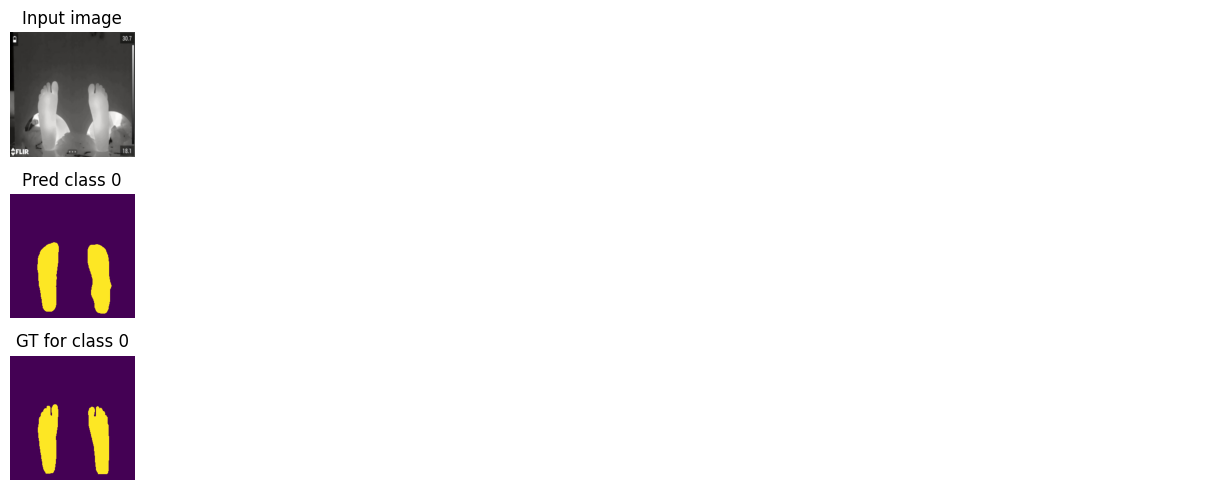

Train loss: 0.26536 | Time: 2m 22s | Val loss: 0.25503
Train_DICE_avg: 0.94392 | Train_Jaccard_avg: 0.89590 | Train_Sensitivity_avg: 0.96051 | Train_Specificity_avg: 0.97569 
Class 0 - Train_DICE: 0.94392 | Train_Jaccard: 0.89590 | Train_Sensitivity: 0.96051 | Train_Specificity: 0.97569 
Val_DICE_avg: 0.94150 | Val_Jaccard_avg: 0.89351 | Val_Sensitivity_avg: 0.97925 | Val_Specificity_avg: 0.96505 
Class 0 - Val_DICE: 0.94150 | Val_Jaccard: 0.89351 | Val_Sensitivity: 0.97925 | Val_Specificity: 0.96505 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.26168 | Time: 2m 26s | Val loss: 0.24972
Train_DICE_avg: 0.94781 | Train_Jaccard_avg: 0.90323 | Train_Sensitivity_avg: 0.96103 | Train_Specificity_avg: 0.97916 
Class 0 - Train_DICE: 0.94781 | Train_Jaccard: 0.90323 | Train_Sensitivity: 0.96103 | Train_Specificity: 0.97916 
Val_DICE_avg: 0.95234 | Val_Jaccard_avg: 0.91125 | Val_Sensitivity_avg: 0.97461 | Val_Specificity_avg: 0.97379 
Class 0 - Val_DICE: 0.95234 | Val_Jaccard: 0.91125 | Val_Sensitivity: 0.97461 | Val_Specificity: 0.97379 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.26029 | Time: 2m 29s | Val loss: 0.24731
Train_DICE_avg: 0.94910 | Train_Jaccard_avg: 0.90482 | Train_Sensitivity_avg: 0.96464 | Train_Specificity_avg: 0.97748 
Class 0 - Train_DICE: 0.94910 | Train_Jaccard: 0.90482 | Train_Sensitivity: 0.96464 | Train_Specificity: 0.97748 
Val_DICE_avg: 0.95131 | Val_Jaccard_avg: 0.90924 | Val_Sensitivity_avg: 0.98114 | Val_Specificity_avg: 0.97171 
Class 0 - Val_DICE: 0.95131 | Val_Jaccard: 0.90924 | Val_Sensitivity: 0.98114 | Val_Specificity: 0.97171 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


Train loss: 0.25754 | Time: 2m 34s | Val loss: 0.24359
Train_DICE_avg: 0.95145 | Train_Jaccard_avg: 0.90938 | Train_Sensitivity_avg: 0.95915 | Train_Specificity_avg: 0.98161 
Class 0 - Train_DICE: 0.95145 | Train_Jaccard: 0.90938 | Train_Sensitivity: 0.95915 | Train_Specificity: 0.98161 
Val_DICE_avg: 0.95829 | Val_Jaccard_avg: 0.92132 | Val_Sensitivity_avg: 0.96961 | Val_Specificity_avg: 0.97933 
Class 0 - Val_DICE: 0.95829 | Val_Jaccard: 0.92132 | Val_Sensitivity: 0.96961 | Val_Specificity: 0.97933 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.25698 | Time: 2m 37s | Val loss: 0.24511
Train_DICE_avg: 0.95133 | Train_Jaccard_avg: 0.90890 | Train_Sensitivity_avg: 0.96301 | Train_Specificity_avg: 0.97961 
Class 0 - Train_DICE: 0.95133 | Train_Jaccard: 0.90890 | Train_Sensitivity: 0.96301 | Train_Specificity: 0.97961 
Val_DICE_avg: 0.95404 | Val_Jaccard_avg: 0.91395 | Val_Sensitivity_avg: 0.97838 | Val_Specificity_avg: 0.97336 
Class 0 - Val_DICE: 0.95404 | Val_Jaccard: 0.91395 | Val_Sensitivity: 0.97838 | Val_Specificity: 0.97336 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


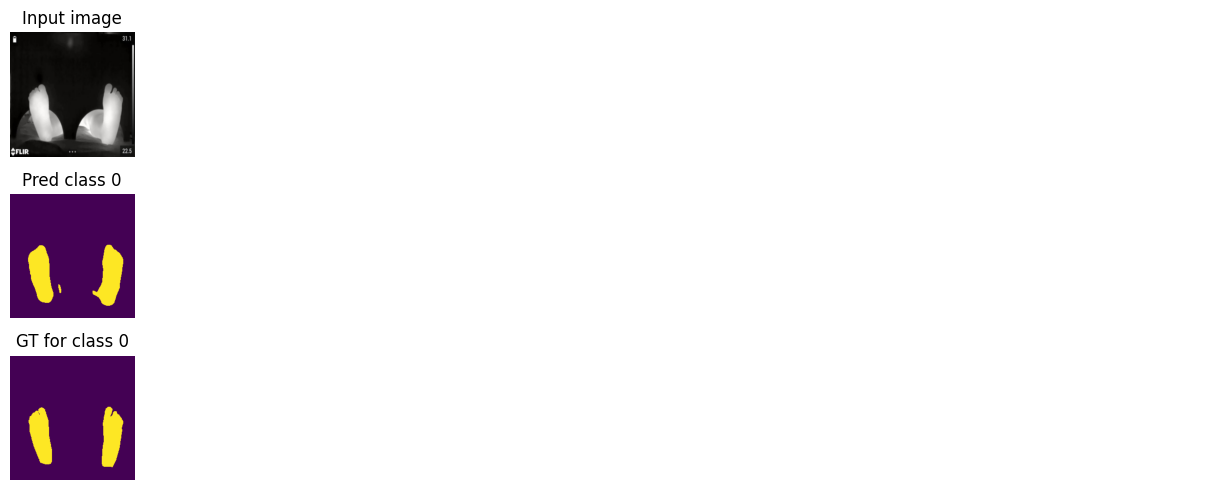

Train loss: 0.25509 | Time: 2m 41s | Val loss: 0.24204
Train_DICE_avg: 0.95279 | Train_Jaccard_avg: 0.91134 | Train_Sensitivity_avg: 0.96332 | Train_Specificity_avg: 0.98032 
Class 0 - Train_DICE: 0.95279 | Train_Jaccard: 0.91134 | Train_Sensitivity: 0.96332 | Train_Specificity: 0.98032 
Val_DICE_avg: 0.95512 | Val_Jaccard_avg: 0.91587 | Val_Sensitivity_avg: 0.97768 | Val_Specificity_avg: 0.97517 
Class 0 - Val_DICE: 0.95512 | Val_Jaccard: 0.91587 | Val_Sensitivity: 0.97768 | Val_Specificity: 0.97517 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]


Train loss: 0.25339 | Time: 2m 45s | Val loss: 0.24015
Train_DICE_avg: 0.95351 | Train_Jaccard_avg: 0.91298 | Train_Sensitivity_avg: 0.96534 | Train_Specificity_avg: 0.98088 
Class 0 - Train_DICE: 0.95351 | Train_Jaccard: 0.91298 | Train_Sensitivity: 0.96534 | Train_Specificity: 0.98088 
Val_DICE_avg: 0.95570 | Val_Jaccard_avg: 0.91724 | Val_Sensitivity_avg: 0.97838 | Val_Specificity_avg: 0.97505 
Class 0 - Val_DICE: 0.95570 | Val_Jaccard: 0.91724 | Val_Sensitivity: 0.97838 | Val_Specificity: 0.97505 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.25313 | Time: 2m 49s | Val loss: 0.24220
Train_DICE_avg: 0.95302 | Train_Jaccard_avg: 0.91196 | Train_Sensitivity_avg: 0.96235 | Train_Specificity_avg: 0.98117 
Class 0 - Train_DICE: 0.95302 | Train_Jaccard: 0.91196 | Train_Sensitivity: 0.96235 | Train_Specificity: 0.98117 
Val_DICE_avg: 0.95736 | Val_Jaccard_avg: 0.92019 | Val_Sensitivity_avg: 0.97339 | Val_Specificity_avg: 0.97747 
Class 0 - Val_DICE: 0.95736 | Val_Jaccard: 0.92019 | Val_Sensitivity: 0.97339 | Val_Specificity: 0.97747 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.24950 | Time: 2m 53s | Val loss: 0.24162
Train_DICE_avg: 0.95942 | Train_Jaccard_avg: 0.92288 | Train_Sensitivity_avg: 0.96864 | Train_Specificity_avg: 0.98343 
Class 0 - Train_DICE: 0.95942 | Train_Jaccard: 0.92288 | Train_Sensitivity: 0.96864 | Train_Specificity: 0.98343 
Val_DICE_avg: 0.95378 | Val_Jaccard_avg: 0.91414 | Val_Sensitivity_avg: 0.97538 | Val_Specificity_avg: 0.97427 
Class 0 - Val_DICE: 0.95378 | Val_Jaccard: 0.91414 | Val_Sensitivity: 0.97538 | Val_Specificity: 0.97427 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]


Train loss: 0.24975 | Time: 2m 57s | Val loss: 0.24261
Train_DICE_avg: 0.95401 | Train_Jaccard_avg: 0.91431 | Train_Sensitivity_avg: 0.96664 | Train_Specificity_avg: 0.98102 
Class 0 - Train_DICE: 0.95401 | Train_Jaccard: 0.91431 | Train_Sensitivity: 0.96664 | Train_Specificity: 0.98102 
Val_DICE_avg: 0.95463 | Val_Jaccard_avg: 0.91549 | Val_Sensitivity_avg: 0.97080 | Val_Specificity_avg: 0.97627 
Class 0 - Val_DICE: 0.95463 | Val_Jaccard: 0.91549 | Val_Sensitivity: 0.97080 | Val_Specificity: 0.97627 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


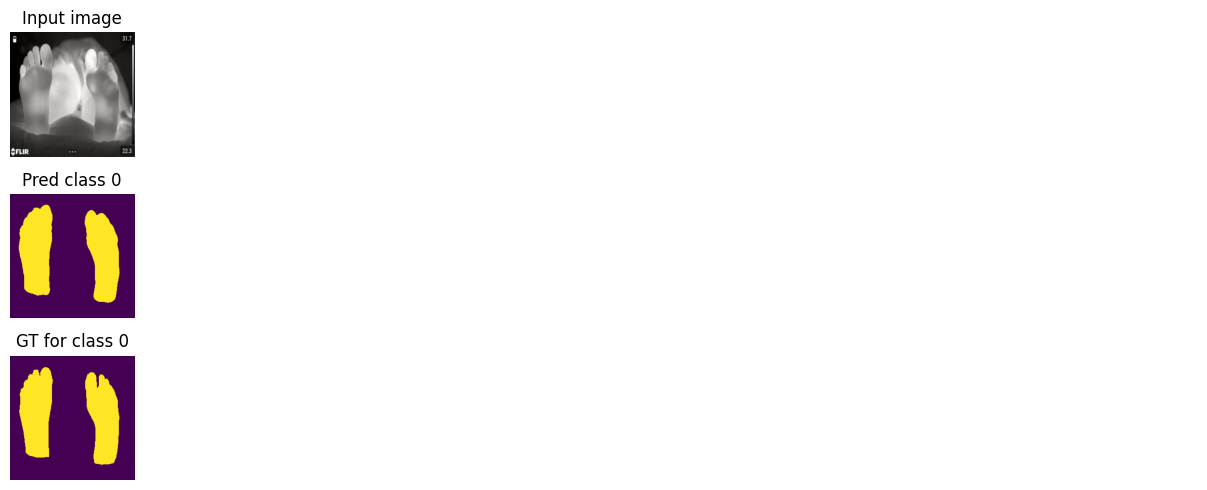

Train loss: 0.24832 | Time: 3m 1s | Val loss: 0.23907
Train_DICE_avg: 0.95603 | Train_Jaccard_avg: 0.91755 | Train_Sensitivity_avg: 0.96531 | Train_Specificity_avg: 0.98294 
Class 0 - Train_DICE: 0.95603 | Train_Jaccard: 0.91755 | Train_Sensitivity: 0.96531 | Train_Specificity: 0.98294 
Val_DICE_avg: 0.95705 | Val_Jaccard_avg: 0.91962 | Val_Sensitivity_avg: 0.97137 | Val_Specificity_avg: 0.97787 
Class 0 - Val_DICE: 0.95705 | Val_Jaccard: 0.91962 | Val_Sensitivity: 0.97137 | Val_Specificity: 0.97787 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.24819 | Time: 3m 4s | Val loss: 0.23820
Train_DICE_avg: 0.95427 | Train_Jaccard_avg: 0.91448 | Train_Sensitivity_avg: 0.96558 | Train_Specificity_avg: 0.98129 
Class 0 - Train_DICE: 0.95427 | Train_Jaccard: 0.91448 | Train_Sensitivity: 0.96558 | Train_Specificity: 0.98129 
Val_DICE_avg: 0.95588 | Val_Jaccard_avg: 0.91776 | Val_Sensitivity_avg: 0.97053 | Val_Specificity_avg: 0.97708 
Class 0 - Val_DICE: 0.95588 | Val_Jaccard: 0.91776 | Val_Sensitivity: 0.97053 | Val_Specificity: 0.97708 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.24709 | Time: 3m 8s | Val loss: 0.23695
Train_DICE_avg: 0.95583 | Train_Jaccard_avg: 0.91735 | Train_Sensitivity_avg: 0.96557 | Train_Specificity_avg: 0.98239 
Class 0 - Train_DICE: 0.95583 | Train_Jaccard: 0.91735 | Train_Sensitivity: 0.96557 | Train_Specificity: 0.98239 
Val_DICE_avg: 0.95679 | Val_Jaccard_avg: 0.91947 | Val_Sensitivity_avg: 0.97149 | Val_Specificity_avg: 0.97750 
Class 0 - Val_DICE: 0.95679 | Val_Jaccard: 0.91947 | Val_Sensitivity: 0.97149 | Val_Specificity: 0.97750 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.24589 | Time: 3m 12s | Val loss: 0.23766
Train_DICE_avg: 0.95702 | Train_Jaccard_avg: 0.91912 | Train_Sensitivity_avg: 0.96931 | Train_Specificity_avg: 0.98235 
Class 0 - Train_DICE: 0.95702 | Train_Jaccard: 0.91912 | Train_Sensitivity: 0.96931 | Train_Specificity: 0.98235 
Val_DICE_avg: 0.95486 | Val_Jaccard_avg: 0.91647 | Val_Sensitivity_avg: 0.97513 | Val_Specificity_avg: 0.97485 
Class 0 - Val_DICE: 0.95486 | Val_Jaccard: 0.91647 | Val_Sensitivity: 0.97513 | Val_Specificity: 0.97485 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.24443 | Time: 3m 16s | Val loss: 0.23562
Train_DICE_avg: 0.95859 | Train_Jaccard_avg: 0.92192 | Train_Sensitivity_avg: 0.96742 | Train_Specificity_avg: 0.98424 
Class 0 - Train_DICE: 0.95859 | Train_Jaccard: 0.92192 | Train_Sensitivity: 0.96742 | Train_Specificity: 0.98424 
Val_DICE_avg: 0.95393 | Val_Jaccard_avg: 0.91493 | Val_Sensitivity_avg: 0.97514 | Val_Specificity_avg: 0.97468 
Class 0 - Val_DICE: 0.95393 | Val_Jaccard: 0.91493 | Val_Sensitivity: 0.97514 | Val_Specificity: 0.97468 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


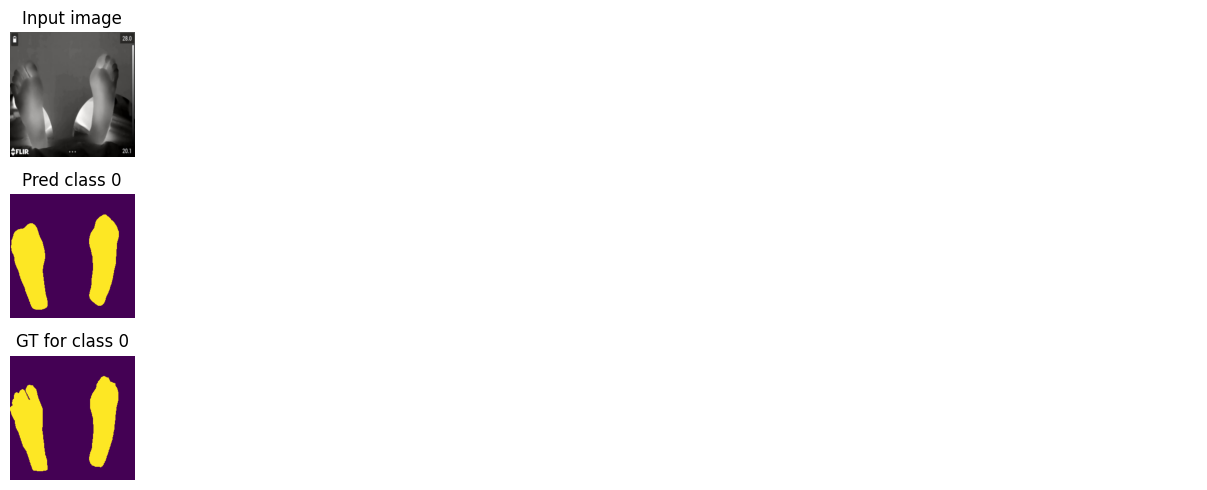

Train loss: 0.24420 | Time: 3m 20s | Val loss: 0.23609
Train_DICE_avg: 0.95749 | Train_Jaccard_avg: 0.91994 | Train_Sensitivity_avg: 0.96853 | Train_Specificity_avg: 0.98268 
Class 0 - Train_DICE: 0.95749 | Train_Jaccard: 0.91994 | Train_Sensitivity: 0.96853 | Train_Specificity: 0.98268 
Val_DICE_avg: 0.95710 | Val_Jaccard_avg: 0.92028 | Val_Sensitivity_avg: 0.97054 | Val_Specificity_avg: 0.97807 
Class 0 - Val_DICE: 0.95710 | Val_Jaccard: 0.92028 | Val_Sensitivity: 0.97054 | Val_Specificity: 0.97807 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.24317 | Time: 3m 24s | Val loss: 0.23398
Train_DICE_avg: 0.95874 | Train_Jaccard_avg: 0.92220 | Train_Sensitivity_avg: 0.96817 | Train_Specificity_avg: 0.98365 
Class 0 - Train_DICE: 0.95874 | Train_Jaccard: 0.92220 | Train_Sensitivity: 0.96817 | Train_Specificity: 0.98365 
Val_DICE_avg: 0.95507 | Val_Jaccard_avg: 0.91683 | Val_Sensitivity_avg: 0.97300 | Val_Specificity_avg: 0.97595 
Class 0 - Val_DICE: 0.95507 | Val_Jaccard: 0.91683 | Val_Sensitivity: 0.97300 | Val_Specificity: 0.97595 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.24225 | Time: 3m 28s | Val loss: 0.23205
Train_DICE_avg: 0.95994 | Train_Jaccard_avg: 0.92391 | Train_Sensitivity_avg: 0.96871 | Train_Specificity_avg: 0.98393 
Class 0 - Train_DICE: 0.95994 | Train_Jaccard: 0.92391 | Train_Sensitivity: 0.96871 | Train_Specificity: 0.98393 
Val_DICE_avg: 0.95635 | Val_Jaccard_avg: 0.91892 | Val_Sensitivity_avg: 0.97326 | Val_Specificity_avg: 0.97697 
Class 0 - Val_DICE: 0.95635 | Val_Jaccard: 0.91892 | Val_Sensitivity: 0.97326 | Val_Specificity: 0.97697 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.24235 | Time: 3m 32s | Val loss: 0.23227
Train_DICE_avg: 0.95743 | Train_Jaccard_avg: 0.91972 | Train_Sensitivity_avg: 0.96894 | Train_Specificity_avg: 0.98296 
Class 0 - Train_DICE: 0.95743 | Train_Jaccard: 0.91972 | Train_Sensitivity: 0.96894 | Train_Specificity: 0.98296 
Val_DICE_avg: 0.95881 | Val_Jaccard_avg: 0.92304 | Val_Sensitivity_avg: 0.97265 | Val_Specificity_avg: 0.97876 
Class 0 - Val_DICE: 0.95881 | Val_Jaccard: 0.92304 | Val_Sensitivity: 0.97265 | Val_Specificity: 0.97876 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.24091 | Time: 3m 35s | Val loss: 0.23159
Train_DICE_avg: 0.95833 | Train_Jaccard_avg: 0.92196 | Train_Sensitivity_avg: 0.96814 | Train_Specificity_avg: 0.98455 
Class 0 - Train_DICE: 0.95833 | Train_Jaccard: 0.92196 | Train_Sensitivity: 0.96814 | Train_Specificity: 0.98455 
Val_DICE_avg: 0.95847 | Val_Jaccard_avg: 0.92233 | Val_Sensitivity_avg: 0.97461 | Val_Specificity_avg: 0.97784 
Class 0 - Val_DICE: 0.95847 | Val_Jaccard: 0.92233 | Val_Sensitivity: 0.97461 | Val_Specificity: 0.97784 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


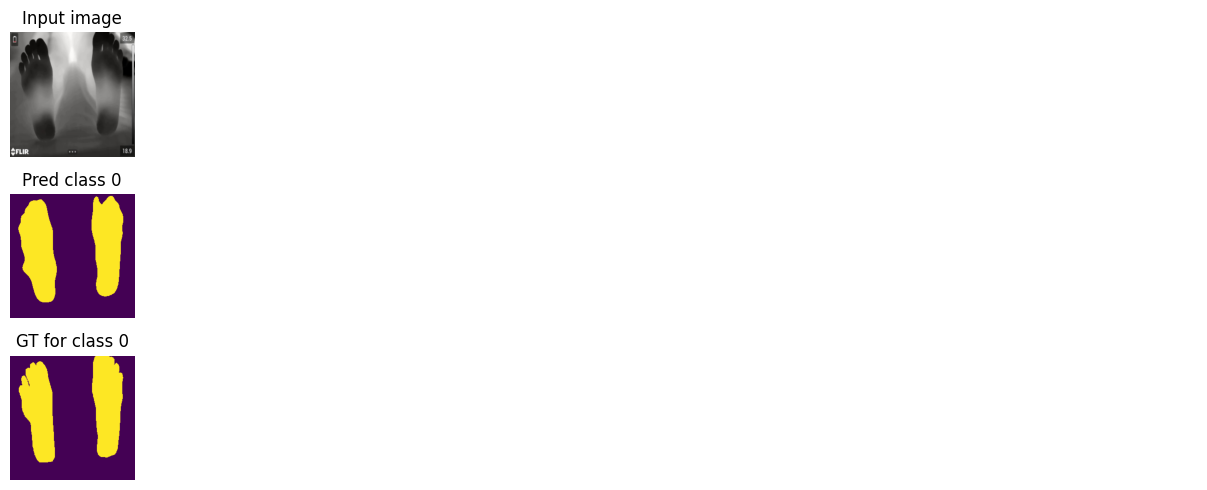

Train loss: 0.24026 | Time: 3m 40s | Val loss: 0.23113
Train_DICE_avg: 0.96082 | Train_Jaccard_avg: 0.92558 | Train_Sensitivity_avg: 0.97029 | Train_Specificity_avg: 0.98430 
Class 0 - Train_DICE: 0.96082 | Train_Jaccard: 0.92558 | Train_Sensitivity: 0.97029 | Train_Specificity: 0.98430 
Val_DICE_avg: 0.96092 | Val_Jaccard_avg: 0.92652 | Val_Sensitivity_avg: 0.97486 | Val_Specificity_avg: 0.97945 
Class 0 - Val_DICE: 0.96092 | Val_Jaccard: 0.92652 | Val_Sensitivity: 0.97486 | Val_Specificity: 0.97945 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.24042 | Time: 3m 44s | Val loss: 0.23044
Train_DICE_avg: 0.95976 | Train_Jaccard_avg: 0.92405 | Train_Sensitivity_avg: 0.96905 | Train_Specificity_avg: 0.98399 
Class 0 - Train_DICE: 0.95976 | Train_Jaccard: 0.92405 | Train_Sensitivity: 0.96905 | Train_Specificity: 0.98399 
Val_DICE_avg: 0.96156 | Val_Jaccard_avg: 0.92763 | Val_Sensitivity_avg: 0.97547 | Val_Specificity_avg: 0.98001 
Class 0 - Val_DICE: 0.96156 | Val_Jaccard: 0.92763 | Val_Sensitivity: 0.97547 | Val_Specificity: 0.98001 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.23982 | Time: 3m 48s | Val loss: 0.22904
Train_DICE_avg: 0.96015 | Train_Jaccard_avg: 0.92451 | Train_Sensitivity_avg: 0.97076 | Train_Specificity_avg: 0.98313 
Class 0 - Train_DICE: 0.96015 | Train_Jaccard: 0.92451 | Train_Sensitivity: 0.97076 | Train_Specificity: 0.98313 
Val_DICE_avg: 0.96116 | Val_Jaccard_avg: 0.92689 | Val_Sensitivity_avg: 0.97755 | Val_Specificity_avg: 0.97914 
Class 0 - Val_DICE: 0.96116 | Val_Jaccard: 0.92689 | Val_Sensitivity: 0.97755 | Val_Specificity: 0.97914 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.23900 | Time: 3m 52s | Val loss: 0.22915
Train_DICE_avg: 0.96156 | Train_Jaccard_avg: 0.92683 | Train_Sensitivity_avg: 0.96796 | Train_Specificity_avg: 0.98492 
Class 0 - Train_DICE: 0.96156 | Train_Jaccard: 0.92683 | Train_Sensitivity: 0.96796 | Train_Specificity: 0.98492 
Val_DICE_avg: 0.96176 | Val_Jaccard_avg: 0.92798 | Val_Sensitivity_avg: 0.97463 | Val_Specificity_avg: 0.98051 
Class 0 - Val_DICE: 0.96176 | Val_Jaccard: 0.92798 | Val_Sensitivity: 0.97463 | Val_Specificity: 0.98051 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


Train loss: 0.23871 | Time: 3m 56s | Val loss: 0.23047
Train_DICE_avg: 0.95996 | Train_Jaccard_avg: 0.92448 | Train_Sensitivity_avg: 0.97130 | Train_Specificity_avg: 0.98387 
Class 0 - Train_DICE: 0.95996 | Train_Jaccard: 0.92448 | Train_Sensitivity: 0.97130 | Train_Specificity: 0.98387 
Val_DICE_avg: 0.96225 | Val_Jaccard_avg: 0.92887 | Val_Sensitivity_avg: 0.97410 | Val_Specificity_avg: 0.98087 
Class 0 - Val_DICE: 0.96225 | Val_Jaccard: 0.92887 | Val_Sensitivity: 0.97410 | Val_Specificity: 0.98087 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


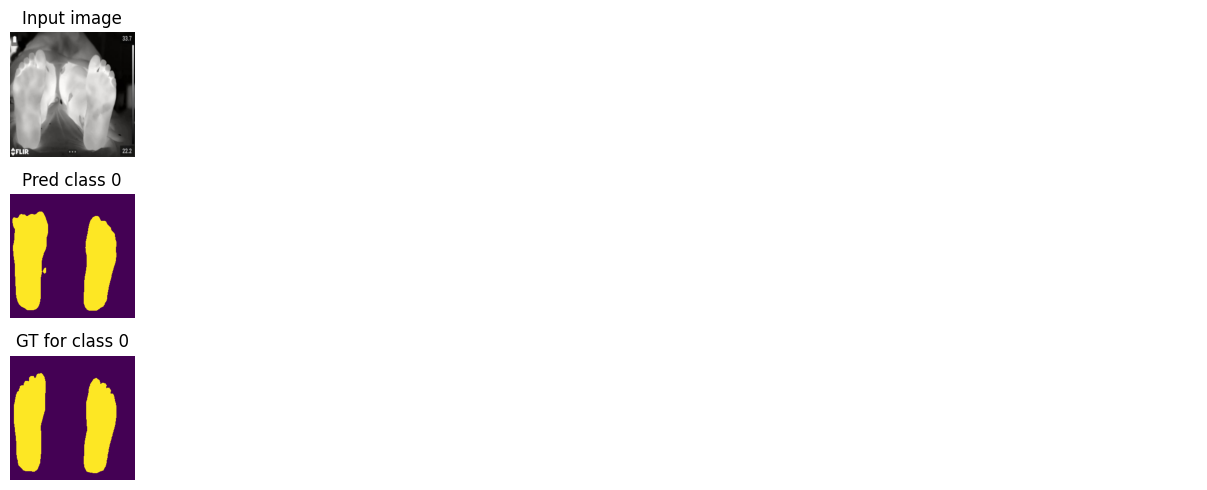

Train loss: 0.23864 | Time: 4m 0s | Val loss: 0.22859
Train_DICE_avg: 0.96097 | Train_Jaccard_avg: 0.92571 | Train_Sensitivity_avg: 0.96933 | Train_Specificity_avg: 0.98471 
Class 0 - Train_DICE: 0.96097 | Train_Jaccard: 0.92571 | Train_Sensitivity: 0.96933 | Train_Specificity: 0.98471 
Val_DICE_avg: 0.96189 | Val_Jaccard_avg: 0.92823 | Val_Sensitivity_avg: 0.97726 | Val_Specificity_avg: 0.97973 
Class 0 - Val_DICE: 0.96189 | Val_Jaccard: 0.92823 | Val_Sensitivity: 0.97726 | Val_Specificity: 0.97973 


Training DICE,▁▃▃▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇▇███████████████
Training Jaccard,▁▂▃▃▄▄▅▅▅▅▆▆▇▇▆▇▇▇▇▇▇▇▇█████████████████
Training Loss,█▇▆▅▅▄▄▄▄▃▃▃▃▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▃▄▅▆▆▆▇▇▇▇▇▇▇▇▇█▇█▇▇███████████████████
Training Specificity,▁▂▃▃▄▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇█████████████████
Validation DICE,▁▃▇▇▇▇▇▇▇▇▇███▇█████████████████████████
Validation Jaccard,▁▂▅▆▆▇▆▇▇▇▇▇▇▇▇█▇███████████████████████
Validation Loss,█▇▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,█▅▂▁▃▅▅▅▆▆▆▆▆▆▆▇▇▇▇▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Validation Specificity,▁▄▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇██▇▇██████████████████
Training DICE,0.96097



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [14]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(2).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [15]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


Global Performance Metrics:
Loss mean: 0.24630, std: 0.00000
Dice Coefficient mean: 0.92862, std: 0.08669
Jaccard Index mean: 0.87704, std: 0.12779
Sensitivity mean: 0.95731, std: 0.08722
Specificity mean: 0.97690, std: 0.01665

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92862, std: 0.08669
Jaccard mean: 0.87704, std: 0.12779
Sensitivity mean: 0.95731, std: 0.08722
Specificity mean: 0.97690, std: 0.01665


### Focal Loss

In [16]:
config["Activation function"] = None
config["Loss function"] = "Focal"
config["Alpha"] = 0.75
config["Gamma"] = 2.0
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-ResUNet-Focal"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.64 GB
GPU Memory - Reserved: 1.34 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


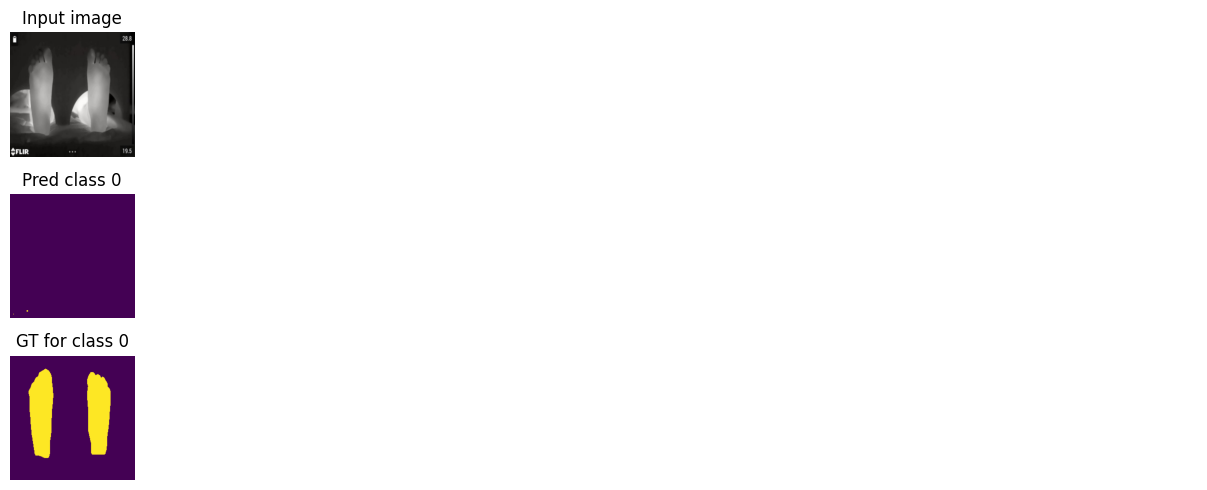

Train loss: 0.06306 | Time: 0m 4s | Val loss: 0.06564
Train_DICE_avg: 0.21659 | Train_Jaccard_avg: 0.12765 | Train_Sensitivity_avg: 0.40392 | Train_Specificity_avg: 0.77429 
Class 0 - Train_DICE: 0.21659 | Train_Jaccard: 0.12765 | Train_Sensitivity: 0.40392 | Train_Specificity: 0.77429 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.05110 | Time: 0m 8s | Val loss: 0.06397
Train_DICE_avg: 0.46137 | Train_Jaccard_avg: 0.31775 | Train_Sensitivity_avg: 0.64290 | Train_Specificity_avg: 0.82560 
Class 0 - Train_DICE: 0.46137 | Train_Jaccard: 0.31775 | Train_Sensitivity: 0.64290 | Train_Specificity: 0.82560 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.04455 | Time: 0m 12s | Val loss: 0.05309
Train_DICE_avg: 0.60243 | Train_Jaccard_avg: 0.45277 | Train_Sensitivity_avg: 0.72381 | Train_Specificity_avg: 0.86607 
Class 0 - Train_DICE: 0.60243 | Train_Jaccard: 0.45277 | Train_Sensitivity: 0.72381 | Train_Specificity: 0.86607 
Val_DICE_avg: 0.04011 | Val_Jaccard_avg: 0.02229 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74823 
Class 0 - Val_DICE: 0.04011 | Val_Jaccard: 0.02229 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74823 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


Train loss: 0.03922 | Time: 0m 16s | Val loss: 0.03840
Train_DICE_avg: 0.67117 | Train_Jaccard_avg: 0.52585 | Train_Sensitivity_avg: 0.78003 | Train_Specificity_avg: 0.88546 
Class 0 - Train_DICE: 0.67117 | Train_Jaccard: 0.52585 | Train_Sensitivity: 0.78003 | Train_Specificity: 0.88546 
Val_DICE_avg: 0.66058 | Val_Jaccard_avg: 0.51745 | Val_Sensitivity_avg: 0.93478 | Val_Specificity_avg: 0.85803 
Class 0 - Val_DICE: 0.66058 | Val_Jaccard: 0.51745 | Val_Sensitivity: 0.93478 | Val_Specificity: 0.85803 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.03580 | Time: 0m 19s | Val loss: 0.03188
Train_DICE_avg: 0.70573 | Train_Jaccard_avg: 0.56503 | Train_Sensitivity_avg: 0.80780 | Train_Specificity_avg: 0.89343 
Class 0 - Train_DICE: 0.70573 | Train_Jaccard: 0.56503 | Train_Sensitivity: 0.80780 | Train_Specificity: 0.89343 
Val_DICE_avg: 0.78376 | Val_Jaccard_avg: 0.66026 | Val_Sensitivity_avg: 0.86491 | Val_Specificity_avg: 0.91137 
Class 0 - Val_DICE: 0.78376 | Val_Jaccard: 0.66026 | Val_Sensitivity: 0.86491 | Val_Specificity: 0.91137 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


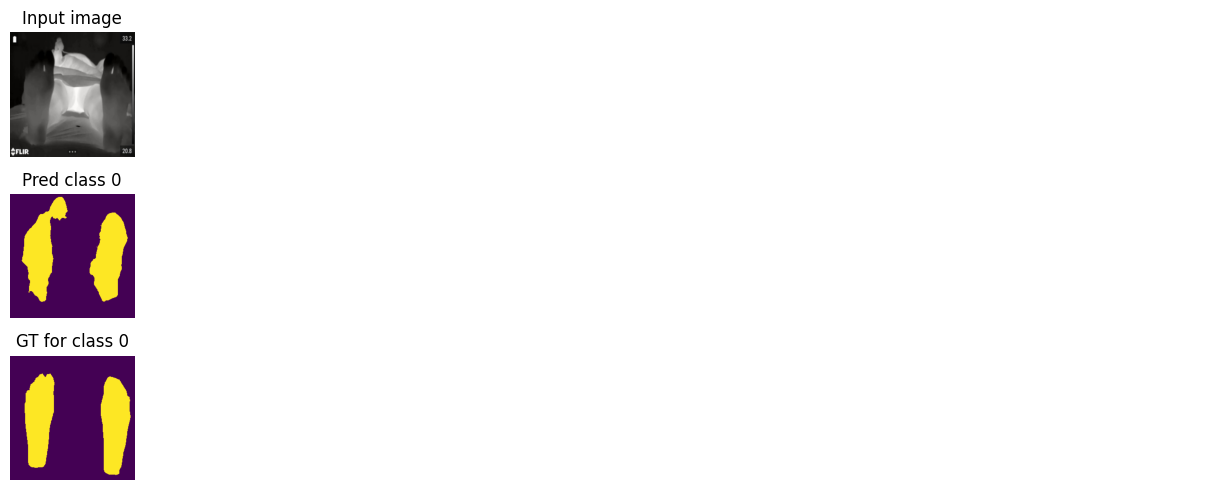

Train loss: 0.03292 | Time: 0m 24s | Val loss: 0.02807
Train_DICE_avg: 0.73925 | Train_Jaccard_avg: 0.60467 | Train_Sensitivity_avg: 0.83191 | Train_Specificity_avg: 0.90082 
Class 0 - Train_DICE: 0.73925 | Train_Jaccard: 0.60467 | Train_Sensitivity: 0.83191 | Train_Specificity: 0.90082 
Val_DICE_avg: 0.79418 | Val_Jaccard_avg: 0.67516 | Val_Sensitivity_avg: 0.87021 | Val_Specificity_avg: 0.91453 
Class 0 - Val_DICE: 0.79418 | Val_Jaccard: 0.67516 | Val_Sensitivity: 0.87021 | Val_Specificity: 0.91453 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]


Train loss: 0.03007 | Time: 0m 28s | Val loss: 0.02607
Train_DICE_avg: 0.76899 | Train_Jaccard_avg: 0.64089 | Train_Sensitivity_avg: 0.85238 | Train_Specificity_avg: 0.91268 
Class 0 - Train_DICE: 0.76899 | Train_Jaccard: 0.64089 | Train_Sensitivity: 0.85238 | Train_Specificity: 0.91268 
Val_DICE_avg: 0.79415 | Val_Jaccard_avg: 0.67557 | Val_Sensitivity_avg: 0.91348 | Val_Specificity_avg: 0.90721 
Class 0 - Val_DICE: 0.79415 | Val_Jaccard: 0.67557 | Val_Sensitivity: 0.91348 | Val_Specificity: 0.90721 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.02744 | Time: 0m 31s | Val loss: 0.02459
Train_DICE_avg: 0.80500 | Train_Jaccard_avg: 0.68610 | Train_Sensitivity_avg: 0.86686 | Train_Specificity_avg: 0.92516 
Class 0 - Train_DICE: 0.80500 | Train_Jaccard: 0.68610 | Train_Sensitivity: 0.86686 | Train_Specificity: 0.92516 
Val_DICE_avg: 0.84690 | Val_Jaccard_avg: 0.74410 | Val_Sensitivity_avg: 0.84997 | Val_Specificity_avg: 0.94480 
Class 0 - Val_DICE: 0.84690 | Val_Jaccard: 0.74410 | Val_Sensitivity: 0.84997 | Val_Specificity: 0.94480 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.02663 | Time: 0m 35s | Val loss: 0.02273
Train_DICE_avg: 0.81259 | Train_Jaccard_avg: 0.69733 | Train_Sensitivity_avg: 0.86133 | Train_Specificity_avg: 0.92851 
Class 0 - Train_DICE: 0.81259 | Train_Jaccard: 0.69733 | Train_Sensitivity: 0.86133 | Train_Specificity: 0.92851 
Val_DICE_avg: 0.85854 | Val_Jaccard_avg: 0.76138 | Val_Sensitivity_avg: 0.87819 | Val_Specificity_avg: 0.94402 
Class 0 - Val_DICE: 0.85854 | Val_Jaccard: 0.76138 | Val_Sensitivity: 0.87819 | Val_Specificity: 0.94402 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


Train loss: 0.02466 | Time: 0m 39s | Val loss: 0.02134
Train_DICE_avg: 0.83094 | Train_Jaccard_avg: 0.72441 | Train_Sensitivity_avg: 0.88104 | Train_Specificity_avg: 0.93420 
Class 0 - Train_DICE: 0.83094 | Train_Jaccard: 0.72441 | Train_Sensitivity: 0.88104 | Train_Specificity: 0.93420 
Val_DICE_avg: 0.85485 | Val_Jaccard_avg: 0.75865 | Val_Sensitivity_avg: 0.93145 | Val_Specificity_avg: 0.92876 
Class 0 - Val_DICE: 0.85485 | Val_Jaccard: 0.75865 | Val_Sensitivity: 0.93145 | Val_Specificity: 0.92876 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


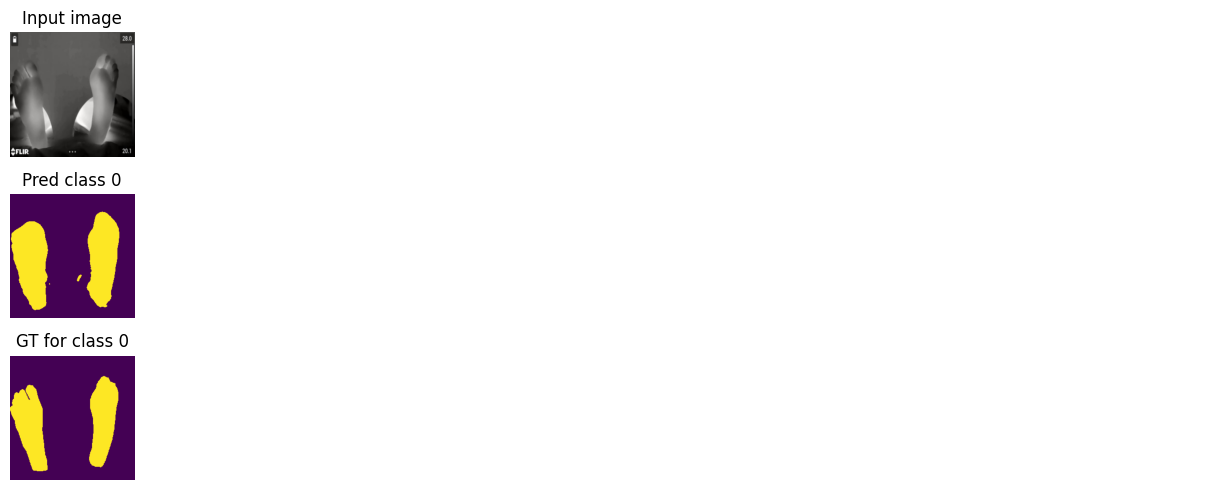

Train loss: 0.02577 | Time: 0m 43s | Val loss: 0.02056
Train_DICE_avg: 0.80833 | Train_Jaccard_avg: 0.69682 | Train_Sensitivity_avg: 0.89138 | Train_Specificity_avg: 0.92409 
Class 0 - Train_DICE: 0.80833 | Train_Jaccard: 0.69682 | Train_Sensitivity: 0.89138 | Train_Specificity: 0.92409 
Val_DICE_avg: 0.84838 | Val_Jaccard_avg: 0.75221 | Val_Sensitivity_avg: 0.92950 | Val_Specificity_avg: 0.93156 
Class 0 - Val_DICE: 0.84838 | Val_Jaccard: 0.75221 | Val_Sensitivity: 0.92950 | Val_Specificity: 0.93156 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.02408 | Time: 0m 47s | Val loss: 0.01928
Train_DICE_avg: 0.83794 | Train_Jaccard_avg: 0.73398 | Train_Sensitivity_avg: 0.87913 | Train_Specificity_avg: 0.93858 
Class 0 - Train_DICE: 0.83794 | Train_Jaccard: 0.73398 | Train_Sensitivity: 0.87913 | Train_Specificity: 0.93858 
Val_DICE_avg: 0.86347 | Val_Jaccard_avg: 0.77392 | Val_Sensitivity_avg: 0.93751 | Val_Specificity_avg: 0.93341 
Class 0 - Val_DICE: 0.86347 | Val_Jaccard: 0.77392 | Val_Sensitivity: 0.93751 | Val_Specificity: 0.93341 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


Train loss: 0.02217 | Time: 0m 51s | Val loss: 0.01816
Train_DICE_avg: 0.85436 | Train_Jaccard_avg: 0.75770 | Train_Sensitivity_avg: 0.89662 | Train_Specificity_avg: 0.94301 
Class 0 - Train_DICE: 0.85436 | Train_Jaccard: 0.75770 | Train_Sensitivity: 0.89662 | Train_Specificity: 0.94301 
Val_DICE_avg: 0.87082 | Val_Jaccard_avg: 0.78579 | Val_Sensitivity_avg: 0.94198 | Val_Specificity_avg: 0.93831 
Class 0 - Val_DICE: 0.87082 | Val_Jaccard: 0.78579 | Val_Sensitivity: 0.94198 | Val_Specificity: 0.93831 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.02083 | Time: 0m 55s | Val loss: 0.01984
Train_DICE_avg: 0.86856 | Train_Jaccard_avg: 0.77958 | Train_Sensitivity_avg: 0.90912 | Train_Specificity_avg: 0.94716 
Class 0 - Train_DICE: 0.86856 | Train_Jaccard: 0.77958 | Train_Sensitivity: 0.90912 | Train_Specificity: 0.94716 
Val_DICE_avg: 0.84814 | Val_Jaccard_avg: 0.75593 | Val_Sensitivity_avg: 0.96135 | Val_Specificity_avg: 0.92195 
Class 0 - Val_DICE: 0.84814 | Val_Jaccard: 0.75593 | Val_Sensitivity: 0.96135 | Val_Specificity: 0.92195 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.01992 | Time: 0m 59s | Val loss: 0.01624
Train_DICE_avg: 0.87774 | Train_Jaccard_avg: 0.79258 | Train_Sensitivity_avg: 0.91316 | Train_Specificity_avg: 0.95009 
Class 0 - Train_DICE: 0.87774 | Train_Jaccard: 0.79258 | Train_Sensitivity: 0.91316 | Train_Specificity: 0.95009 
Val_DICE_avg: 0.90364 | Val_Jaccard_avg: 0.83178 | Val_Sensitivity_avg: 0.94799 | Val_Specificity_avg: 0.95030 
Class 0 - Val_DICE: 0.90364 | Val_Jaccard: 0.83178 | Val_Sensitivity: 0.94799 | Val_Specificity: 0.95030 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


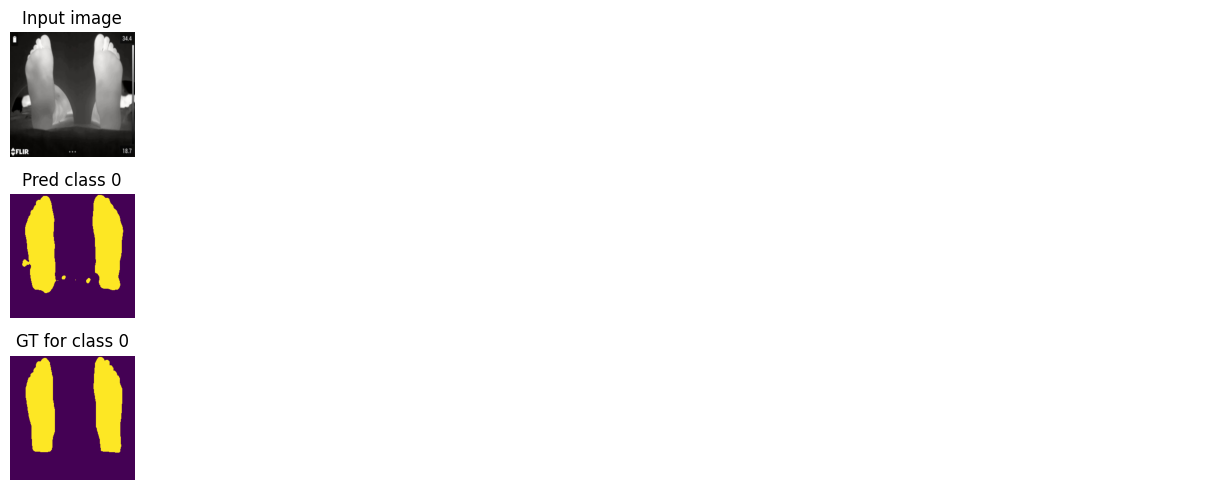

Train loss: 0.01909 | Time: 1m 3s | Val loss: 0.01590
Train_DICE_avg: 0.88520 | Train_Jaccard_avg: 0.80328 | Train_Sensitivity_avg: 0.91752 | Train_Specificity_avg: 0.95311 
Class 0 - Train_DICE: 0.88520 | Train_Jaccard: 0.80328 | Train_Sensitivity: 0.91752 | Train_Specificity: 0.95311 
Val_DICE_avg: 0.91391 | Val_Jaccard_avg: 0.84603 | Val_Sensitivity_avg: 0.93518 | Val_Specificity_avg: 0.95876 
Class 0 - Val_DICE: 0.91391 | Val_Jaccard: 0.84603 | Val_Sensitivity: 0.93518 | Val_Specificity: 0.95876 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.01843 | Time: 1m 7s | Val loss: 0.01556
Train_DICE_avg: 0.89202 | Train_Jaccard_avg: 0.81289 | Train_Sensitivity_avg: 0.91652 | Train_Specificity_avg: 0.95645 
Class 0 - Train_DICE: 0.89202 | Train_Jaccard: 0.81289 | Train_Sensitivity: 0.91652 | Train_Specificity: 0.95645 
Val_DICE_avg: 0.91735 | Val_Jaccard_avg: 0.85239 | Val_Sensitivity_avg: 0.94294 | Val_Specificity_avg: 0.95853 
Class 0 - Val_DICE: 0.91735 | Val_Jaccard: 0.85239 | Val_Sensitivity: 0.94294 | Val_Specificity: 0.95853 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.01716 | Time: 1m 11s | Val loss: 0.01471
Train_DICE_avg: 0.90737 | Train_Jaccard_avg: 0.83595 | Train_Sensitivity_avg: 0.93089 | Train_Specificity_avg: 0.96139 
Class 0 - Train_DICE: 0.90737 | Train_Jaccard: 0.83595 | Train_Sensitivity: 0.93089 | Train_Specificity: 0.96139 
Val_DICE_avg: 0.92377 | Val_Jaccard_avg: 0.86194 | Val_Sensitivity_avg: 0.95039 | Val_Specificity_avg: 0.96102 
Class 0 - Val_DICE: 0.92377 | Val_Jaccard: 0.86194 | Val_Sensitivity: 0.95039 | Val_Specificity: 0.96102 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]


Train loss: 0.01651 | Time: 1m 15s | Val loss: 0.01410
Train_DICE_avg: 0.91012 | Train_Jaccard_avg: 0.84037 | Train_Sensitivity_avg: 0.93307 | Train_Specificity_avg: 0.96267 
Class 0 - Train_DICE: 0.91012 | Train_Jaccard: 0.84037 | Train_Sensitivity: 0.93307 | Train_Specificity: 0.96267 
Val_DICE_avg: 0.92802 | Val_Jaccard_avg: 0.86926 | Val_Sensitivity_avg: 0.95529 | Val_Specificity_avg: 0.96188 
Class 0 - Val_DICE: 0.92802 | Val_Jaccard: 0.86926 | Val_Sensitivity: 0.95529 | Val_Specificity: 0.96188 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.01589 | Time: 1m 19s | Val loss: 0.01407
Train_DICE_avg: 0.91403 | Train_Jaccard_avg: 0.84860 | Train_Sensitivity_avg: 0.93491 | Train_Specificity_avg: 0.96599 
Class 0 - Train_DICE: 0.91403 | Train_Jaccard: 0.84860 | Train_Sensitivity: 0.93491 | Train_Specificity: 0.96599 
Val_DICE_avg: 0.92388 | Val_Jaccard_avg: 0.86296 | Val_Sensitivity_avg: 0.96772 | Val_Specificity_avg: 0.95599 
Class 0 - Val_DICE: 0.92388 | Val_Jaccard: 0.86296 | Val_Sensitivity: 0.96772 | Val_Specificity: 0.95599 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


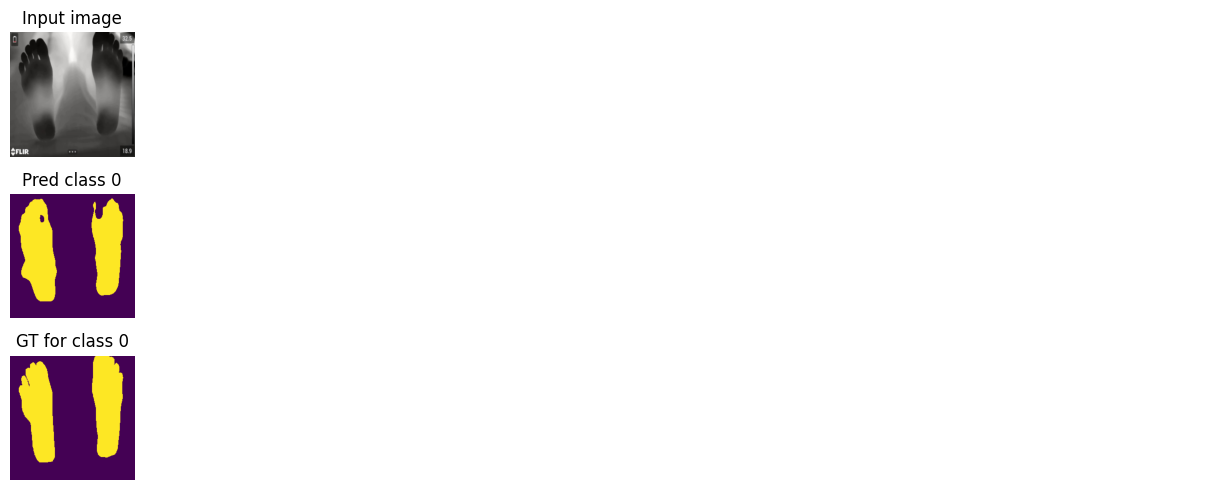

Train loss: 0.01796 | Time: 1m 23s | Val loss: 0.01923
Train_DICE_avg: 0.89260 | Train_Jaccard_avg: 0.81671 | Train_Sensitivity_avg: 0.92881 | Train_Specificity_avg: 0.95430 
Class 0 - Train_DICE: 0.89260 | Train_Jaccard: 0.81671 | Train_Sensitivity: 0.92881 | Train_Specificity: 0.95430 
Val_DICE_avg: 0.83348 | Val_Jaccard_avg: 0.73662 | Val_Sensitivity_avg: 0.98237 | Val_Specificity_avg: 0.91279 
Class 0 - Val_DICE: 0.83348 | Val_Jaccard: 0.73662 | Val_Sensitivity: 0.98237 | Val_Specificity: 0.91279 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]


Train loss: 0.01645 | Time: 1m 27s | Val loss: 0.01334
Train_DICE_avg: 0.90919 | Train_Jaccard_avg: 0.84001 | Train_Sensitivity_avg: 0.92998 | Train_Specificity_avg: 0.96255 
Class 0 - Train_DICE: 0.90919 | Train_Jaccard: 0.84001 | Train_Sensitivity: 0.92998 | Train_Specificity: 0.96255 
Val_DICE_avg: 0.93047 | Val_Jaccard_avg: 0.87441 | Val_Sensitivity_avg: 0.95521 | Val_Specificity_avg: 0.96403 
Class 0 - Val_DICE: 0.93047 | Val_Jaccard: 0.87441 | Val_Sensitivity: 0.95521 | Val_Specificity: 0.96403 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.01585 | Time: 1m 31s | Val loss: 0.01331
Train_DICE_avg: 0.91370 | Train_Jaccard_avg: 0.84782 | Train_Sensitivity_avg: 0.94080 | Train_Specificity_avg: 0.96415 
Class 0 - Train_DICE: 0.91370 | Train_Jaccard: 0.84782 | Train_Sensitivity: 0.94080 | Train_Specificity: 0.96415 
Val_DICE_avg: 0.93119 | Val_Jaccard_avg: 0.87755 | Val_Sensitivity_avg: 0.94941 | Val_Specificity_avg: 0.96721 
Class 0 - Val_DICE: 0.93119 | Val_Jaccard: 0.87755 | Val_Sensitivity: 0.94941 | Val_Specificity: 0.96721 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.01497 | Time: 1m 35s | Val loss: 0.01277
Train_DICE_avg: 0.92526 | Train_Jaccard_avg: 0.86607 | Train_Sensitivity_avg: 0.94086 | Train_Specificity_avg: 0.96919 
Class 0 - Train_DICE: 0.92526 | Train_Jaccard: 0.86607 | Train_Sensitivity: 0.94086 | Train_Specificity: 0.96919 
Val_DICE_avg: 0.93538 | Val_Jaccard_avg: 0.88169 | Val_Sensitivity_avg: 0.96305 | Val_Specificity_avg: 0.96455 
Class 0 - Val_DICE: 0.93538 | Val_Jaccard: 0.88169 | Val_Sensitivity: 0.96305 | Val_Specificity: 0.96455 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


Train loss: 0.01444 | Time: 1m 39s | Val loss: 0.01316
Train_DICE_avg: 0.92537 | Train_Jaccard_avg: 0.86671 | Train_Sensitivity_avg: 0.94159 | Train_Specificity_avg: 0.97056 
Class 0 - Train_DICE: 0.92537 | Train_Jaccard: 0.86671 | Train_Sensitivity: 0.94159 | Train_Specificity: 0.97056 
Val_DICE_avg: 0.93013 | Val_Jaccard_avg: 0.87483 | Val_Sensitivity_avg: 0.96273 | Val_Specificity_avg: 0.96169 
Class 0 - Val_DICE: 0.93013 | Val_Jaccard: 0.87483 | Val_Sensitivity: 0.96273 | Val_Specificity: 0.96169 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


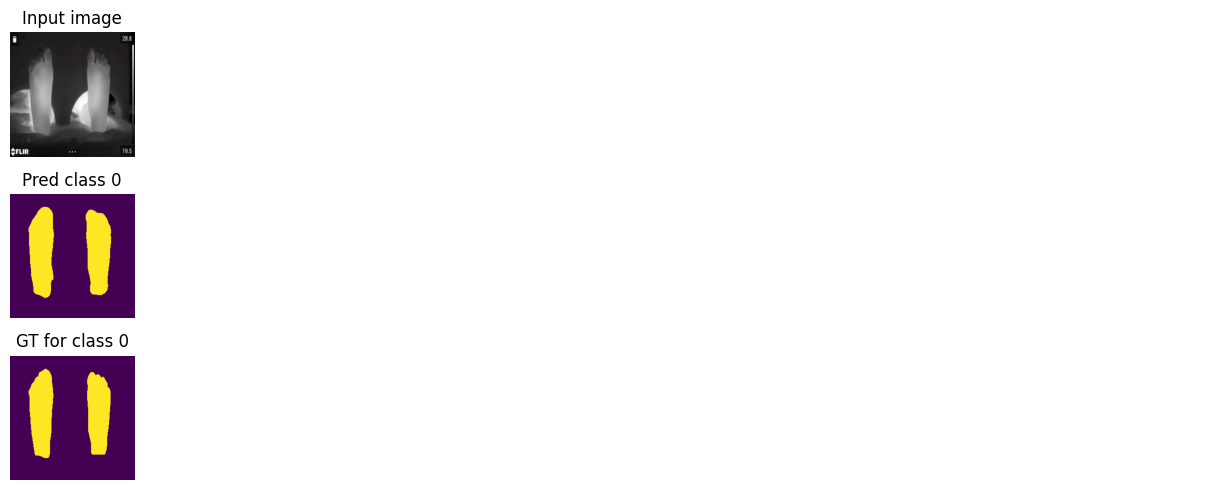

Train loss: 0.01394 | Time: 1m 43s | Val loss: 0.01292
Train_DICE_avg: 0.93083 | Train_Jaccard_avg: 0.87414 | Train_Sensitivity_avg: 0.94606 | Train_Specificity_avg: 0.97117 
Class 0 - Train_DICE: 0.93083 | Train_Jaccard: 0.87414 | Train_Sensitivity: 0.94606 | Train_Specificity: 0.97117 
Val_DICE_avg: 0.93249 | Val_Jaccard_avg: 0.88031 | Val_Sensitivity_avg: 0.95738 | Val_Specificity_avg: 0.96617 
Class 0 - Val_DICE: 0.93249 | Val_Jaccard: 0.88031 | Val_Sensitivity: 0.95738 | Val_Specificity: 0.96617 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.01324 | Time: 1m 47s | Val loss: 0.01251
Train_DICE_avg: 0.93640 | Train_Jaccard_avg: 0.88406 | Train_Sensitivity_avg: 0.94995 | Train_Specificity_avg: 0.97443 
Class 0 - Train_DICE: 0.93640 | Train_Jaccard: 0.88406 | Train_Sensitivity: 0.94995 | Train_Specificity: 0.97443 
Val_DICE_avg: 0.93209 | Val_Jaccard_avg: 0.87835 | Val_Sensitivity_avg: 0.97053 | Val_Specificity_avg: 0.96400 
Class 0 - Val_DICE: 0.93209 | Val_Jaccard: 0.87835 | Val_Sensitivity: 0.97053 | Val_Specificity: 0.96400 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


Train loss: 0.01326 | Time: 1m 51s | Val loss: 0.01250
Train_DICE_avg: 0.93475 | Train_Jaccard_avg: 0.88177 | Train_Sensitivity_avg: 0.94813 | Train_Specificity_avg: 0.97469 
Class 0 - Train_DICE: 0.93475 | Train_Jaccard: 0.88177 | Train_Sensitivity: 0.94813 | Train_Specificity: 0.97469 
Val_DICE_avg: 0.93181 | Val_Jaccard_avg: 0.87763 | Val_Sensitivity_avg: 0.97532 | Val_Specificity_avg: 0.96106 
Class 0 - Val_DICE: 0.93181 | Val_Jaccard: 0.87763 | Val_Sensitivity: 0.97532 | Val_Specificity: 0.96106 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.01324 | Time: 1m 55s | Val loss: 0.01213
Train_DICE_avg: 0.93276 | Train_Jaccard_avg: 0.87908 | Train_Sensitivity_avg: 0.94661 | Train_Specificity_avg: 0.97454 
Class 0 - Train_DICE: 0.93276 | Train_Jaccard: 0.87908 | Train_Sensitivity: 0.94661 | Train_Specificity: 0.97454 
Val_DICE_avg: 0.94155 | Val_Jaccard_avg: 0.89237 | Val_Sensitivity_avg: 0.97194 | Val_Specificity_avg: 0.96679 
Class 0 - Val_DICE: 0.94155 | Val_Jaccard: 0.89237 | Val_Sensitivity: 0.97194 | Val_Specificity: 0.96679 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.01256 | Time: 1m 59s | Val loss: 0.01184
Train_DICE_avg: 0.94079 | Train_Jaccard_avg: 0.89069 | Train_Sensitivity_avg: 0.95398 | Train_Specificity_avg: 0.97591 
Class 0 - Train_DICE: 0.94079 | Train_Jaccard: 0.89069 | Train_Sensitivity: 0.95398 | Train_Specificity: 0.97591 
Val_DICE_avg: 0.94439 | Val_Jaccard_avg: 0.89718 | Val_Sensitivity_avg: 0.96482 | Val_Specificity_avg: 0.96994 
Class 0 - Val_DICE: 0.94439 | Val_Jaccard: 0.89718 | Val_Sensitivity: 0.96482 | Val_Specificity: 0.96994 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


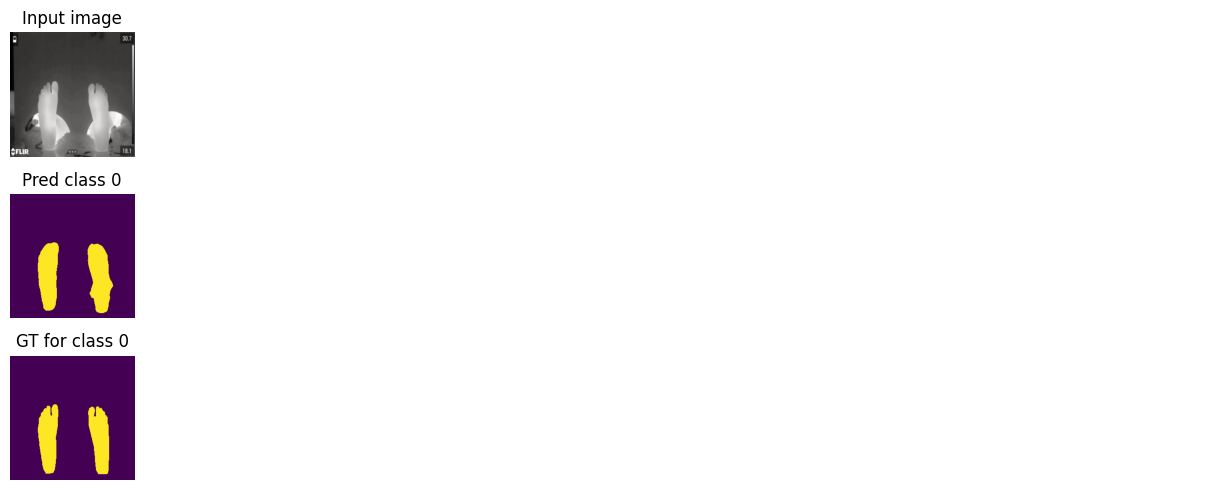

Train loss: 0.01333 | Time: 2m 3s | Val loss: 0.01151
Train_DICE_avg: 0.93246 | Train_Jaccard_avg: 0.87820 | Train_Sensitivity_avg: 0.94637 | Train_Specificity_avg: 0.97236 
Class 0 - Train_DICE: 0.93246 | Train_Jaccard: 0.87820 | Train_Sensitivity: 0.94637 | Train_Specificity: 0.97236 
Val_DICE_avg: 0.93412 | Val_Jaccard_avg: 0.88130 | Val_Sensitivity_avg: 0.97051 | Val_Specificity_avg: 0.96530 
Class 0 - Val_DICE: 0.93412 | Val_Jaccard: 0.88130 | Val_Sensitivity: 0.97051 | Val_Specificity: 0.96530 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.01287 | Time: 2m 7s | Val loss: 0.01150
Train_DICE_avg: 0.93525 | Train_Jaccard_avg: 0.88239 | Train_Sensitivity_avg: 0.94894 | Train_Specificity_avg: 0.97394 
Class 0 - Train_DICE: 0.93525 | Train_Jaccard: 0.88239 | Train_Sensitivity: 0.94894 | Train_Specificity: 0.97394 
Val_DICE_avg: 0.94778 | Val_Jaccard_avg: 0.90373 | Val_Sensitivity_avg: 0.94852 | Val_Specificity_avg: 0.98028 
Class 0 - Val_DICE: 0.94778 | Val_Jaccard: 0.90373 | Val_Sensitivity: 0.94852 | Val_Specificity: 0.98028 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.01209 | Time: 2m 11s | Val loss: 0.01129
Train_DICE_avg: 0.94154 | Train_Jaccard_avg: 0.89334 | Train_Sensitivity_avg: 0.95279 | Train_Specificity_avg: 0.97755 
Class 0 - Train_DICE: 0.94154 | Train_Jaccard: 0.89334 | Train_Sensitivity: 0.95279 | Train_Specificity: 0.97755 
Val_DICE_avg: 0.95109 | Val_Jaccard_avg: 0.90911 | Val_Sensitivity_avg: 0.95229 | Val_Specificity_avg: 0.98029 
Class 0 - Val_DICE: 0.95109 | Val_Jaccard: 0.90911 | Val_Sensitivity: 0.95229 | Val_Specificity: 0.98029 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


Train loss: 0.01150 | Time: 2m 15s | Val loss: 0.01108
Train_DICE_avg: 0.94723 | Train_Jaccard_avg: 0.90225 | Train_Sensitivity_avg: 0.96029 | Train_Specificity_avg: 0.97942 
Class 0 - Train_DICE: 0.94723 | Train_Jaccard: 0.90225 | Train_Sensitivity: 0.96029 | Train_Specificity: 0.97942 
Val_DICE_avg: 0.94799 | Val_Jaccard_avg: 0.90394 | Val_Sensitivity_avg: 0.96491 | Val_Specificity_avg: 0.97396 
Class 0 - Val_DICE: 0.94799 | Val_Jaccard: 0.90394 | Val_Sensitivity: 0.96491 | Val_Specificity: 0.97396 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]


Train loss: 0.01125 | Time: 2m 18s | Val loss: 0.01077
Train_DICE_avg: 0.94867 | Train_Jaccard_avg: 0.90526 | Train_Sensitivity_avg: 0.95842 | Train_Specificity_avg: 0.97983 
Class 0 - Train_DICE: 0.94867 | Train_Jaccard: 0.90526 | Train_Sensitivity: 0.95842 | Train_Specificity: 0.97983 
Val_DICE_avg: 0.94681 | Val_Jaccard_avg: 0.90253 | Val_Sensitivity_avg: 0.97599 | Val_Specificity_avg: 0.96887 
Class 0 - Val_DICE: 0.94681 | Val_Jaccard: 0.90253 | Val_Sensitivity: 0.97599 | Val_Specificity: 0.96887 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


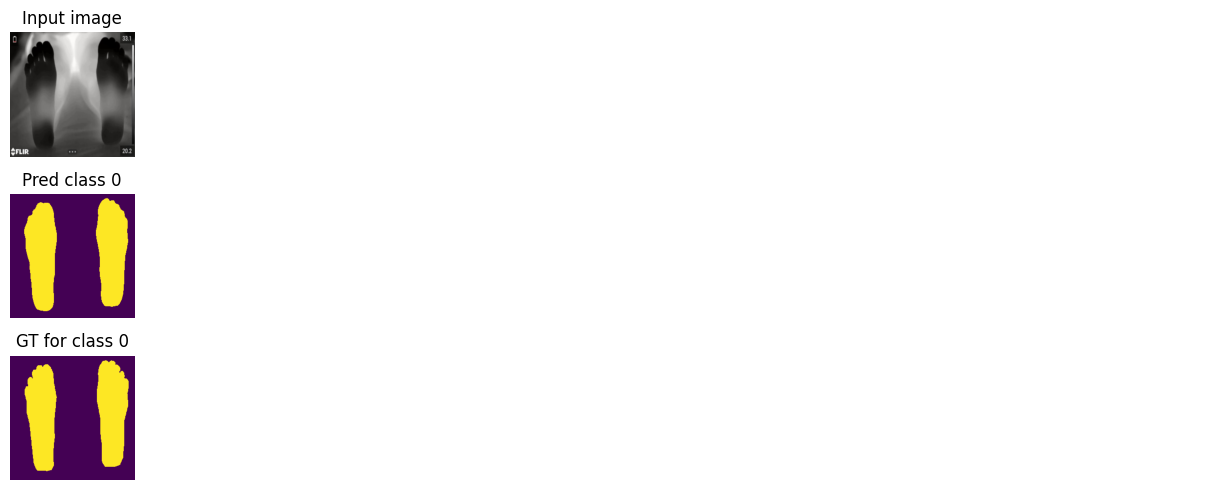

Train loss: 0.01078 | Time: 2m 23s | Val loss: 0.01033
Train_DICE_avg: 0.95364 | Train_Jaccard_avg: 0.91357 | Train_Sensitivity_avg: 0.96268 | Train_Specificity_avg: 0.98222 
Class 0 - Train_DICE: 0.95364 | Train_Jaccard: 0.91357 | Train_Sensitivity: 0.96268 | Train_Specificity: 0.98222 
Val_DICE_avg: 0.95208 | Val_Jaccard_avg: 0.91081 | Val_Sensitivity_avg: 0.97228 | Val_Specificity_avg: 0.97321 
Class 0 - Val_DICE: 0.95208 | Val_Jaccard: 0.91081 | Val_Sensitivity: 0.97228 | Val_Specificity: 0.97321 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.01046 | Time: 2m 27s | Val loss: 0.01002
Train_DICE_avg: 0.95347 | Train_Jaccard_avg: 0.91407 | Train_Sensitivity_avg: 0.96221 | Train_Specificity_avg: 0.98266 
Class 0 - Train_DICE: 0.95347 | Train_Jaccard: 0.91407 | Train_Sensitivity: 0.96221 | Train_Specificity: 0.98266 
Val_DICE_avg: 0.95572 | Val_Jaccard_avg: 0.91693 | Val_Sensitivity_avg: 0.97258 | Val_Specificity_avg: 0.97571 
Class 0 - Val_DICE: 0.95572 | Val_Jaccard: 0.91693 | Val_Sensitivity: 0.97258 | Val_Specificity: 0.97571 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.01061 | Time: 2m 31s | Val loss: 0.00980
Train_DICE_avg: 0.95033 | Train_Jaccard_avg: 0.90847 | Train_Sensitivity_avg: 0.95978 | Train_Specificity_avg: 0.98188 
Class 0 - Train_DICE: 0.95033 | Train_Jaccard: 0.90847 | Train_Sensitivity: 0.95978 | Train_Specificity: 0.98188 
Val_DICE_avg: 0.95710 | Val_Jaccard_avg: 0.91922 | Val_Sensitivity_avg: 0.97027 | Val_Specificity_avg: 0.97823 
Class 0 - Val_DICE: 0.95710 | Val_Jaccard: 0.91922 | Val_Sensitivity: 0.97027 | Val_Specificity: 0.97823 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.01055 | Time: 2m 35s | Val loss: 0.00946
Train_DICE_avg: 0.95216 | Train_Jaccard_avg: 0.91131 | Train_Sensitivity_avg: 0.95940 | Train_Specificity_avg: 0.98244 
Class 0 - Train_DICE: 0.95216 | Train_Jaccard: 0.91131 | Train_Sensitivity: 0.95940 | Train_Specificity: 0.98244 
Val_DICE_avg: 0.96079 | Val_Jaccard_avg: 0.92573 | Val_Sensitivity_avg: 0.97203 | Val_Specificity_avg: 0.98028 
Class 0 - Val_DICE: 0.96079 | Val_Jaccard: 0.92573 | Val_Sensitivity: 0.97203 | Val_Specificity: 0.98028 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.01016 | Time: 2m 39s | Val loss: 0.00953
Train_DICE_avg: 0.95554 | Train_Jaccard_avg: 0.91646 | Train_Sensitivity_avg: 0.96582 | Train_Specificity_avg: 0.98263 
Class 0 - Train_DICE: 0.95554 | Train_Jaccard: 0.91646 | Train_Sensitivity: 0.96582 | Train_Specificity: 0.98263 
Val_DICE_avg: 0.95860 | Val_Jaccard_avg: 0.92216 | Val_Sensitivity_avg: 0.97731 | Val_Specificity_avg: 0.97709 
Class 0 - Val_DICE: 0.95860 | Val_Jaccard: 0.92216 | Val_Sensitivity: 0.97731 | Val_Specificity: 0.97709 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


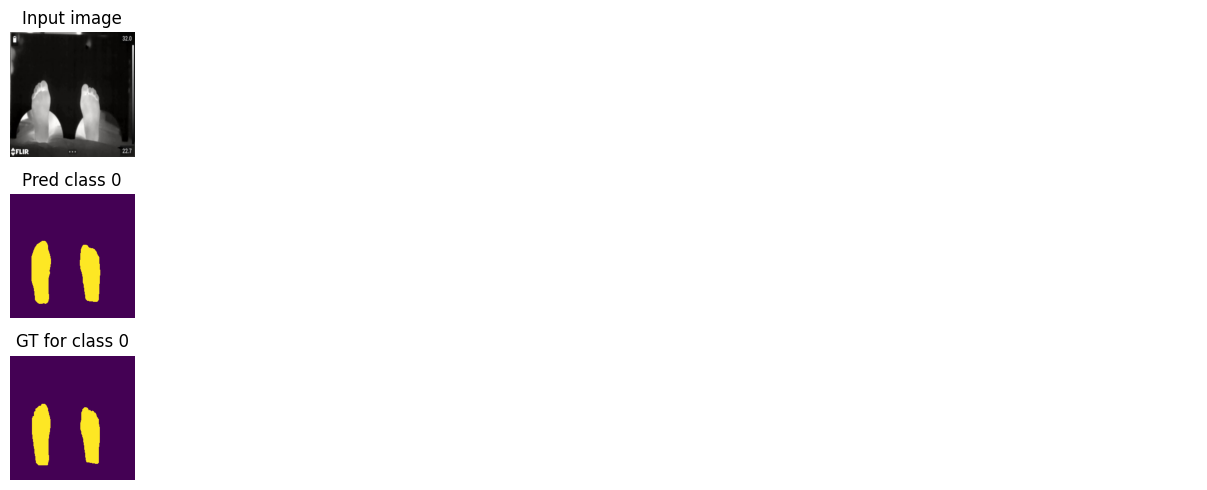

Train loss: 0.00991 | Time: 2m 43s | Val loss: 0.00953
Train_DICE_avg: 0.95799 | Train_Jaccard_avg: 0.92100 | Train_Sensitivity_avg: 0.96534 | Train_Specificity_avg: 0.98433 
Class 0 - Train_DICE: 0.95799 | Train_Jaccard: 0.92100 | Train_Sensitivity: 0.96534 | Train_Specificity: 0.98433 
Val_DICE_avg: 0.95872 | Val_Jaccard_avg: 0.92270 | Val_Sensitivity_avg: 0.97639 | Val_Specificity_avg: 0.97709 
Class 0 - Val_DICE: 0.95872 | Val_Jaccard: 0.92270 | Val_Sensitivity: 0.97639 | Val_Specificity: 0.97709 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.00977 | Time: 2m 46s | Val loss: 0.00946
Train_DICE_avg: 0.95822 | Train_Jaccard_avg: 0.92169 | Train_Sensitivity_avg: 0.96682 | Train_Specificity_avg: 0.98418 
Class 0 - Train_DICE: 0.95822 | Train_Jaccard: 0.92169 | Train_Sensitivity: 0.96682 | Train_Specificity: 0.98418 
Val_DICE_avg: 0.95870 | Val_Jaccard_avg: 0.92273 | Val_Sensitivity_avg: 0.97115 | Val_Specificity_avg: 0.97891 
Class 0 - Val_DICE: 0.95870 | Val_Jaccard: 0.92273 | Val_Sensitivity: 0.97115 | Val_Specificity: 0.97891 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]


Train loss: 0.00966 | Time: 2m 50s | Val loss: 0.00927
Train_DICE_avg: 0.95883 | Train_Jaccard_avg: 0.92252 | Train_Sensitivity_avg: 0.96732 | Train_Specificity_avg: 0.98464 
Class 0 - Train_DICE: 0.95883 | Train_Jaccard: 0.92252 | Train_Sensitivity: 0.96732 | Train_Specificity: 0.98464 
Val_DICE_avg: 0.96014 | Val_Jaccard_avg: 0.92525 | Val_Sensitivity_avg: 0.96994 | Val_Specificity_avg: 0.98053 
Class 0 - Val_DICE: 0.96014 | Val_Jaccard: 0.92525 | Val_Sensitivity: 0.96994 | Val_Specificity: 0.98053 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.00949 | Time: 2m 54s | Val loss: 0.00928
Train_DICE_avg: 0.95963 | Train_Jaccard_avg: 0.92390 | Train_Sensitivity_avg: 0.96627 | Train_Specificity_avg: 0.98530 
Class 0 - Train_DICE: 0.95963 | Train_Jaccard: 0.92390 | Train_Sensitivity: 0.96627 | Train_Specificity: 0.98530 
Val_DICE_avg: 0.95826 | Val_Jaccard_avg: 0.92218 | Val_Sensitivity_avg: 0.97346 | Val_Specificity_avg: 0.97772 
Class 0 - Val_DICE: 0.95826 | Val_Jaccard: 0.92218 | Val_Sensitivity: 0.97346 | Val_Specificity: 0.97772 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.00927 | Time: 2m 58s | Val loss: 0.00914
Train_DICE_avg: 0.96187 | Train_Jaccard_avg: 0.92770 | Train_Sensitivity_avg: 0.96864 | Train_Specificity_avg: 0.98548 
Class 0 - Train_DICE: 0.96187 | Train_Jaccard: 0.92770 | Train_Sensitivity: 0.96864 | Train_Specificity: 0.98548 
Val_DICE_avg: 0.96131 | Val_Jaccard_avg: 0.92748 | Val_Sensitivity_avg: 0.96547 | Val_Specificity_avg: 0.98281 
Class 0 - Val_DICE: 0.96131 | Val_Jaccard: 0.92748 | Val_Sensitivity: 0.96547 | Val_Specificity: 0.98281 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


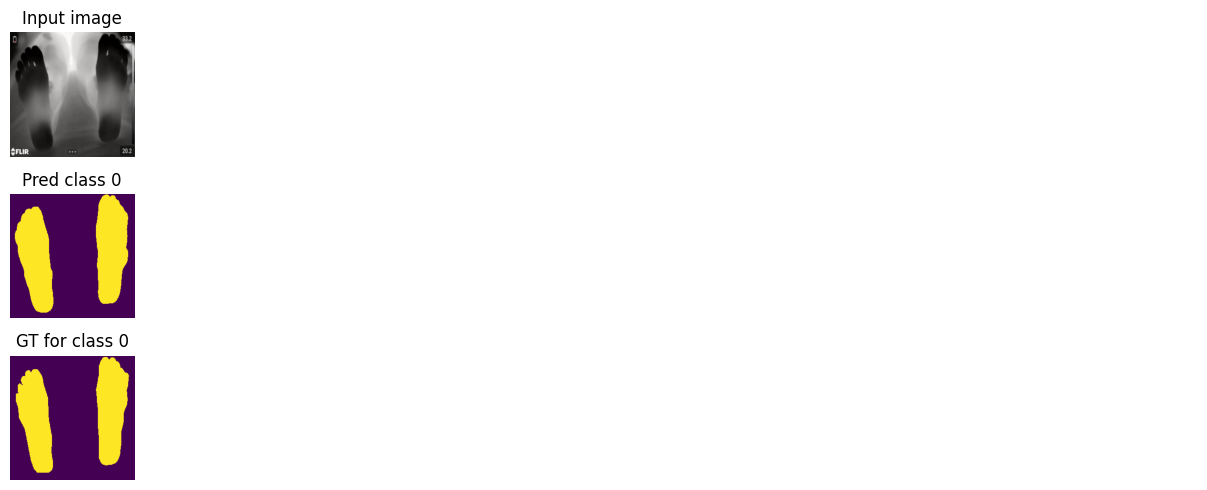

Train loss: 0.00921 | Time: 3m 2s | Val loss: 0.00907
Train_DICE_avg: 0.96084 | Train_Jaccard_avg: 0.92593 | Train_Sensitivity_avg: 0.96779 | Train_Specificity_avg: 0.98552 
Class 0 - Train_DICE: 0.96084 | Train_Jaccard: 0.92593 | Train_Sensitivity: 0.96779 | Train_Specificity: 0.98552 
Val_DICE_avg: 0.96231 | Val_Jaccard_avg: 0.92923 | Val_Sensitivity_avg: 0.96480 | Val_Specificity_avg: 0.98358 
Class 0 - Val_DICE: 0.96231 | Val_Jaccard: 0.92923 | Val_Sensitivity: 0.96480 | Val_Specificity: 0.98358 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.00933 | Time: 3m 6s | Val loss: 0.00908
Train_DICE_avg: 0.95956 | Train_Jaccard_avg: 0.92415 | Train_Sensitivity_avg: 0.96637 | Train_Specificity_avg: 0.98549 
Class 0 - Train_DICE: 0.95956 | Train_Jaccard: 0.92415 | Train_Sensitivity: 0.96637 | Train_Specificity: 0.98549 
Val_DICE_avg: 0.95999 | Val_Jaccard_avg: 0.92521 | Val_Sensitivity_avg: 0.97242 | Val_Specificity_avg: 0.97930 
Class 0 - Val_DICE: 0.95999 | Val_Jaccard: 0.92521 | Val_Sensitivity: 0.97242 | Val_Specificity: 0.97930 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.00890 | Time: 3m 10s | Val loss: 0.00883
Train_DICE_avg: 0.96346 | Train_Jaccard_avg: 0.93065 | Train_Sensitivity_avg: 0.97066 | Train_Specificity_avg: 0.98657 
Class 0 - Train_DICE: 0.96346 | Train_Jaccard: 0.93065 | Train_Sensitivity: 0.97066 | Train_Specificity: 0.98657 
Val_DICE_avg: 0.96270 | Val_Jaccard_avg: 0.92983 | Val_Sensitivity_avg: 0.97123 | Val_Specificity_avg: 0.98184 
Class 0 - Val_DICE: 0.96270 | Val_Jaccard: 0.92983 | Val_Sensitivity: 0.97123 | Val_Specificity: 0.98184 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.00909 | Time: 3m 14s | Val loss: 0.00876
Train_DICE_avg: 0.96019 | Train_Jaccard_avg: 0.92601 | Train_Sensitivity_avg: 0.96825 | Train_Specificity_avg: 0.98567 
Class 0 - Train_DICE: 0.96019 | Train_Jaccard: 0.92601 | Train_Sensitivity: 0.96825 | Train_Specificity: 0.98567 
Val_DICE_avg: 0.96251 | Val_Jaccard_avg: 0.92950 | Val_Sensitivity_avg: 0.97083 | Val_Specificity_avg: 0.98166 
Class 0 - Val_DICE: 0.96251 | Val_Jaccard: 0.92950 | Val_Sensitivity: 0.97083 | Val_Specificity: 0.98166 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.00871 | Time: 3m 18s | Val loss: 0.00874
Train_DICE_avg: 0.96431 | Train_Jaccard_avg: 0.93214 | Train_Sensitivity_avg: 0.96991 | Train_Specificity_avg: 0.98717 
Class 0 - Train_DICE: 0.96431 | Train_Jaccard: 0.93214 | Train_Sensitivity: 0.96991 | Train_Specificity: 0.98717 
Val_DICE_avg: 0.96244 | Val_Jaccard_avg: 0.92939 | Val_Sensitivity_avg: 0.97266 | Val_Specificity_avg: 0.98099 
Class 0 - Val_DICE: 0.96244 | Val_Jaccard: 0.92939 | Val_Sensitivity: 0.97266 | Val_Specificity: 0.98099 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


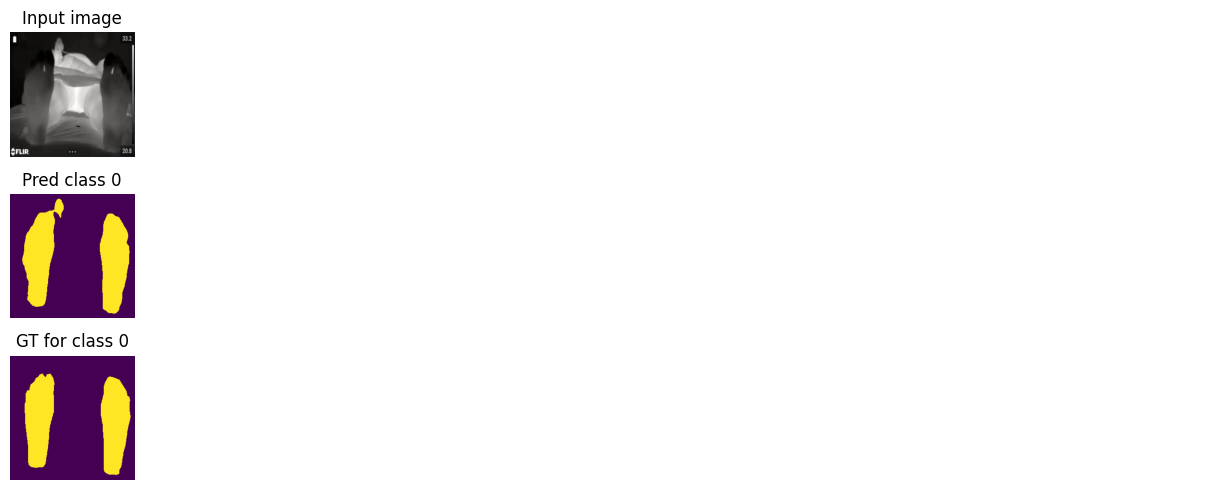

Train loss: 0.00874 | Time: 3m 22s | Val loss: 0.00863
Train_DICE_avg: 0.96404 | Train_Jaccard_avg: 0.93248 | Train_Sensitivity_avg: 0.97009 | Train_Specificity_avg: 0.98674 
Class 0 - Train_DICE: 0.96404 | Train_Jaccard: 0.93248 | Train_Sensitivity: 0.97009 | Train_Specificity: 0.98674 
Val_DICE_avg: 0.96361 | Val_Jaccard_avg: 0.93139 | Val_Sensitivity_avg: 0.97270 | Val_Specificity_avg: 0.98185 
Class 0 - Val_DICE: 0.96361 | Val_Jaccard: 0.93139 | Val_Sensitivity: 0.97270 | Val_Specificity: 0.98185 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.00882 | Time: 3m 26s | Val loss: 0.00859
Train_DICE_avg: 0.96381 | Train_Jaccard_avg: 0.93145 | Train_Sensitivity_avg: 0.96814 | Train_Specificity_avg: 0.98693 
Class 0 - Train_DICE: 0.96381 | Train_Jaccard: 0.93145 | Train_Sensitivity: 0.96814 | Train_Specificity: 0.98693 
Val_DICE_avg: 0.96359 | Val_Jaccard_avg: 0.93131 | Val_Sensitivity_avg: 0.97375 | Val_Specificity_avg: 0.98163 
Class 0 - Val_DICE: 0.96359 | Val_Jaccard: 0.93131 | Val_Sensitivity: 0.97375 | Val_Specificity: 0.98163 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.00862 | Time: 3m 30s | Val loss: 0.00859
Train_DICE_avg: 0.96525 | Train_Jaccard_avg: 0.93356 | Train_Sensitivity_avg: 0.97329 | Train_Specificity_avg: 0.98659 
Class 0 - Train_DICE: 0.96525 | Train_Jaccard: 0.93356 | Train_Sensitivity: 0.97329 | Train_Specificity: 0.98659 
Val_DICE_avg: 0.96371 | Val_Jaccard_avg: 0.93166 | Val_Sensitivity_avg: 0.97557 | Val_Specificity_avg: 0.98125 
Class 0 - Val_DICE: 0.96371 | Val_Jaccard: 0.93166 | Val_Sensitivity: 0.97557 | Val_Specificity: 0.98125 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.00864 | Time: 3m 34s | Val loss: 0.00864
Train_DICE_avg: 0.96367 | Train_Jaccard_avg: 0.93099 | Train_Sensitivity_avg: 0.97387 | Train_Specificity_avg: 0.98623 
Class 0 - Train_DICE: 0.96367 | Train_Jaccard: 0.93099 | Train_Sensitivity: 0.97387 | Train_Specificity: 0.98623 
Val_DICE_avg: 0.96352 | Val_Jaccard_avg: 0.93140 | Val_Sensitivity_avg: 0.97386 | Val_Specificity_avg: 0.98132 
Class 0 - Val_DICE: 0.96352 | Val_Jaccard: 0.93140 | Val_Sensitivity: 0.97386 | Val_Specificity: 0.98132 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.00844 | Time: 3m 37s | Val loss: 0.00862
Train_DICE_avg: 0.96627 | Train_Jaccard_avg: 0.93583 | Train_Sensitivity_avg: 0.96994 | Train_Specificity_avg: 0.98882 
Class 0 - Train_DICE: 0.96627 | Train_Jaccard: 0.93583 | Train_Sensitivity: 0.96994 | Train_Specificity: 0.98882 
Val_DICE_avg: 0.96217 | Val_Jaccard_avg: 0.92901 | Val_Sensitivity_avg: 0.97508 | Val_Specificity_avg: 0.98012 
Class 0 - Val_DICE: 0.96217 | Val_Jaccard: 0.92901 | Val_Sensitivity: 0.97508 | Val_Specificity: 0.98012 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


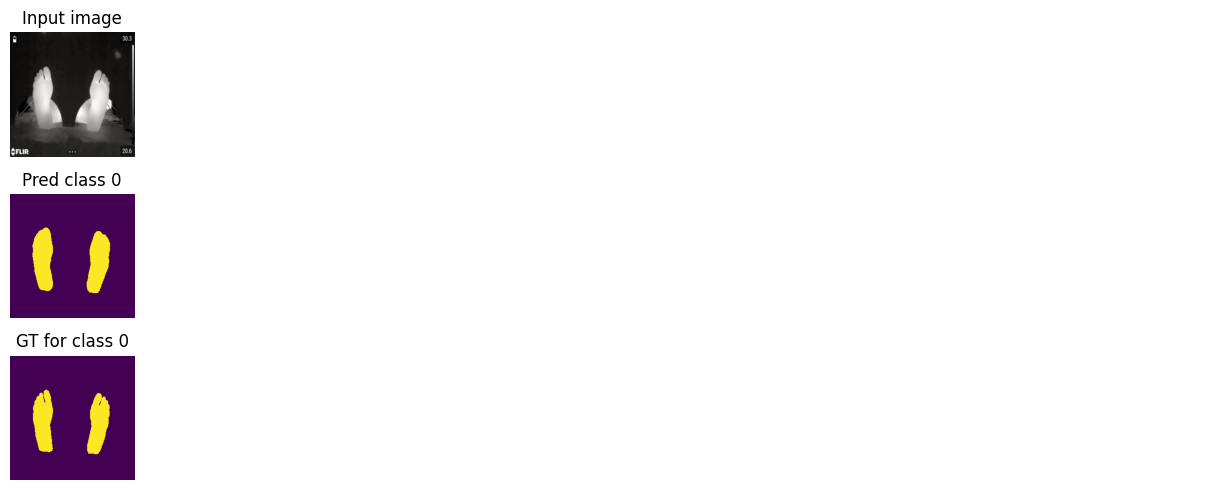

Train loss: 0.00846 | Time: 3m 42s | Val loss: 0.00856
Train_DICE_avg: 0.96480 | Train_Jaccard_avg: 0.93335 | Train_Sensitivity_avg: 0.97227 | Train_Specificity_avg: 0.98662 
Class 0 - Train_DICE: 0.96480 | Train_Jaccard: 0.93335 | Train_Sensitivity: 0.97227 | Train_Specificity: 0.98662 
Val_DICE_avg: 0.96319 | Val_Jaccard_avg: 0.93070 | Val_Sensitivity_avg: 0.97389 | Val_Specificity_avg: 0.98127 
Class 0 - Val_DICE: 0.96319 | Val_Jaccard: 0.93070 | Val_Sensitivity: 0.97389 | Val_Specificity: 0.98127 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.00866 | Time: 3m 46s | Val loss: 0.00853
Train_DICE_avg: 0.96409 | Train_Jaccard_avg: 0.93225 | Train_Sensitivity_avg: 0.96959 | Train_Specificity_avg: 0.98715 
Class 0 - Train_DICE: 0.96409 | Train_Jaccard: 0.93225 | Train_Sensitivity: 0.96959 | Train_Specificity: 0.98715 
Val_DICE_avg: 0.96308 | Val_Jaccard_avg: 0.93058 | Val_Sensitivity_avg: 0.97313 | Val_Specificity_avg: 0.98142 
Class 0 - Val_DICE: 0.96308 | Val_Jaccard: 0.93058 | Val_Sensitivity: 0.97313 | Val_Specificity: 0.98142 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.00844 | Time: 3m 49s | Val loss: 0.00843
Train_DICE_avg: 0.96538 | Train_Jaccard_avg: 0.93403 | Train_Sensitivity_avg: 0.96975 | Train_Specificity_avg: 0.98789 
Class 0 - Train_DICE: 0.96538 | Train_Jaccard: 0.93403 | Train_Sensitivity: 0.96975 | Train_Specificity: 0.98789 
Val_DICE_avg: 0.96313 | Val_Jaccard_avg: 0.93072 | Val_Sensitivity_avg: 0.97243 | Val_Specificity_avg: 0.98213 
Class 0 - Val_DICE: 0.96313 | Val_Jaccard: 0.93072 | Val_Sensitivity: 0.97243 | Val_Specificity: 0.98213 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.00846 | Time: 3m 54s | Val loss: 0.00834
Train_DICE_avg: 0.96454 | Train_Jaccard_avg: 0.93289 | Train_Sensitivity_avg: 0.97068 | Train_Specificity_avg: 0.98711 
Class 0 - Train_DICE: 0.96454 | Train_Jaccard: 0.93289 | Train_Sensitivity: 0.97068 | Train_Specificity: 0.98711 
Val_DICE_avg: 0.96464 | Val_Jaccard_avg: 0.93328 | Val_Sensitivity_avg: 0.97287 | Val_Specificity_avg: 0.98306 
Class 0 - Val_DICE: 0.96464 | Val_Jaccard: 0.93328 | Val_Sensitivity: 0.97287 | Val_Specificity: 0.98306 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.00836 | Time: 3m 57s | Val loss: 0.00838
Train_DICE_avg: 0.96489 | Train_Jaccard_avg: 0.93322 | Train_Sensitivity_avg: 0.97197 | Train_Specificity_avg: 0.98723 
Class 0 - Train_DICE: 0.96489 | Train_Jaccard: 0.93322 | Train_Sensitivity: 0.97197 | Train_Specificity: 0.98723 
Val_DICE_avg: 0.96422 | Val_Jaccard_avg: 0.93255 | Val_Sensitivity_avg: 0.97363 | Val_Specificity_avg: 0.98233 
Class 0 - Val_DICE: 0.96422 | Val_Jaccard: 0.93255 | Val_Sensitivity: 0.97363 | Val_Specificity: 0.98233 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


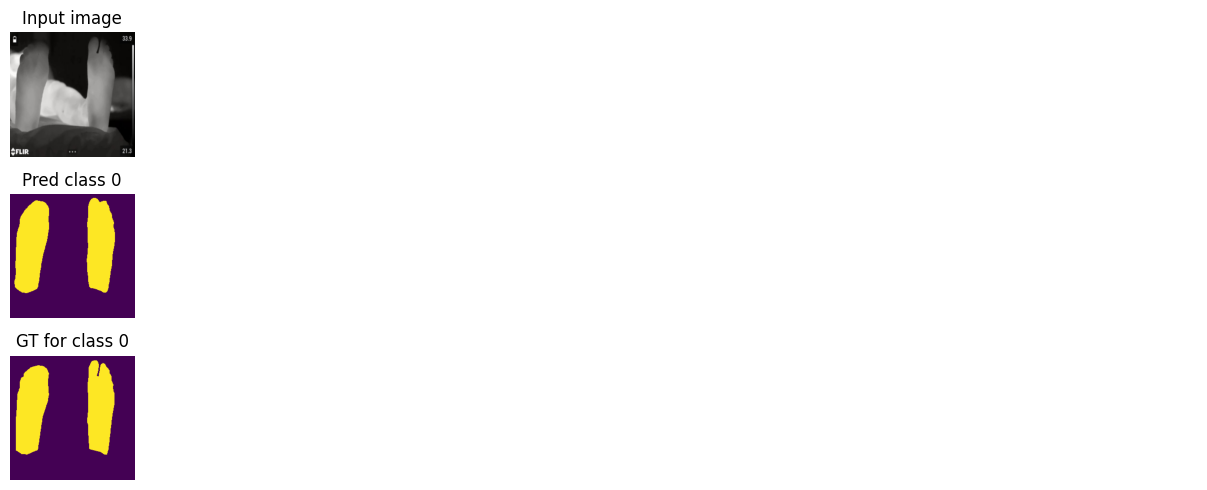

Train loss: 0.00824 | Time: 4m 1s | Val loss: 0.00837
Train_DICE_avg: 0.96587 | Train_Jaccard_avg: 0.93543 | Train_Sensitivity_avg: 0.97155 | Train_Specificity_avg: 0.98829 
Class 0 - Train_DICE: 0.96587 | Train_Jaccard: 0.93543 | Train_Sensitivity: 0.97155 | Train_Specificity: 0.98829 
Val_DICE_avg: 0.96409 | Val_Jaccard_avg: 0.93226 | Val_Sensitivity_avg: 0.97499 | Val_Specificity_avg: 0.98164 
Class 0 - Val_DICE: 0.96409 | Val_Jaccard: 0.93226 | Val_Sensitivity: 0.97499 | Val_Specificity: 0.98164 


Training DICE,▁▃▄▄▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇█████████████████████
Training Jaccard,▁▃▄▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████████
Training Loss,█▇▆▅▅▄▃▃▃▃▂▂▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▃▄▄▅▆▆▆▆▆▇▇▇▇▇▇█▇▇█▇███████████████████
Training Specificity,▁▃▄▄▄▅▅▆▅▆▆▆▇▇▇▇▇▇▇▇▇███████████████████
Validation DICE,▁▁▆▇▇▇▇▇▇██▇████████████████████████████
Validation Jaccard,▁▅▆▆▆▇▇▇▇▇▇▇█▇▇█████████████████████████
Validation Loss,█▇▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,██▁▁▄▄▅▅▆▅▆▆▇▆▅▆▆▇▇▆▆▆▇▇▆▇▇▇▆▆▇▆▇▇▇▇▇▇▇▇
Validation Specificity,▁▄▄▄▆▅▅▅▆▇▇▇▆▄▇▇▇▇▇▇█▇██████████████████
Training DICE,0.96587



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [17]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(3).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [18]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


Global Performance Metrics:
Loss mean: 0.01095, std: 0.00000
Dice Coefficient mean: 0.92870, std: 0.08771
Jaccard Index mean: 0.87738, std: 0.12858
Sensitivity mean: 0.95911, std: 0.08202
Specificity mean: 0.97643, std: 0.01298

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.92870, std: 0.08771
Jaccard mean: 0.87738, std: 0.12858
Sensitivity mean: 0.95911, std: 0.08202
Specificity mean: 0.97643, std: 0.01298


### Tversky Loss

In [19]:
config["Activation function"] = "sigmoid"
config["Loss function"] = "Tversky"
config["Alpha"] = 0.7
config["Beta"] = 0.3
config["Wandb monitoring"] = ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","FeetMamitas-ResUNet-Tversky"]

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: NVIDIA A100-SXM4-40GB
GPU Memory - Allocated: 0.74 GB
GPU Memory - Reserved: 1.49 GB
GPU Memory - Total: 39.56 GB
GPU Compute Capability: 8.0
GPU Multiprocessors: 108
PyTorch version: 2.6.0+cu124


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


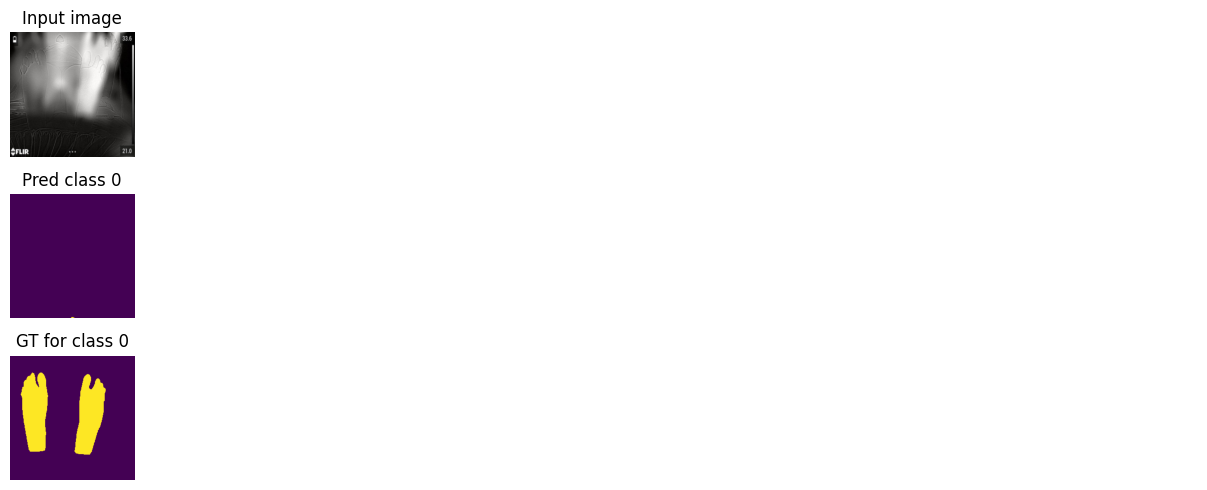

Train loss: 0.69134 | Time: 0m 4s | Val loss: 0.71467
Train_DICE_avg: 0.41200 | Train_Jaccard_avg: 0.26914 | Train_Sensitivity_avg: 0.36754 | Train_Specificity_avg: 0.82661 
Class 0 - Train_DICE: 0.41200 | Train_Jaccard: 0.26914 | Train_Sensitivity: 0.36754 | Train_Specificity: 0.82661 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 0.34921 | Val_Specificity_avg: 0.74494 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 0.34921 | Val_Specificity: 0.74494 

Epoch 2/61


Validation Epoch 2/61: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


Train loss: 0.61584 | Time: 0m 8s | Val loss: 0.70693
Train_DICE_avg: 0.59062 | Train_Jaccard_avg: 0.43188 | Train_Sensitivity_avg: 0.48530 | Train_Specificity_avg: 0.92433 
Class 0 - Train_DICE: 0.59062 | Train_Jaccard: 0.43188 | Train_Sensitivity: 0.48530 | Train_Specificity: 0.92433 
Val_DICE_avg: 0.00000 | Val_Jaccard_avg: 0.00000 | Val_Sensitivity_avg: 1.00000 | Val_Specificity_avg: 0.74496 
Class 0 - Val_DICE: 0.00000 | Val_Jaccard: 0.00000 | Val_Sensitivity: 1.00000 | Val_Specificity: 0.74496 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.56505 | Time: 0m 11s | Val loss: 0.64439
Train_DICE_avg: 0.65459 | Train_Jaccard_avg: 0.49964 | Train_Sensitivity_avg: 0.55010 | Train_Specificity_avg: 0.94513 
Class 0 - Train_DICE: 0.65459 | Train_Jaccard: 0.49964 | Train_Sensitivity: 0.55010 | Train_Specificity: 0.94513 
Val_DICE_avg: 0.56746 | Val_Jaccard_avg: 0.42347 | Val_Sensitivity_avg: 0.91277 | Val_Specificity_avg: 0.83070 
Class 0 - Val_DICE: 0.56746 | Val_Jaccard: 0.42347 | Val_Sensitivity: 0.91277 | Val_Specificity: 0.83070 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.53728 | Time: 0m 15s | Val loss: 0.52150
Train_DICE_avg: 0.68184 | Train_Jaccard_avg: 0.53153 | Train_Sensitivity_avg: 0.57943 | Train_Specificity_avg: 0.95272 
Class 0 - Train_DICE: 0.68184 | Train_Jaccard: 0.53153 | Train_Sensitivity: 0.57943 | Train_Specificity: 0.95272 
Val_DICE_avg: 0.77518 | Val_Jaccard_avg: 0.64455 | Val_Sensitivity_avg: 0.73459 | Val_Specificity_avg: 0.93868 
Class 0 - Val_DICE: 0.77518 | Val_Jaccard: 0.64455 | Val_Sensitivity: 0.73459 | Val_Specificity: 0.93868 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


Train loss: 0.51494 | Time: 0m 19s | Val loss: 0.47550
Train_DICE_avg: 0.70685 | Train_Jaccard_avg: 0.56127 | Train_Sensitivity_avg: 0.60427 | Train_Specificity_avg: 0.96043 
Class 0 - Train_DICE: 0.70685 | Train_Jaccard: 0.56127 | Train_Sensitivity: 0.60427 | Train_Specificity: 0.96043 
Val_DICE_avg: 0.78693 | Val_Jaccard_avg: 0.65928 | Val_Sensitivity_avg: 0.79315 | Val_Specificity_avg: 0.92609 
Class 0 - Val_DICE: 0.78693 | Val_Jaccard: 0.65928 | Val_Sensitivity: 0.79315 | Val_Specificity: 0.92609 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


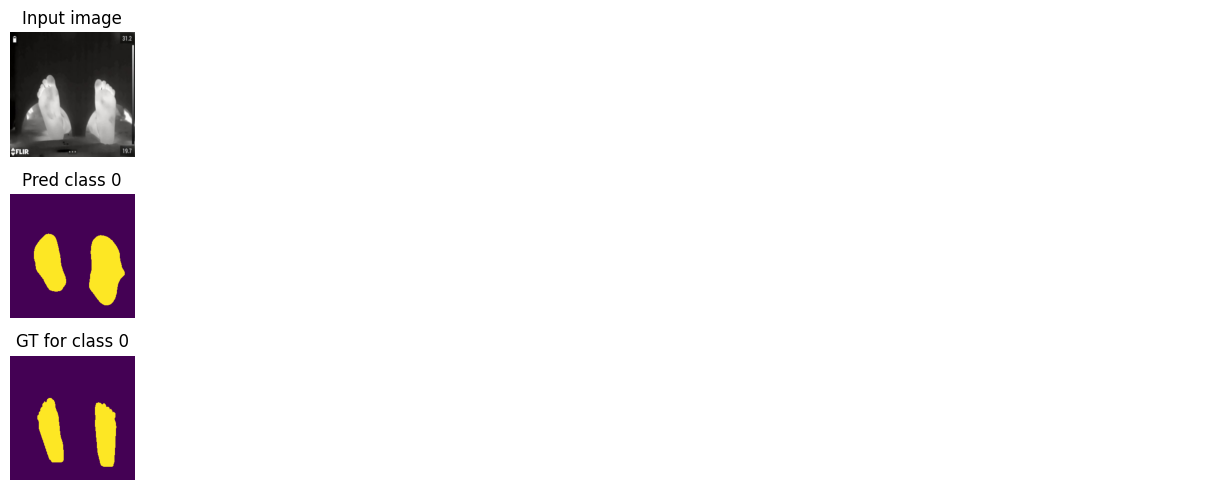

Train loss: 0.50179 | Time: 0m 23s | Val loss: 0.45249
Train_DICE_avg: 0.72292 | Train_Jaccard_avg: 0.58092 | Train_Sensitivity_avg: 0.62486 | Train_Specificity_avg: 0.96221 
Class 0 - Train_DICE: 0.72292 | Train_Jaccard: 0.58092 | Train_Sensitivity: 0.62486 | Train_Specificity: 0.96221 
Val_DICE_avg: 0.78346 | Val_Jaccard_avg: 0.65781 | Val_Sensitivity_avg: 0.73000 | Val_Specificity_avg: 0.94927 
Class 0 - Val_DICE: 0.78346 | Val_Jaccard: 0.65781 | Val_Sensitivity: 0.73000 | Val_Specificity: 0.94927 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.49026 | Time: 0m 27s | Val loss: 0.43747
Train_DICE_avg: 0.73866 | Train_Jaccard_avg: 0.60140 | Train_Sensitivity_avg: 0.64406 | Train_Specificity_avg: 0.96543 
Class 0 - Train_DICE: 0.73866 | Train_Jaccard: 0.60140 | Train_Sensitivity: 0.64406 | Train_Specificity: 0.96543 
Val_DICE_avg: 0.80511 | Val_Jaccard_avg: 0.68395 | Val_Sensitivity_avg: 0.74890 | Val_Specificity_avg: 0.95595 
Class 0 - Val_DICE: 0.80511 | Val_Jaccard: 0.68395 | Val_Sensitivity: 0.74890 | Val_Specificity: 0.95595 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.48080 | Time: 0m 31s | Val loss: 0.42963
Train_DICE_avg: 0.75564 | Train_Jaccard_avg: 0.62232 | Train_Sensitivity_avg: 0.66202 | Train_Specificity_avg: 0.96962 
Class 0 - Train_DICE: 0.75564 | Train_Jaccard: 0.62232 | Train_Sensitivity: 0.66202 | Train_Specificity: 0.96962 
Val_DICE_avg: 0.81895 | Val_Jaccard_avg: 0.70253 | Val_Sensitivity_avg: 0.77391 | Val_Specificity_avg: 0.95500 
Class 0 - Val_DICE: 0.81895 | Val_Jaccard: 0.70253 | Val_Sensitivity: 0.77391 | Val_Specificity: 0.95500 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.47384 | Time: 0m 35s | Val loss: 0.43461
Train_DICE_avg: 0.76055 | Train_Jaccard_avg: 0.63207 | Train_Sensitivity_avg: 0.67412 | Train_Specificity_avg: 0.96825 
Class 0 - Train_DICE: 0.76055 | Train_Jaccard: 0.63207 | Train_Sensitivity: 0.67412 | Train_Specificity: 0.96825 
Val_DICE_avg: 0.82452 | Val_Jaccard_avg: 0.71172 | Val_Sensitivity_avg: 0.83726 | Val_Specificity_avg: 0.93432 
Class 0 - Val_DICE: 0.82452 | Val_Jaccard: 0.71172 | Val_Sensitivity: 0.83726 | Val_Specificity: 0.93432 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.46916 | Time: 0m 39s | Val loss: 0.41520
Train_DICE_avg: 0.76906 | Train_Jaccard_avg: 0.64083 | Train_Sensitivity_avg: 0.68125 | Train_Specificity_avg: 0.97114 
Class 0 - Train_DICE: 0.76906 | Train_Jaccard: 0.64083 | Train_Sensitivity: 0.68125 | Train_Specificity: 0.97114 
Val_DICE_avg: 0.84430 | Val_Jaccard_avg: 0.73869 | Val_Sensitivity_avg: 0.82021 | Val_Specificity_avg: 0.95515 
Class 0 - Val_DICE: 0.84430 | Val_Jaccard: 0.73869 | Val_Sensitivity: 0.82021 | Val_Specificity: 0.95515 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


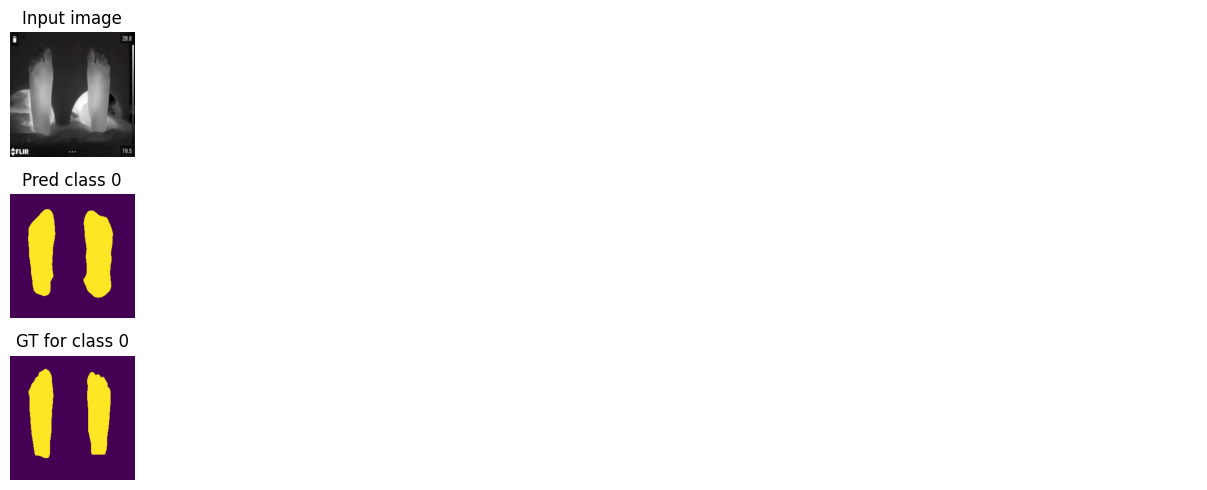

Train loss: 0.46918 | Time: 0m 43s | Val loss: 0.41088
Train_DICE_avg: 0.77304 | Train_Jaccard_avg: 0.64440 | Train_Sensitivity_avg: 0.69989 | Train_Specificity_avg: 0.96387 
Class 0 - Train_DICE: 0.77304 | Train_Jaccard: 0.64440 | Train_Sensitivity: 0.69989 | Train_Specificity: 0.96387 
Val_DICE_avg: 0.84490 | Val_Jaccard_avg: 0.73971 | Val_Sensitivity_avg: 0.83957 | Val_Specificity_avg: 0.94813 
Class 0 - Val_DICE: 0.84490 | Val_Jaccard: 0.73971 | Val_Sensitivity: 0.83957 | Val_Specificity: 0.94813 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.45873 | Time: 0m 47s | Val loss: 0.40597
Train_DICE_avg: 0.78567 | Train_Jaccard_avg: 0.66414 | Train_Sensitivity_avg: 0.70358 | Train_Specificity_avg: 0.97306 
Class 0 - Train_DICE: 0.78567 | Train_Jaccard: 0.66414 | Train_Sensitivity: 0.70358 | Train_Specificity: 0.97306 
Val_DICE_avg: 0.85840 | Val_Jaccard_avg: 0.76056 | Val_Sensitivity_avg: 0.82087 | Val_Specificity_avg: 0.96196 
Class 0 - Val_DICE: 0.85840 | Val_Jaccard: 0.76056 | Val_Sensitivity: 0.82087 | Val_Specificity: 0.96196 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


Train loss: 0.44915 | Time: 0m 51s | Val loss: 0.40592
Train_DICE_avg: 0.81103 | Train_Jaccard_avg: 0.70010 | Train_Sensitivity_avg: 0.74633 | Train_Specificity_avg: 0.97157 
Class 0 - Train_DICE: 0.81103 | Train_Jaccard: 0.70010 | Train_Sensitivity: 0.74633 | Train_Specificity: 0.97157 
Val_DICE_avg: 0.86373 | Val_Jaccard_avg: 0.76785 | Val_Sensitivity_avg: 0.81109 | Val_Specificity_avg: 0.97122 
Class 0 - Val_DICE: 0.86373 | Val_Jaccard: 0.76785 | Val_Sensitivity: 0.81109 | Val_Specificity: 0.97122 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]


Train loss: 0.44313 | Time: 0m 55s | Val loss: 0.39239
Train_DICE_avg: 0.81634 | Train_Jaccard_avg: 0.70751 | Train_Sensitivity_avg: 0.74377 | Train_Specificity_avg: 0.97678 
Class 0 - Train_DICE: 0.81634 | Train_Jaccard: 0.70751 | Train_Sensitivity: 0.74377 | Train_Specificity: 0.97678 
Val_DICE_avg: 0.88121 | Val_Jaccard_avg: 0.79390 | Val_Sensitivity_avg: 0.85335 | Val_Specificity_avg: 0.96470 
Class 0 - Val_DICE: 0.88121 | Val_Jaccard: 0.79390 | Val_Sensitivity: 0.85335 | Val_Specificity: 0.96470 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.43593 | Time: 0m 59s | Val loss: 0.38393
Train_DICE_avg: 0.83283 | Train_Jaccard_avg: 0.73155 | Train_Sensitivity_avg: 0.77128 | Train_Specificity_avg: 0.97622 
Class 0 - Train_DICE: 0.83283 | Train_Jaccard: 0.73155 | Train_Sensitivity: 0.77128 | Train_Specificity: 0.97622 
Val_DICE_avg: 0.88908 | Val_Jaccard_avg: 0.80681 | Val_Sensitivity_avg: 0.85432 | Val_Specificity_avg: 0.97003 
Class 0 - Val_DICE: 0.88908 | Val_Jaccard: 0.80681 | Val_Sensitivity: 0.85432 | Val_Specificity: 0.97003 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


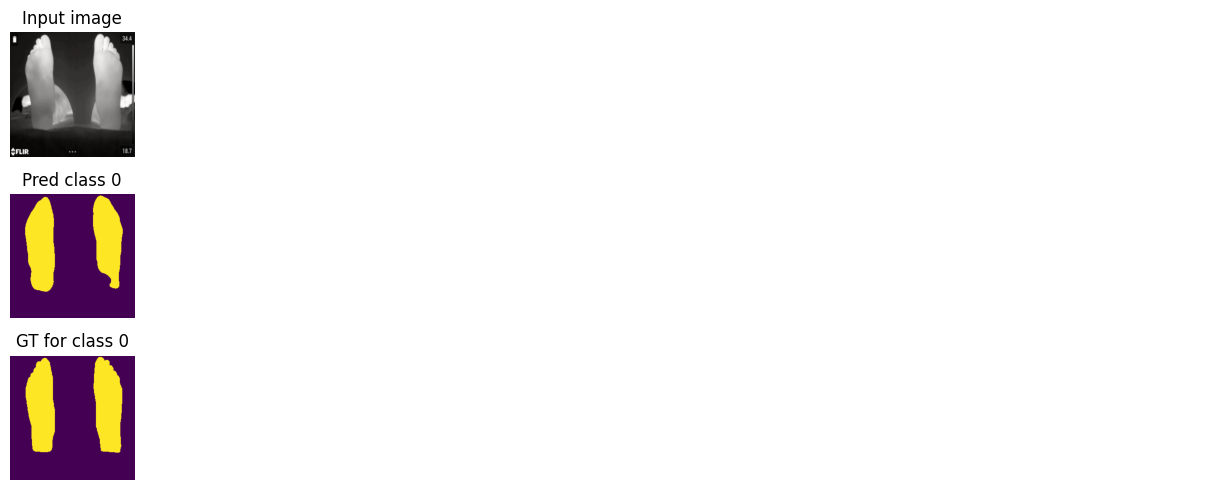

Train loss: 0.43214 | Time: 1m 3s | Val loss: 0.35385
Train_DICE_avg: 0.83646 | Train_Jaccard_avg: 0.73685 | Train_Sensitivity_avg: 0.77657 | Train_Specificity_avg: 0.97645 
Class 0 - Train_DICE: 0.83646 | Train_Jaccard: 0.73685 | Train_Sensitivity: 0.77657 | Train_Specificity: 0.97645 
Val_DICE_avg: 0.89564 | Val_Jaccard_avg: 0.81618 | Val_Sensitivity_avg: 0.87696 | Val_Specificity_avg: 0.96458 
Class 0 - Val_DICE: 0.89564 | Val_Jaccard: 0.81618 | Val_Sensitivity: 0.87696 | Val_Specificity: 0.96458 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.42560 | Time: 1m 7s | Val loss: 0.35524
Train_DICE_avg: 0.84962 | Train_Jaccard_avg: 0.75525 | Train_Sensitivity_avg: 0.79052 | Train_Specificity_avg: 0.98003 
Class 0 - Train_DICE: 0.84962 | Train_Jaccard: 0.75525 | Train_Sensitivity: 0.79052 | Train_Specificity: 0.98003 
Val_DICE_avg: 0.90510 | Val_Jaccard_avg: 0.83131 | Val_Sensitivity_avg: 0.90358 | Val_Specificity_avg: 0.96070 
Class 0 - Val_DICE: 0.90510 | Val_Jaccard: 0.83131 | Val_Sensitivity: 0.90358 | Val_Specificity: 0.96070 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.42319 | Time: 1m 11s | Val loss: 0.34972
Train_DICE_avg: 0.84996 | Train_Jaccard_avg: 0.75668 | Train_Sensitivity_avg: 0.79779 | Train_Specificity_avg: 0.97609 
Class 0 - Train_DICE: 0.84996 | Train_Jaccard: 0.75668 | Train_Sensitivity: 0.79779 | Train_Specificity: 0.97609 
Val_DICE_avg: 0.91230 | Val_Jaccard_avg: 0.84288 | Val_Sensitivity_avg: 0.89805 | Val_Specificity_avg: 0.96872 
Class 0 - Val_DICE: 0.91230 | Val_Jaccard: 0.84288 | Val_Sensitivity: 0.89805 | Val_Specificity: 0.96872 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.41674 | Time: 1m 15s | Val loss: 0.34384
Train_DICE_avg: 0.86145 | Train_Jaccard_avg: 0.77337 | Train_Sensitivity_avg: 0.80904 | Train_Specificity_avg: 0.97991 
Class 0 - Train_DICE: 0.86145 | Train_Jaccard: 0.77337 | Train_Sensitivity: 0.80904 | Train_Specificity: 0.97991 
Val_DICE_avg: 0.90219 | Val_Jaccard_avg: 0.82790 | Val_Sensitivity_avg: 0.86281 | Val_Specificity_avg: 0.97814 
Class 0 - Val_DICE: 0.90219 | Val_Jaccard: 0.82790 | Val_Sensitivity: 0.86281 | Val_Specificity: 0.97814 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.41452 | Time: 1m 19s | Val loss: 0.33700
Train_DICE_avg: 0.86385 | Train_Jaccard_avg: 0.77519 | Train_Sensitivity_avg: 0.81322 | Train_Specificity_avg: 0.97864 
Class 0 - Train_DICE: 0.86385 | Train_Jaccard: 0.77519 | Train_Sensitivity: 0.81322 | Train_Specificity: 0.97864 
Val_DICE_avg: 0.90192 | Val_Jaccard_avg: 0.82844 | Val_Sensitivity_avg: 0.85515 | Val_Specificity_avg: 0.98276 
Class 0 - Val_DICE: 0.90192 | Val_Jaccard: 0.82844 | Val_Sensitivity: 0.85515 | Val_Specificity: 0.98276 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


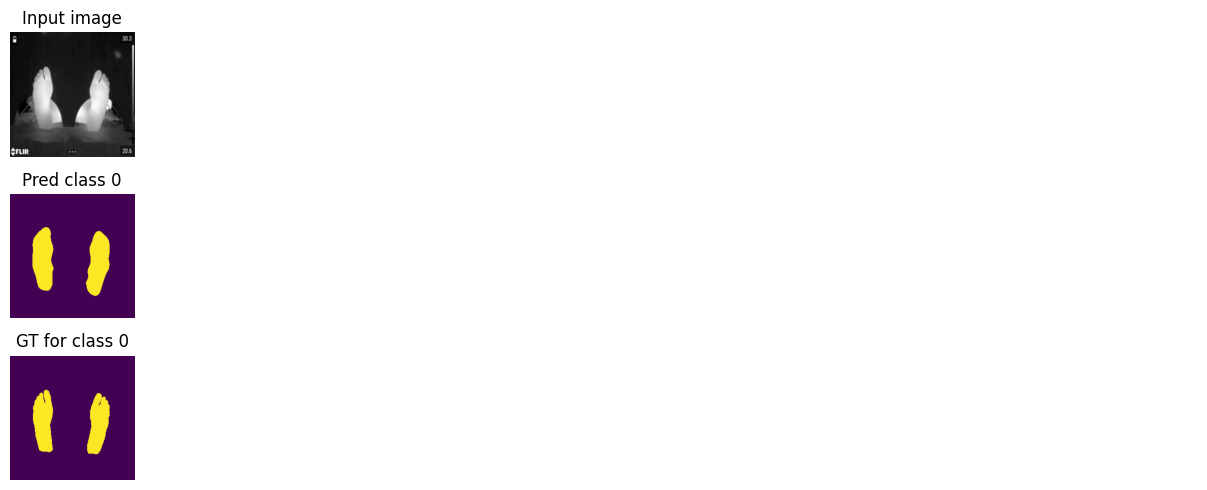

Train loss: 0.41619 | Time: 1m 23s | Val loss: 0.32718
Train_DICE_avg: 0.86442 | Train_Jaccard_avg: 0.77349 | Train_Sensitivity_avg: 0.82088 | Train_Specificity_avg: 0.97457 
Class 0 - Train_DICE: 0.86442 | Train_Jaccard: 0.77349 | Train_Sensitivity: 0.82088 | Train_Specificity: 0.97457 
Val_DICE_avg: 0.91636 | Val_Jaccard_avg: 0.85255 | Val_Sensitivity_avg: 0.94013 | Val_Specificity_avg: 0.95879 
Class 0 - Val_DICE: 0.91636 | Val_Jaccard: 0.85255 | Val_Sensitivity: 0.94013 | Val_Specificity: 0.95879 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.41225 | Time: 1m 27s | Val loss: 0.32279
Train_DICE_avg: 0.86323 | Train_Jaccard_avg: 0.77526 | Train_Sensitivity_avg: 0.80852 | Train_Specificity_avg: 0.98090 
Class 0 - Train_DICE: 0.86323 | Train_Jaccard: 0.77526 | Train_Sensitivity: 0.80852 | Train_Specificity: 0.98090 
Val_DICE_avg: 0.91521 | Val_Jaccard_avg: 0.84888 | Val_Sensitivity_avg: 0.89739 | Val_Specificity_avg: 0.97395 
Class 0 - Val_DICE: 0.91521 | Val_Jaccard: 0.84888 | Val_Sensitivity: 0.89739 | Val_Specificity: 0.97395 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.40666 | Time: 1m 31s | Val loss: 0.33765
Train_DICE_avg: 0.87102 | Train_Jaccard_avg: 0.78607 | Train_Sensitivity_avg: 0.82373 | Train_Specificity_avg: 0.97911 
Class 0 - Train_DICE: 0.87102 | Train_Jaccard: 0.78607 | Train_Sensitivity: 0.82373 | Train_Specificity: 0.97911 
Val_DICE_avg: 0.91333 | Val_Jaccard_avg: 0.84709 | Val_Sensitivity_avg: 0.89677 | Val_Specificity_avg: 0.97317 
Class 0 - Val_DICE: 0.91333 | Val_Jaccard: 0.84709 | Val_Sensitivity: 0.89677 | Val_Specificity: 0.97317 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


Train loss: 0.40299 | Time: 1m 35s | Val loss: 0.33233
Train_DICE_avg: 0.88304 | Train_Jaccard_avg: 0.80250 | Train_Sensitivity_avg: 0.83624 | Train_Specificity_avg: 0.98155 
Class 0 - Train_DICE: 0.88304 | Train_Jaccard: 0.80250 | Train_Sensitivity: 0.83624 | Train_Specificity: 0.98155 
Val_DICE_avg: 0.91924 | Val_Jaccard_avg: 0.85802 | Val_Sensitivity_avg: 0.93148 | Val_Specificity_avg: 0.96229 
Class 0 - Val_DICE: 0.91924 | Val_Jaccard: 0.85802 | Val_Sensitivity: 0.93148 | Val_Specificity: 0.96229 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.39763 | Time: 1m 39s | Val loss: 0.32195
Train_DICE_avg: 0.88379 | Train_Jaccard_avg: 0.80483 | Train_Sensitivity_avg: 0.83634 | Train_Specificity_avg: 0.98322 
Class 0 - Train_DICE: 0.88379 | Train_Jaccard: 0.80483 | Train_Sensitivity: 0.83634 | Train_Specificity: 0.98322 
Val_DICE_avg: 0.92127 | Val_Jaccard_avg: 0.85989 | Val_Sensitivity_avg: 0.89800 | Val_Specificity_avg: 0.97848 
Class 0 - Val_DICE: 0.92127 | Val_Jaccard: 0.85989 | Val_Sensitivity: 0.89800 | Val_Specificity: 0.97848 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


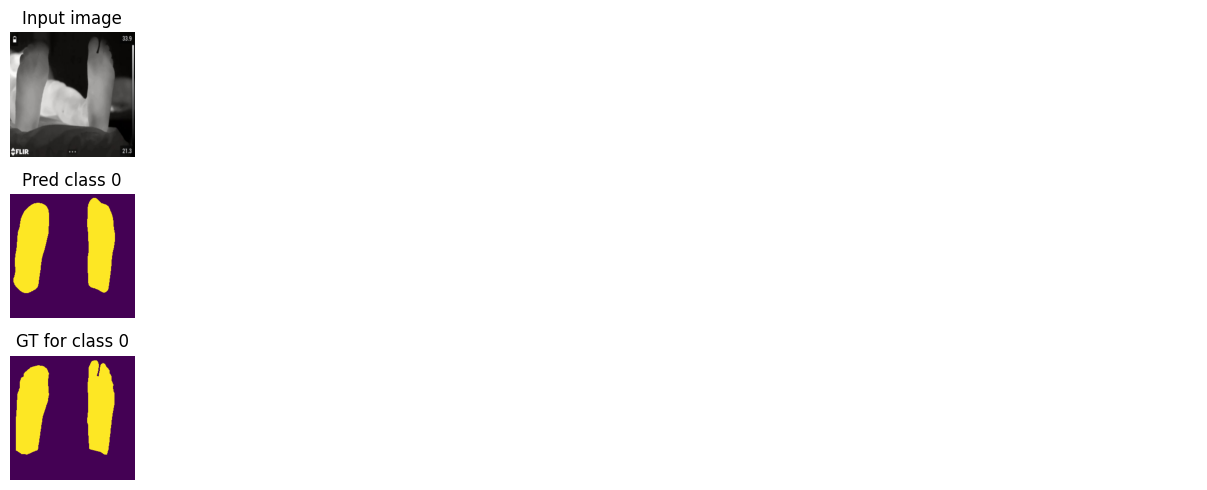

Train loss: 0.39510 | Time: 1m 43s | Val loss: 0.30795
Train_DICE_avg: 0.89059 | Train_Jaccard_avg: 0.81473 | Train_Sensitivity_avg: 0.84510 | Train_Specificity_avg: 0.98319 
Class 0 - Train_DICE: 0.89059 | Train_Jaccard: 0.81473 | Train_Sensitivity: 0.84510 | Train_Specificity: 0.98319 
Val_DICE_avg: 0.92960 | Val_Jaccard_avg: 0.87307 | Val_Sensitivity_avg: 0.91640 | Val_Specificity_avg: 0.97594 
Class 0 - Val_DICE: 0.92960 | Val_Jaccard: 0.87307 | Val_Sensitivity: 0.91640 | Val_Specificity: 0.97594 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


Train loss: 0.38938 | Time: 1m 47s | Val loss: 0.31761
Train_DICE_avg: 0.89704 | Train_Jaccard_avg: 0.82405 | Train_Sensitivity_avg: 0.85163 | Train_Specificity_avg: 0.98484 
Class 0 - Train_DICE: 0.89704 | Train_Jaccard: 0.82405 | Train_Sensitivity: 0.85163 | Train_Specificity: 0.98484 
Val_DICE_avg: 0.93273 | Val_Jaccard_avg: 0.87986 | Val_Sensitivity_avg: 0.92998 | Val_Specificity_avg: 0.97346 
Class 0 - Val_DICE: 0.93273 | Val_Jaccard: 0.87986 | Val_Sensitivity: 0.92998 | Val_Specificity: 0.97346 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.38761 | Time: 1m 51s | Val loss: 0.31366
Train_DICE_avg: 0.89839 | Train_Jaccard_avg: 0.82766 | Train_Sensitivity_avg: 0.85649 | Train_Specificity_avg: 0.98497 
Class 0 - Train_DICE: 0.89839 | Train_Jaccard: 0.82766 | Train_Sensitivity: 0.85649 | Train_Specificity: 0.98497 
Val_DICE_avg: 0.93027 | Val_Jaccard_avg: 0.87492 | Val_Sensitivity_avg: 0.91140 | Val_Specificity_avg: 0.97799 
Class 0 - Val_DICE: 0.93027 | Val_Jaccard: 0.87492 | Val_Sensitivity: 0.91140 | Val_Specificity: 0.97799 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.38689 | Time: 1m 54s | Val loss: 0.31058
Train_DICE_avg: 0.90025 | Train_Jaccard_avg: 0.82857 | Train_Sensitivity_avg: 0.85679 | Train_Specificity_avg: 0.98488 
Class 0 - Train_DICE: 0.90025 | Train_Jaccard: 0.82857 | Train_Sensitivity: 0.85679 | Train_Specificity: 0.98488 
Val_DICE_avg: 0.93252 | Val_Jaccard_avg: 0.87794 | Val_Sensitivity_avg: 0.91147 | Val_Specificity_avg: 0.97831 
Class 0 - Val_DICE: 0.93252 | Val_Jaccard: 0.87794 | Val_Sensitivity: 0.91147 | Val_Specificity: 0.97831 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.38680 | Time: 1m 58s | Val loss: 0.30414
Train_DICE_avg: 0.90091 | Train_Jaccard_avg: 0.82966 | Train_Sensitivity_avg: 0.85338 | Train_Specificity_avg: 0.98729 
Class 0 - Train_DICE: 0.90091 | Train_Jaccard: 0.82966 | Train_Sensitivity: 0.85338 | Train_Specificity: 0.98729 
Val_DICE_avg: 0.93015 | Val_Jaccard_avg: 0.87465 | Val_Sensitivity_avg: 0.91186 | Val_Specificity_avg: 0.97642 
Class 0 - Val_DICE: 0.93015 | Val_Jaccard: 0.87465 | Val_Sensitivity: 0.91186 | Val_Specificity: 0.97642 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


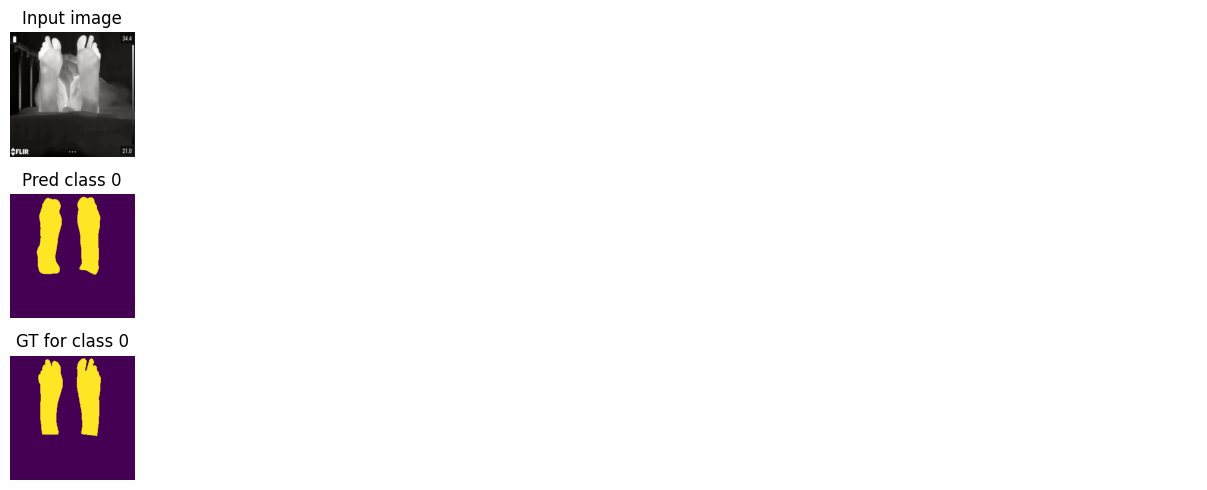

Train loss: 0.38777 | Time: 2m 3s | Val loss: 0.29588
Train_DICE_avg: 0.89658 | Train_Jaccard_avg: 0.82127 | Train_Sensitivity_avg: 0.85350 | Train_Specificity_avg: 0.98266 
Class 0 - Train_DICE: 0.89658 | Train_Jaccard: 0.82127 | Train_Sensitivity: 0.85350 | Train_Specificity: 0.98266 
Val_DICE_avg: 0.94273 | Val_Jaccard_avg: 0.89347 | Val_Sensitivity_avg: 0.95589 | Val_Specificity_avg: 0.97223 
Class 0 - Val_DICE: 0.94273 | Val_Jaccard: 0.89347 | Val_Sensitivity: 0.95589 | Val_Specificity: 0.97223 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]


Train loss: 0.38836 | Time: 2m 6s | Val loss: 0.28634
Train_DICE_avg: 0.88708 | Train_Jaccard_avg: 0.81088 | Train_Sensitivity_avg: 0.84174 | Train_Specificity_avg: 0.98334 
Class 0 - Train_DICE: 0.88708 | Train_Jaccard: 0.81088 | Train_Sensitivity: 0.84174 | Train_Specificity: 0.98334 
Val_DICE_avg: 0.92350 | Val_Jaccard_avg: 0.86187 | Val_Sensitivity_avg: 0.88161 | Val_Specificity_avg: 0.98575 
Class 0 - Val_DICE: 0.92350 | Val_Jaccard: 0.86187 | Val_Sensitivity: 0.88161 | Val_Specificity: 0.98575 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.38101 | Time: 2m 10s | Val loss: 0.28947
Train_DICE_avg: 0.90154 | Train_Jaccard_avg: 0.83091 | Train_Sensitivity_avg: 0.85753 | Train_Specificity_avg: 0.98557 
Class 0 - Train_DICE: 0.90154 | Train_Jaccard: 0.83091 | Train_Sensitivity: 0.85753 | Train_Specificity: 0.98557 
Val_DICE_avg: 0.94065 | Val_Jaccard_avg: 0.89162 | Val_Sensitivity_avg: 0.93280 | Val_Specificity_avg: 0.97579 
Class 0 - Val_DICE: 0.94065 | Val_Jaccard: 0.89162 | Val_Sensitivity: 0.93280 | Val_Specificity: 0.97579 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.37342 | Time: 2m 14s | Val loss: 0.29730
Train_DICE_avg: 0.91147 | Train_Jaccard_avg: 0.84720 | Train_Sensitivity_avg: 0.87427 | Train_Specificity_avg: 0.98587 
Class 0 - Train_DICE: 0.91147 | Train_Jaccard: 0.84720 | Train_Sensitivity: 0.87427 | Train_Specificity: 0.98587 
Val_DICE_avg: 0.94414 | Val_Jaccard_avg: 0.89716 | Val_Sensitivity_avg: 0.93399 | Val_Specificity_avg: 0.97862 
Class 0 - Val_DICE: 0.94414 | Val_Jaccard: 0.89716 | Val_Sensitivity: 0.93399 | Val_Specificity: 0.97862 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.37351 | Time: 2m 18s | Val loss: 0.29258
Train_DICE_avg: 0.91407 | Train_Jaccard_avg: 0.84939 | Train_Sensitivity_avg: 0.87490 | Train_Specificity_avg: 0.98727 
Class 0 - Train_DICE: 0.91407 | Train_Jaccard: 0.84939 | Train_Sensitivity: 0.87490 | Train_Specificity: 0.98727 
Val_DICE_avg: 0.94412 | Val_Jaccard_avg: 0.89774 | Val_Sensitivity_avg: 0.93886 | Val_Specificity_avg: 0.97594 
Class 0 - Val_DICE: 0.94412 | Val_Jaccard: 0.89774 | Val_Sensitivity: 0.93886 | Val_Specificity: 0.97594 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


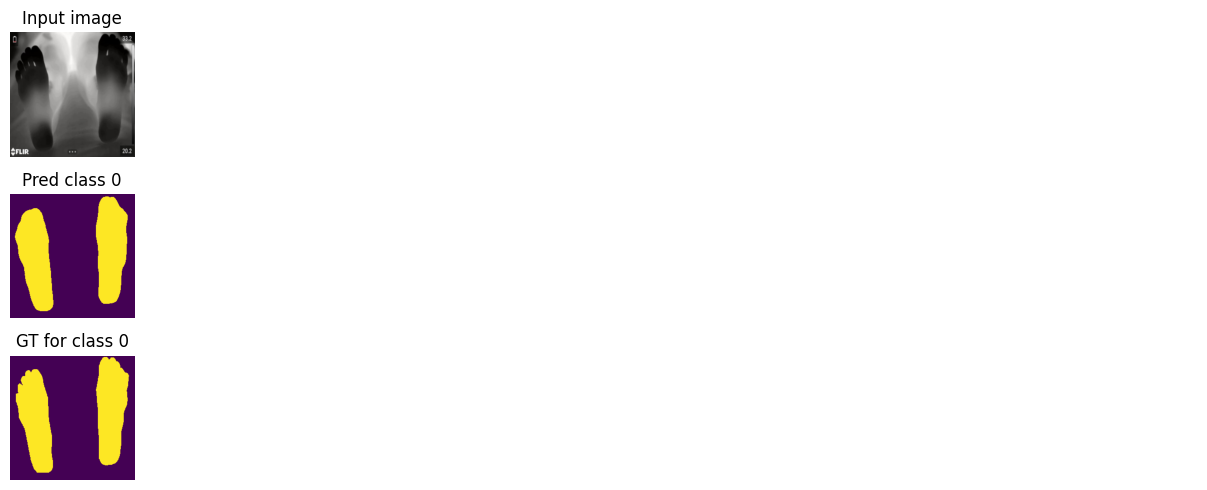

Train loss: 0.36949 | Time: 2m 22s | Val loss: 0.28615
Train_DICE_avg: 0.91442 | Train_Jaccard_avg: 0.85175 | Train_Sensitivity_avg: 0.87208 | Train_Specificity_avg: 0.98963 
Class 0 - Train_DICE: 0.91442 | Train_Jaccard: 0.85175 | Train_Sensitivity: 0.87208 | Train_Specificity: 0.98963 
Val_DICE_avg: 0.94399 | Val_Jaccard_avg: 0.89761 | Val_Sensitivity_avg: 0.93283 | Val_Specificity_avg: 0.97835 
Class 0 - Val_DICE: 0.94399 | Val_Jaccard: 0.89761 | Val_Sensitivity: 0.93283 | Val_Specificity: 0.97835 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.36963 | Time: 2m 26s | Val loss: 0.27839
Train_DICE_avg: 0.91608 | Train_Jaccard_avg: 0.85371 | Train_Sensitivity_avg: 0.87981 | Train_Specificity_avg: 0.98710 
Class 0 - Train_DICE: 0.91608 | Train_Jaccard: 0.85371 | Train_Sensitivity: 0.87981 | Train_Specificity: 0.98710 
Val_DICE_avg: 0.94770 | Val_Jaccard_avg: 0.90378 | Val_Sensitivity_avg: 0.93610 | Val_Specificity_avg: 0.98031 
Class 0 - Val_DICE: 0.94770 | Val_Jaccard: 0.90378 | Val_Sensitivity: 0.93610 | Val_Specificity: 0.98031 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.36715 | Time: 2m 30s | Val loss: 0.28070
Train_DICE_avg: 0.91717 | Train_Jaccard_avg: 0.85615 | Train_Sensitivity_avg: 0.87509 | Train_Specificity_avg: 0.98996 
Class 0 - Train_DICE: 0.91717 | Train_Jaccard: 0.85615 | Train_Sensitivity: 0.87509 | Train_Specificity: 0.98996 
Val_DICE_avg: 0.94570 | Val_Jaccard_avg: 0.89975 | Val_Sensitivity_avg: 0.92384 | Val_Specificity_avg: 0.98459 
Class 0 - Val_DICE: 0.94570 | Val_Jaccard: 0.89975 | Val_Sensitivity: 0.92384 | Val_Specificity: 0.98459 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.36588 | Time: 2m 34s | Val loss: 0.27556
Train_DICE_avg: 0.91851 | Train_Jaccard_avg: 0.85983 | Train_Sensitivity_avg: 0.87966 | Train_Specificity_avg: 0.98979 
Class 0 - Train_DICE: 0.91851 | Train_Jaccard: 0.85983 | Train_Sensitivity: 0.87966 | Train_Specificity: 0.98979 
Val_DICE_avg: 0.95159 | Val_Jaccard_avg: 0.91000 | Val_Sensitivity_avg: 0.94190 | Val_Specificity_avg: 0.98149 
Class 0 - Val_DICE: 0.95159 | Val_Jaccard: 0.91000 | Val_Sensitivity: 0.94190 | Val_Specificity: 0.98149 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


Train loss: 0.36470 | Time: 2m 38s | Val loss: 0.27286
Train_DICE_avg: 0.92085 | Train_Jaccard_avg: 0.86089 | Train_Sensitivity_avg: 0.87958 | Train_Specificity_avg: 0.99051 
Class 0 - Train_DICE: 0.92085 | Train_Jaccard: 0.86089 | Train_Sensitivity: 0.87958 | Train_Specificity: 0.99051 
Val_DICE_avg: 0.95329 | Val_Jaccard_avg: 0.91296 | Val_Sensitivity_avg: 0.94695 | Val_Specificity_avg: 0.98115 
Class 0 - Val_DICE: 0.95329 | Val_Jaccard: 0.91296 | Val_Sensitivity: 0.94695 | Val_Specificity: 0.98115 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


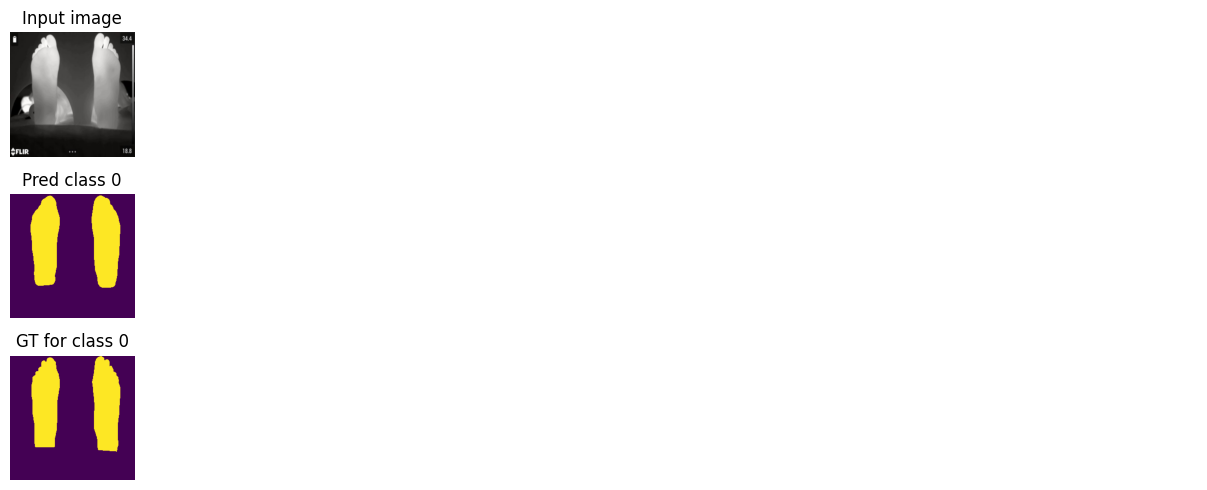

Train loss: 0.36384 | Time: 2m 42s | Val loss: 0.26940
Train_DICE_avg: 0.92492 | Train_Jaccard_avg: 0.86646 | Train_Sensitivity_avg: 0.88786 | Train_Specificity_avg: 0.98923 
Class 0 - Train_DICE: 0.92492 | Train_Jaccard: 0.86646 | Train_Sensitivity: 0.88786 | Train_Specificity: 0.98923 
Val_DICE_avg: 0.95333 | Val_Jaccard_avg: 0.91311 | Val_Sensitivity_avg: 0.94418 | Val_Specificity_avg: 0.98234 
Class 0 - Val_DICE: 0.95333 | Val_Jaccard: 0.91311 | Val_Sensitivity: 0.94418 | Val_Specificity: 0.98234 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.36255 | Time: 2m 46s | Val loss: 0.27306
Train_DICE_avg: 0.92724 | Train_Jaccard_avg: 0.87009 | Train_Sensitivity_avg: 0.88702 | Train_Specificity_avg: 0.99128 
Class 0 - Train_DICE: 0.92724 | Train_Jaccard: 0.87009 | Train_Sensitivity: 0.88702 | Train_Specificity: 0.99128 
Val_DICE_avg: 0.95365 | Val_Jaccard_avg: 0.91341 | Val_Sensitivity_avg: 0.94305 | Val_Specificity_avg: 0.98282 
Class 0 - Val_DICE: 0.95365 | Val_Jaccard: 0.91341 | Val_Sensitivity: 0.94305 | Val_Specificity: 0.98282 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


Train loss: 0.36013 | Time: 2m 50s | Val loss: 0.27606
Train_DICE_avg: 0.93415 | Train_Jaccard_avg: 0.88105 | Train_Sensitivity_avg: 0.89821 | Train_Specificity_avg: 0.99112 
Class 0 - Train_DICE: 0.93415 | Train_Jaccard: 0.88105 | Train_Sensitivity: 0.89821 | Train_Specificity: 0.99112 
Val_DICE_avg: 0.95475 | Val_Jaccard_avg: 0.91524 | Val_Sensitivity_avg: 0.94462 | Val_Specificity_avg: 0.98329 
Class 0 - Val_DICE: 0.95475 | Val_Jaccard: 0.91524 | Val_Sensitivity: 0.94462 | Val_Specificity: 0.98329 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.35887 | Time: 2m 54s | Val loss: 0.27153
Train_DICE_avg: 0.92826 | Train_Jaccard_avg: 0.87236 | Train_Sensitivity_avg: 0.89047 | Train_Specificity_avg: 0.99095 
Class 0 - Train_DICE: 0.92826 | Train_Jaccard: 0.87236 | Train_Sensitivity: 0.89047 | Train_Specificity: 0.99095 
Val_DICE_avg: 0.95570 | Val_Jaccard_avg: 0.91730 | Val_Sensitivity_avg: 0.95214 | Val_Specificity_avg: 0.98082 
Class 0 - Val_DICE: 0.95570 | Val_Jaccard: 0.91730 | Val_Sensitivity: 0.95214 | Val_Specificity: 0.98082 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.35821 | Time: 2m 59s | Val loss: 0.25328
Train_DICE_avg: 0.92341 | Train_Jaccard_avg: 0.86682 | Train_Sensitivity_avg: 0.88696 | Train_Specificity_avg: 0.99032 
Class 0 - Train_DICE: 0.92341 | Train_Jaccard: 0.86682 | Train_Sensitivity: 0.88696 | Train_Specificity: 0.99032 
Val_DICE_avg: 0.95793 | Val_Jaccard_avg: 0.92108 | Val_Sensitivity_avg: 0.95750 | Val_Specificity_avg: 0.98060 
Class 0 - Val_DICE: 0.95793 | Val_Jaccard: 0.92108 | Val_Sensitivity: 0.95750 | Val_Specificity: 0.98060 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]


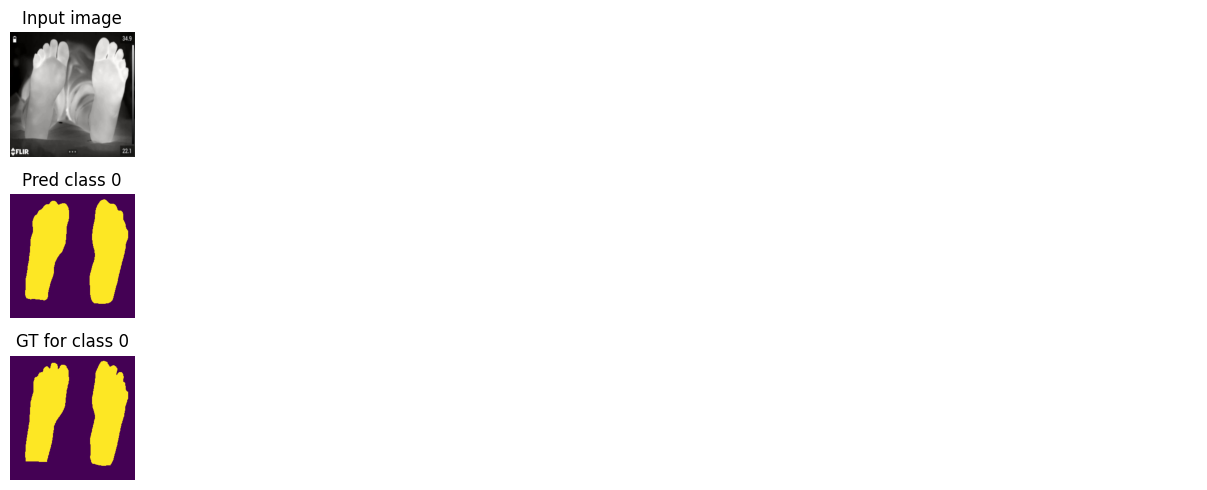

Train loss: 0.35561 | Time: 3m 3s | Val loss: 0.26132
Train_DICE_avg: 0.93538 | Train_Jaccard_avg: 0.88353 | Train_Sensitivity_avg: 0.90046 | Train_Specificity_avg: 0.99102 
Class 0 - Train_DICE: 0.93538 | Train_Jaccard: 0.88353 | Train_Sensitivity: 0.90046 | Train_Specificity: 0.99102 
Val_DICE_avg: 0.95776 | Val_Jaccard_avg: 0.92038 | Val_Sensitivity_avg: 0.94910 | Val_Specificity_avg: 0.98432 
Class 0 - Val_DICE: 0.95776 | Val_Jaccard: 0.92038 | Val_Sensitivity: 0.94910 | Val_Specificity: 0.98432 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


Train loss: 0.35552 | Time: 3m 6s | Val loss: 0.26293
Train_DICE_avg: 0.93308 | Train_Jaccard_avg: 0.87974 | Train_Sensitivity_avg: 0.89857 | Train_Specificity_avg: 0.99116 
Class 0 - Train_DICE: 0.93308 | Train_Jaccard: 0.87974 | Train_Sensitivity: 0.89857 | Train_Specificity: 0.99116 
Val_DICE_avg: 0.95667 | Val_Jaccard_avg: 0.91918 | Val_Sensitivity_avg: 0.95879 | Val_Specificity_avg: 0.97906 
Class 0 - Val_DICE: 0.95667 | Val_Jaccard: 0.91918 | Val_Sensitivity: 0.95879 | Val_Specificity: 0.97906 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


Train loss: 0.35731 | Time: 3m 10s | Val loss: 0.25803
Train_DICE_avg: 0.92984 | Train_Jaccard_avg: 0.87530 | Train_Sensitivity_avg: 0.89236 | Train_Specificity_avg: 0.99165 
Class 0 - Train_DICE: 0.92984 | Train_Jaccard: 0.87530 | Train_Sensitivity: 0.89236 | Train_Specificity: 0.99165 
Val_DICE_avg: 0.95581 | Val_Jaccard_avg: 0.91732 | Val_Sensitivity_avg: 0.94760 | Val_Specificity_avg: 0.98255 
Class 0 - Val_DICE: 0.95581 | Val_Jaccard: 0.91732 | Val_Sensitivity: 0.94760 | Val_Specificity: 0.98255 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.35239 | Time: 3m 14s | Val loss: 0.26131
Train_DICE_avg: 0.93399 | Train_Jaccard_avg: 0.88143 | Train_Sensitivity_avg: 0.89882 | Train_Specificity_avg: 0.99107 
Class 0 - Train_DICE: 0.93399 | Train_Jaccard: 0.88143 | Train_Sensitivity: 0.89882 | Train_Specificity: 0.99107 
Val_DICE_avg: 0.95669 | Val_Jaccard_avg: 0.91888 | Val_Sensitivity_avg: 0.94782 | Val_Specificity_avg: 0.98354 
Class 0 - Val_DICE: 0.95669 | Val_Jaccard: 0.91888 | Val_Sensitivity: 0.94782 | Val_Specificity: 0.98354 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.35217 | Time: 3m 18s | Val loss: 0.26036
Train_DICE_avg: 0.93272 | Train_Jaccard_avg: 0.88064 | Train_Sensitivity_avg: 0.89911 | Train_Specificity_avg: 0.99112 
Class 0 - Train_DICE: 0.93272 | Train_Jaccard: 0.88064 | Train_Sensitivity: 0.89911 | Train_Specificity: 0.99112 
Val_DICE_avg: 0.95741 | Val_Jaccard_avg: 0.92030 | Val_Sensitivity_avg: 0.95290 | Val_Specificity_avg: 0.98212 
Class 0 - Val_DICE: 0.95741 | Val_Jaccard: 0.92030 | Val_Sensitivity: 0.95290 | Val_Specificity: 0.98212 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]


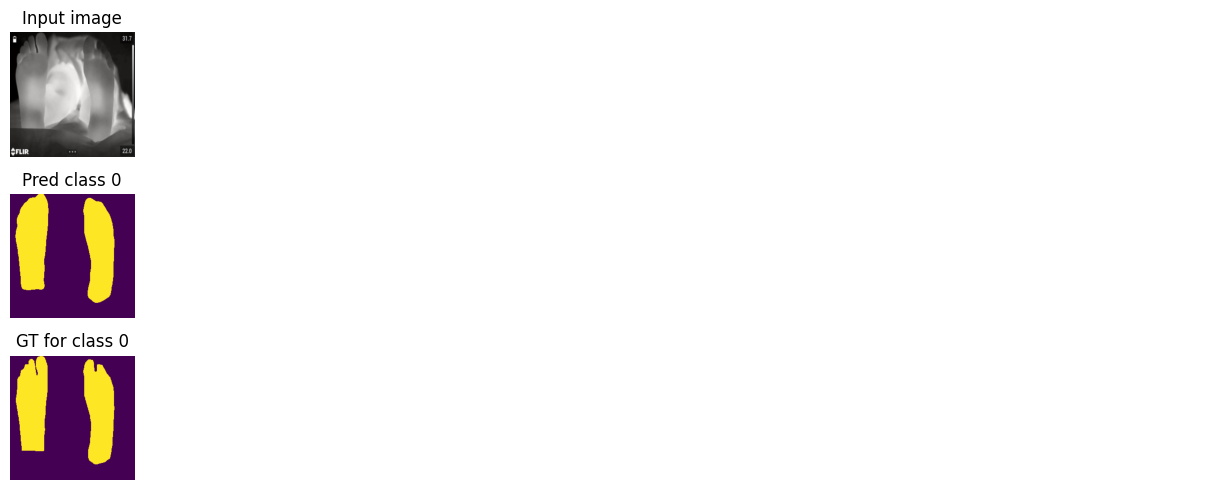

Train loss: 0.35295 | Time: 3m 22s | Val loss: 0.26062
Train_DICE_avg: 0.93574 | Train_Jaccard_avg: 0.88418 | Train_Sensitivity_avg: 0.90182 | Train_Specificity_avg: 0.99112 
Class 0 - Train_DICE: 0.93574 | Train_Jaccard: 0.88418 | Train_Sensitivity: 0.90182 | Train_Specificity: 0.99112 
Val_DICE_avg: 0.95653 | Val_Jaccard_avg: 0.91880 | Val_Sensitivity_avg: 0.95219 | Val_Specificity_avg: 0.98137 
Class 0 - Val_DICE: 0.95653 | Val_Jaccard: 0.91880 | Val_Sensitivity: 0.95219 | Val_Specificity: 0.98137 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.35075 | Time: 3m 26s | Val loss: 0.25799
Train_DICE_avg: 0.93634 | Train_Jaccard_avg: 0.88599 | Train_Sensitivity_avg: 0.90129 | Train_Specificity_avg: 0.99282 
Class 0 - Train_DICE: 0.93634 | Train_Jaccard: 0.88599 | Train_Sensitivity: 0.90129 | Train_Specificity: 0.99282 
Val_DICE_avg: 0.95737 | Val_Jaccard_avg: 0.92039 | Val_Sensitivity_avg: 0.95494 | Val_Specificity_avg: 0.98088 
Class 0 - Val_DICE: 0.95737 | Val_Jaccard: 0.92039 | Val_Sensitivity: 0.95494 | Val_Specificity: 0.98088 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


Train loss: 0.35174 | Time: 3m 30s | Val loss: 0.24402
Train_DICE_avg: 0.93460 | Train_Jaccard_avg: 0.88289 | Train_Sensitivity_avg: 0.89964 | Train_Specificity_avg: 0.99271 
Class 0 - Train_DICE: 0.93460 | Train_Jaccard: 0.88289 | Train_Sensitivity: 0.89964 | Train_Specificity: 0.99271 
Val_DICE_avg: 0.95865 | Val_Jaccard_avg: 0.92257 | Val_Sensitivity_avg: 0.95442 | Val_Specificity_avg: 0.98199 
Class 0 - Val_DICE: 0.95865 | Val_Jaccard: 0.92257 | Val_Sensitivity: 0.95442 | Val_Specificity: 0.98199 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.34823 | Time: 3m 34s | Val loss: 0.26118
Train_DICE_avg: 0.93936 | Train_Jaccard_avg: 0.89007 | Train_Sensitivity_avg: 0.90175 | Train_Specificity_avg: 0.99474 
Class 0 - Train_DICE: 0.93936 | Train_Jaccard: 0.89007 | Train_Sensitivity: 0.90175 | Train_Specificity: 0.99474 
Val_DICE_avg: 0.95724 | Val_Jaccard_avg: 0.91991 | Val_Sensitivity_avg: 0.94647 | Val_Specificity_avg: 0.98447 
Class 0 - Val_DICE: 0.95724 | Val_Jaccard: 0.91991 | Val_Sensitivity: 0.94647 | Val_Specificity: 0.98447 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]


Train loss: 0.34935 | Time: 3m 37s | Val loss: 0.26351
Train_DICE_avg: 0.93931 | Train_Jaccard_avg: 0.89055 | Train_Sensitivity_avg: 0.90934 | Train_Specificity_avg: 0.99115 
Class 0 - Train_DICE: 0.93931 | Train_Jaccard: 0.89055 | Train_Sensitivity: 0.90934 | Train_Specificity: 0.99115 
Val_DICE_avg: 0.95795 | Val_Jaccard_avg: 0.92140 | Val_Sensitivity_avg: 0.95460 | Val_Specificity_avg: 0.98150 
Class 0 - Val_DICE: 0.95795 | Val_Jaccard: 0.92140 | Val_Sensitivity: 0.95460 | Val_Specificity: 0.98150 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]


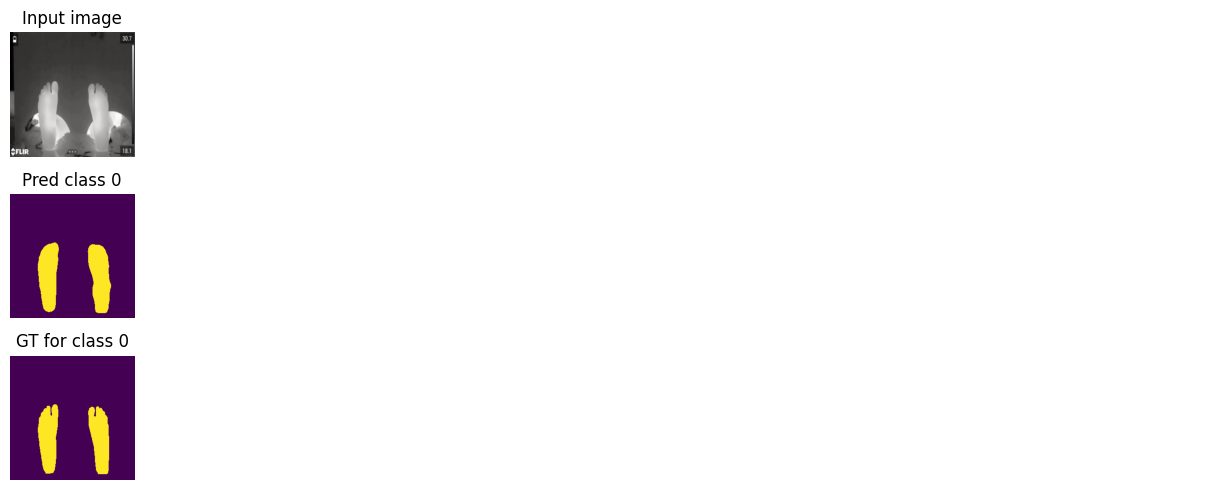

Train loss: 0.35051 | Time: 3m 42s | Val loss: 0.26522
Train_DICE_avg: 0.93642 | Train_Jaccard_avg: 0.88518 | Train_Sensitivity_avg: 0.90131 | Train_Specificity_avg: 0.99205 
Class 0 - Train_DICE: 0.93642 | Train_Jaccard: 0.88518 | Train_Sensitivity: 0.90131 | Train_Specificity: 0.99205 
Val_DICE_avg: 0.95725 | Val_Jaccard_avg: 0.91984 | Val_Sensitivity_avg: 0.94703 | Val_Specificity_avg: 0.98385 
Class 0 - Val_DICE: 0.95725 | Val_Jaccard: 0.91984 | Val_Sensitivity: 0.94703 | Val_Specificity: 0.98385 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]


Train loss: 0.34678 | Time: 3m 46s | Val loss: 0.26758
Train_DICE_avg: 0.94137 | Train_Jaccard_avg: 0.89340 | Train_Sensitivity_avg: 0.90742 | Train_Specificity_avg: 0.99316 
Class 0 - Train_DICE: 0.94137 | Train_Jaccard: 0.89340 | Train_Sensitivity: 0.90742 | Train_Specificity: 0.99316 
Val_DICE_avg: 0.95758 | Val_Jaccard_avg: 0.92032 | Val_Sensitivity_avg: 0.94524 | Val_Specificity_avg: 0.98512 
Class 0 - Val_DICE: 0.95758 | Val_Jaccard: 0.92032 | Val_Sensitivity: 0.94524 | Val_Specificity: 0.98512 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]


Train loss: 0.35034 | Time: 3m 49s | Val loss: 0.26397
Train_DICE_avg: 0.94224 | Train_Jaccard_avg: 0.89451 | Train_Sensitivity_avg: 0.91101 | Train_Specificity_avg: 0.99237 
Class 0 - Train_DICE: 0.94224 | Train_Jaccard: 0.89451 | Train_Sensitivity: 0.91101 | Train_Specificity: 0.99237 
Val_DICE_avg: 0.95856 | Val_Jaccard_avg: 0.92217 | Val_Sensitivity_avg: 0.95026 | Val_Specificity_avg: 0.98374 
Class 0 - Val_DICE: 0.95856 | Val_Jaccard: 0.92217 | Val_Sensitivity: 0.95026 | Val_Specificity: 0.98374 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]


Train loss: 0.34975 | Time: 3m 53s | Val loss: 0.26515
Train_DICE_avg: 0.93884 | Train_Jaccard_avg: 0.88910 | Train_Sensitivity_avg: 0.90350 | Train_Specificity_avg: 0.99234 
Class 0 - Train_DICE: 0.93884 | Train_Jaccard: 0.88910 | Train_Sensitivity: 0.90350 | Train_Specificity: 0.99234 
Val_DICE_avg: 0.95833 | Val_Jaccard_avg: 0.92169 | Val_Sensitivity_avg: 0.94882 | Val_Specificity_avg: 0.98405 
Class 0 - Val_DICE: 0.95833 | Val_Jaccard: 0.92169 | Val_Sensitivity: 0.94882 | Val_Specificity: 0.98405 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


Train loss: 0.34716 | Time: 3m 57s | Val loss: 0.26129
Train_DICE_avg: 0.94306 | Train_Jaccard_avg: 0.89629 | Train_Sensitivity_avg: 0.91127 | Train_Specificity_avg: 0.99299 
Class 0 - Train_DICE: 0.94306 | Train_Jaccard: 0.89629 | Train_Sensitivity: 0.91127 | Train_Specificity: 0.99299 
Val_DICE_avg: 0.95943 | Val_Jaccard_avg: 0.92361 | Val_Sensitivity_avg: 0.95164 | Val_Specificity_avg: 0.98407 
Class 0 - Val_DICE: 0.95943 | Val_Jaccard: 0.92361 | Val_Sensitivity: 0.95164 | Val_Specificity: 0.98407 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]


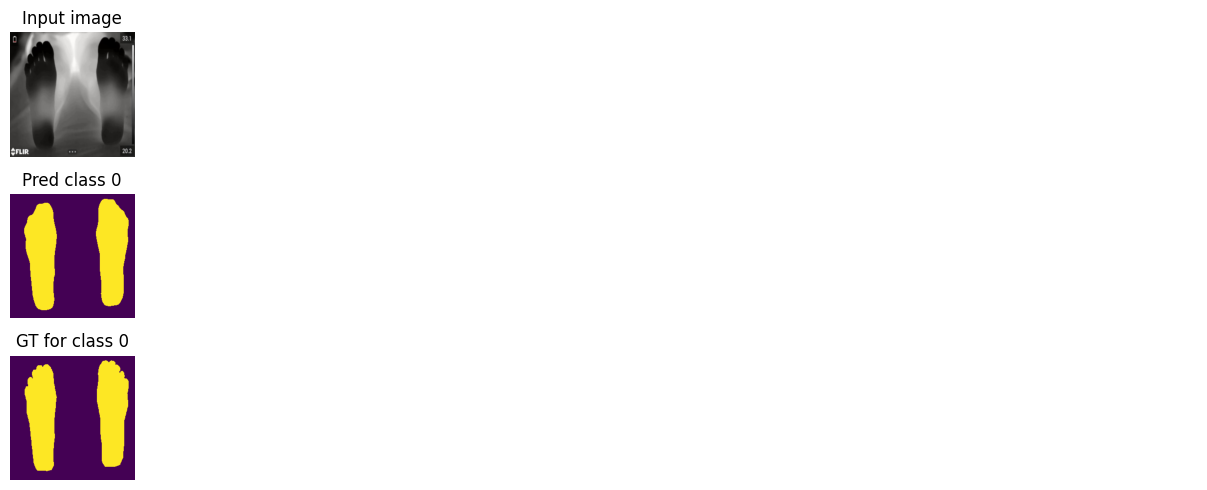

Train loss: 0.34686 | Time: 4m 1s | Val loss: 0.26168
Train_DICE_avg: 0.94128 | Train_Jaccard_avg: 0.89299 | Train_Sensitivity_avg: 0.90872 | Train_Specificity_avg: 0.99225 
Class 0 - Train_DICE: 0.94128 | Train_Jaccard: 0.89299 | Train_Sensitivity: 0.90872 | Train_Specificity: 0.99225 
Val_DICE_avg: 0.96042 | Val_Jaccard_avg: 0.92525 | Val_Sensitivity_avg: 0.95146 | Val_Specificity_avg: 0.98526 
Class 0 - Val_DICE: 0.96042 | Val_Jaccard: 0.92525 | Val_Sensitivity: 0.95146 | Val_Specificity: 0.98526 


Training DICE,▁▂▃▃▄▄▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇████████████████
Training Jaccard,▁▃▃▄▄▄▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇█████████████
Training Loss,█▆▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training Sensitivity,▁▂▂▂▃▃▄▄▄▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇████████████
Training Specificity,▁▃▄▅▅▆▅▆▅▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇████████████████
Validation DICE,▁▇▇▇▇▇▇▇▇▇██████████████████████████████
Validation Jaccard,▁▆▆▆▆▇▇▇▇▇▇▇▇███████████████████████████
Validation Loss,█▇▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Validation Sensitivity,▇▁▃▁▂▄▄▄▃▅▅▆▆▅▅▆▇▆▇▇▇▇█▆▇▇▇█████████████
Validation Specificity,▁▃▇▆▇▇▇█▇▇███▇██████████████████████████
Training DICE,0.94128



Training complete!


In [ ]:
trainer = SegmentationModel_Trainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [20]:
model = ResUNet(in_channels=config["Input size"][0],out_channels=config["Number of classes"], final_activation=config["Activation function"])
state_dict = torch.load('./models/best_model(4).pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [21]:
PerformanceModels(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


Global Performance Metrics:
Loss mean: 0.28533, std: 0.00000
Dice Coefficient mean: 0.93539, std: 0.07288
Jaccard Index mean: 0.88633, std: 0.11295
Sensitivity mean: 0.94779, std: 0.08597
Specificity mean: 0.98323, std: 0.01084

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.93539, std: 0.07288
Jaccard mean: 0.88633, std: 0.11295
Sensitivity mean: 0.94779, std: 0.08597
Specificity mean: 0.98323, std: 0.01084
